In [1]:
from sage.graphs.connectivity import *
from sage.graphs.graph_input import from_graph6
from sage.matroids.advanced import *
from sage.matroids.advanced import setprint
from sage.graphs.trees import TreeIterator
from sage.graphs.independent_sets import IndependentSets

In [2]:
load("https://raw.githubusercontent.com/jephianlin/minrank_aux/master/load_all.py")

xrange test passed


In [3]:
load_all()

Loading Zq_c.pyx...


Compiling /home/sage/.sage/temp/Coleman/1789/tmp_5tV6wl.pyx...


Loading Zq.py...
Loading zero_forcing_64.pyx...


Compiling /home/sage/.sage/temp/Coleman/1789/tmp_UlbCFn.pyx...


Loading zero_forcing_wavefront.pyx...


Compiling /home/sage/.sage/temp/Coleman/1789/tmp_et3cLO.pyx...


Loading minrank.py...
Loading inertia.py...
Loading general_Lib.sage...
---sshow, multi_sshow, tuple_generator, minimal_graphs, empty_array, all_one_matrix, elementary_matrix, eigens_multi, sort_dictionary, has_minor, etc.
Loading oc_diag_analysis.sage...
---gZ_leq, find_gZ, find_EZ, diagonal_analysis, etc.
Loading xi_dict.py...
---SAPreduced_matrix, has_SAP, find_ZFloor, Zsap, etc.
Loading mu_dict.py...
---get_mu_from_dict, find_mu, etc.
Loading SXP.sage...
This code contains extra copy of Z_game, Zell_game, Zplus_game, for the completeness of Zsap_game program.
Loading matrix_forcing.py...


In [2]:
def All_Forts(G):
# input the connected graph G
# ouput the set of forts of g
    V = G.vertices()
    S = Subsets(V)
    Forts = set(S)
    for s in S:
        for x in set(V) - set(s):
            if len(list((set(G.neighbors(x)) & set(s))))==1:
                Forts.remove(s)
                break
        if len(list(s))==0:
            Forts.remove(s)
    #print 'total number of forts = ', len(Forts)
    F = sorted([sorted(list(f)) for f in Forts],key=len)
    return F;   

def flatten(l):
  out = []
  for item in l:
    if isinstance(item, (list, tuple)):
      out.extend(flatten(item))
    else:
      out.append(item)
  return out

#Input: a symmetric matrix A ( could also do combinatorially symmetric by slight alteration )
#Output: Graphs G' where A in S(G) can be lifted to by adding a vertex and where there exists a matrix in S(G') with the same rank 
def Col_Supp_Lifts(A):
    
    #print 'rank = ', A.rank(), '\n'
    #print A, '\n'
    #n number of rows/columns in A
    n=len(list(A))
    
    #constructing the graph for A
    #print 'G(A) = '
    G=Graph([])
    G.add_vertices(range(n))
    for i in range(0,n):
        for j in range(i+1,n):
            if A[i][j] != 0:
                G.add_edge((i,j))
    #G.show()
    
    #print '===========================================================', '\n', 'Minimal support lifts for A ', '\n'

    #requires sage matroid package, sage.matroids.advanced import *
    kerA=Matrix(A.kernel().basis())

    #Computing matroid data for the null space of the null space

    M=Matroid(kerA)
    # The list of circuits for ker(A).  This should be the minimal supports of the column space.
    CM=sorted([sorted(C) for C in M.circuits()])
    #print CM

#     for i in range(len(CM)):
#         H=deepcopy(G)
#         H.add_vertex(7)
#         for j in range(len(CM[i])):
#             H.add_edges([(7,CM[i][j])])
        #H.show()
        #print H.graph6_string(), ' with neighbors of 7 ', CM[i]
        
    #Construct all unions of supports in CM
    N=[i for i in range(len(CM))]
    S=[list(s) for s in subsets(N)]
    #print 'number of unions of column supports = ', len(S)

    # m=3500
    # print S[m], '\n'
    # U=[CM[k] for k in S[m]]
    # print list(set(flatten(U)))

    L=[]


    for j in range(len(S)):
         for k in range(len(S[j])):
            U=[CM[k] for k in S[j]]
            fU=list( set( flatten(U)))
            print fU
            H=deepcopy(G)
            H.add_vertex(7)
            for i in range(len(fU)):
                H.add_edges([(7,fU[i])])
            #H.show()
            #print H.graph6_string()
            L.append(H.graph6_string())
    #Gets rid of duplicates in L
    L_new = list(set(L))

    m=len(L_new)
    L_new_remove=[]
    for i in range(m):
        for j in range(i+1,m):
            if Graph(L_new[i]).is_isomorphic(Graph(L_new[j])):
                L_new_remove.append(L_new[j])
    #print 'number of unique unions = ', len(L_new)
    L_new_new = list( set(L_new).difference( set(L_new_remove)) )
    #print 'number of non-isomorphic lifting graphs = ', len( L_new_new )
    #print list( L_new_new )
    
    return L_new_new;


#input: list of Sets, U
#output: list of Sets that are unions minus one element of pairs of Sets in U in the intersection per circuit exchange property
def ExchangeUnions(U):
    lenU=len(U)
    NewUnions=[]

    for j1 in range(lenU):
        for j2 in range(j1+1,lenU):
            union=U[j1].union(U[j2])
            inter=U[j1].intersection(U[j2])

            if len(inter)>0:
                for x in inter:
                    NewUnions.append(union.difference({x}))

    NewUnionsSet=list(set(NewUnions)) 
    
    return(NewUnionsSet)

#input: list of Sets, F
#output: list of pairs of indices of Sets in F for which the exchange property for circuits fundamentally fails on the input

def BadPairs(F):

    n=len(F)
    BadPairs=[]
    
    for i in range(n):
        for j in range(i+1,n):
            union=F[i].union(F[j])
            inter=F[i].intersection(F[j])

            #for i in range(m):
            if len(inter)>0:
                for x in inter:
                    N=union.difference({x})
                    #print i,j,N, F[i], F[j]
                    for f in F:
                        if (not( any( f.issubset(N) for f in F) ) ):
                            BadPairs.append(Set([i,j]))
                            #print 'bad pair'
                            #print i,j, N, F[i],F[j]
                            break;


    return(BadPairs) 


#input: list of Sets, U
#output: list of Sets that are unions minus one element of pairs of Sets in U in the intersection per circuit exchange property
def ExchangeUnionsIndices(U,A):
    NewUnionsIndices=[]
    
    EU=ExchangeUnions(U)
    lenEU=len(EU)
    
    for i in range(lenEU):
        Indices=[]
        for a in A:
            if a.issubset(EU[i]):
                Indices.append(A.index(a))
        NewUnionsIndices.append(Indices)
    

    
    
    return(NewUnionsIndices)


#input: size of transversal 4, list of Sets F
#output:  list of indices for F with unique representatives of a minimum transversal of size 4 
def GoodIndices4(F):
    m=len(F)
    UniqFortRepIndex=Subsets(range(m),4)
    lenUFRI=len(UniqFortRepIndex)
    
    
    GoodIndices=[]
    

    for i in range(lenUFRI):
        U=[F[k] for k in UniqFortRepIndex[i]]
        #print U
        uniq=[]
        #if U[0] in U[1].union(U[2]).union(U[3])
        for x0 in U[0]:
            if not(x0 in U[1].union(U[2]).union(U[3])):
                uniq.append(x0)
                for x1 in U[1]:
                    if not(x1 in U[0].union(U[2]).union(U[3])):
                        uniq.append(x1)
                        for x2 in U[2]:
                            if not(x2 in U[0].union(U[1]).union(U[3])):
                                uniq.append(x2)
                                for x3 in U[3]:
                                    if not(x3 in U[0].union(U[1]).union(U[2])):
                                        uniq.append(x3)
                                        if len(list(set(uniq)))==4:
                                            GoodIndices.append(i)
      
    return(GoodIndices) 

def GoodIndices3(F):
    m=len(F)
    UniqFortRepIndex=Subsets(range(m),3)
    lenUFRI=len(UniqFortRepIndex)
    
    
    GoodIndices=[]
    

    for i in range(lenUFRI):
        U=[F[k] for k in UniqFortRepIndex[i]]
        #print U
        uniq=[]
        #if U[0] in U[1].union(U[2]).union(U[3])
        for x0 in U[0]:
            if not(x0 in U[1].union(U[2])):
                uniq.append(x0)
                for x1 in U[1]:
                    if not(x1 in U[0].union(U[2])):
                        uniq.append(x1)
                        for x2 in U[2]:
                            if not(x2 in U[0].union(U[1])):
                                uniq.append(x2)
                                if len(list(set(uniq)))==4:
                                    GoodIndices.append(i)
      
    return(GoodIndices) 




#input: list of sets F, all forts being considered, integer index, t size of transversal (n-rank)
def List_PC(index,F,t):
    m=len(F345)
    UFRI=Subsets(range(m),t)
    
    U=[F[k] for k in UFRI[index]]
    
    return(U)


#input: list of sets U, list of sets F that contains the list U
#output: a new list that contains U and any other sets from F guaranteed by exchange condition on circuits
def ReqForts(U,F):
    
    NUS=ExchangeUnions(U)
    m=len(NUS)
    NewU=copy(U)
    
    for j in range(m):
        if (not( any( u.issubset(NUS[j]) for u in U) ) ):
            #print j,NewUnionsSet[j],'\n','------------------'
            Y=NUS[j]
            if (not ( any(f.issubset(Y) for f in F) ) ):
                print Y,'incompatible'

            PossSubs=[]
            for f in F:
                if f.issubset(Y):
                    PossSubs.append(f)
                #print PossSubs
            if len(PossSubs)==1:
                NewU.append(PossSubs[0])

    return(NewU)


In [3]:
#input: graph
#output: graph of forts with edges for completable pairs, edges labeled with forts that complete them

def Fort_RGraph(G):
    
    #construct edges of Fort Graph
    F=[Set(f) for f in All_Forts(G)]
    BP=BadPairs(F)
    BP=list(Set(BP))
    l=len(F)
    E=Subsets(range(l),2)
    GP=list(set(E) - set(BP))
    GPlist=[sorted(x) for x in GP]
    
    #turn edges into tuples and define Fort Graph
    GPtuple=[tuple(a) for a in GPlist]
    FortGP=Graph(GPtuple)
    
    #remove edges between a subset and a set containing it
    GPlist_min=copy(GPlist)
    lenGP=len(GP)
    for i in range(lenGP):
        index0=GPlist[i][0]
        index1=GPlist[i][1]
        if (F[index0].issubset(F[index1]) or F[index1].issubset(F[index0])):
            #print index0,A1[index0],index1,A1[index1]
            GPlist_min.remove(GPlist[i])
    
    #refined edge set
    GPmin_edges=[tuple(a) for a in GPlist_min]
    FortGPmin=Graph(GPmin_edges)
    
    #labels edeges with forts that complete the pair
    for x in FortGPmin.edges():
        list_x=list(x)
        FortGPmin.set_edge_label(list_x[0],list_x[1],ExchangeUnionsIndices([F[list_x[0]],F[list_x[1]]],F))
        
    #plot Fort Graph with labeled edges
    #FortGPmin.plot(vertex_color='white',vertex_size=500,edge_labels=True).show(figsize=(10,10))
    #print 'clique number = ', FortGPmin.clique_number()
    
    return FortGPmin

#input: graph G size of clique
#output: list of list of vertices making up cliques of size k in the Forts Graph, the vertices are potential compatible collections

def kCliquesGraph(FortG,k):
    
#     FortG=Fort_RGraph(G)
    m=len(FortG.vertices())
    t=m-k
    S=Subsets(range(m),t)

    FortG_clique=[]

    for s in S:
        s=list(s)
        h=copy(FortG)
        h.delete_vertices(s)
        g=graphs.CompleteGraph(k)
        if h.is_isomorphic(g):
            FortG_clique.append(h.edges())
            #print h.vertices()
            #h.plot(vertex_color='white',edge_labels='True',layout='circular').show(figsize=(6,6))
            
    return FortG_clique


#input: graph G size of clique
#output: list of list of vertices making up cliques of size k in the Forts Graph, the vertices are potential compatible collections

def kCliquesFortGraph(G,k):
    
    FortG=Fort_RGraph(G)
    m=len(FortG.vertices())
    t=m-k
    S=Subsets(range(m),t)

    FortG_clique=[]

    for s in S:
        s=list(s)
        h=copy(FortG)
        h.delete_vertices(s)
        g=graphs.CompleteGraph(k)
        if h.is_isomorphic(g):
            FortG_clique.append(h.edges())
            #print h.vertices()
            #h.plot(vertex_color='white',edge_labels='True',layout='circular').show(figsize=(6,6))
            
    return FortG_clique

#input: graph G and integer k
#output: the set of compatible collections of forts of size k

def CompCollForts(G,k,data_type='string'):
    
    F=All_Forts(G)
    lenF=len(F)
    FortG=Fort_RGraph(G)
    CN=FortG.clique_number()
    CCF=[]
    
    if k>CN:
        print 'no compatible collections larger than ', CN
    elif k<1:
        print 'no compatible collections smaller than', 1
    elif k==1:
        for i in range(lenF):
            f=[i]
            CCF.append(f)
        
    else:
        FortG_clique=kCliquesGraph(FortG,k)
        for C in FortG_clique:
            g=Graph(C)
            edges=g.edges()
            good_labels=[]
            for x in edges:
                edge_list=list(x)
                x0=edge_list[0]
                x1=edge_list[1]
                label=g.edge_label(x0,x1)
                #print 'label', label
                if len(label)==0:
                    good_labels.append(label)
                good_label=[]
                for l in label:
                    if len(l)>0:
                        if ( any( (x in g.vertices()) for x in l) ):
                            good_label.append(l)
                            #print good_label
                        if len(good_label)==len(label):
                            good_labels.append(label)

            if len(good_labels)==k*(k-1)/2:
                #Graph(C).plot(vertex_color='white',vertex_size=500,edge_labels=True,layout='circular').show(figsize=(10,10))
                v=Graph(C).vertices()
                CCF.append(v)

    #return CCF
    if data_type=='list':
        return [[list(F[x]) for x in c] for c in CCF]
    elif data_type=='set':
        return [[set(F[x]) for x in c] for c in CCF]
    else:
        return [[''.join(str(y) for y in F[x]) for x in c] for c in CCF]



In [16]:
print sorted(All_Forts(G),key=len)
print 
print sorted(All_Forts(H),key=len)

[[0, 2, 3], [1, 2, 4], [0, 2, 4], [0, 1, 3], [1, 3, 4], [1, 2, 3, 4], [0, 2, 3, 4], [0, 1, 2, 3], [0, 1, 2, 4], [0, 1, 3, 4], [0, 1, 2, 3, 4]]

[[0, 2, 3], [1, 2, 4], [0, 2, 4], [0, 1, 3], [1, 3, 4], [1, 2, 3, 4], [0, 2, 3, 4], [0, 1, 2, 3], [0, 1, 2, 4], [0, 1, 3, 4], [0, 1, 2, 3, 4]]


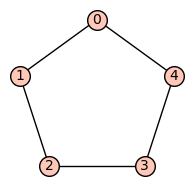

In [11]:
G=graphs.CycleGraph(5)
FG=Fort_RGraph(G)
G.show(figsize=(2,2))

In [19]:
C3=CompCollForts(G,3,data_type='string')
C4=CompCollForts(G,4,data_type='string')


In [20]:
# m=len(C3)
# M1=Matroid(groundset='01234',circuits=C3[0])
# for c in C3:
#     print c
#     M=Matroid(groundset='01234',circuits=c)
#     print M.rank()
#     print M1.is_isomorphic(M)

m=len(C4)
M1=Matroid(groundset='01234',circuits=C4[0])
for c in C4:
    print c
    M=Matroid(groundset='01234',circuits=c)
    print M.rank()
    print M1.is_isomorphic(M)
    

['134', '0234', '0123', '0124']
3
True
['013', '1234', '0234', '0124']
3
True
['024', '1234', '0123', '0134']
3
True
['124', '0234', '0123', '0134']
3
True
['023', '1234', '0124', '0134']
3
True


In [57]:
#['124', '0234', '0123', '0134'] and ['134', '0234', '0123', '0124']

var('a00,a01,a11,a12,a22,a23,a04,a14')
var('b03,b04,b13,b14,b23,b24')
var('x,y')

# b03=1
# b13=1
# b04=2
# b14=1
# b24=1

B=Matrix([
    [1,0,0,b03,0],
    [0,1,0,b13,b14],
    [0,0,1,b23,b24]
])
print B, '\n'

# a00 = 0
# a01 = (b14*b23* x - b23* y)/(b03*b24)
# a11 =  x
# a12 = -(b14* x -  y)/b24
# a22 = (b14^2* x - b14* y)/b24^2
# a23 = (b14^2*b23* x - b14*b23* y)/b24^2
# a04 = (b14^2*b23* x - b14*b23* y)/(b03*b24)
# a14 =  y

Ac=Matrix([
    [a00,a01,0],
    [a01,a11,a12],
    [0,a12,a22],
    [0,0,a23],
    [a04,a14,0]
])
print Ac, '\n'

A=Ac*B

print A

[  1   0   0 b03   0]
[  0   1   0 b13 b14]
[  0   0   1 b23 b24] 

[a00 a01   0]
[a01 a11 a12]
[  0 a12 a22]
[  0   0 a23]
[a04 a14   0] 

[                        a00                         a01                           0           a00*b03 + a01*b13                     a01*b14]
[                        a01                         a11                         a12 a01*b03 + a11*b13 + a12*b23           a11*b14 + a12*b24]
[                          0                         a12                         a22           a12*b13 + a22*b23           a12*b14 + a22*b24]
[                          0                           0                         a23                     a23*b23                     a23*b24]
[                        a04                         a14                           0           a04*b03 + a14*b13                     a14*b14]


In [58]:
Eq=[]
for i in range(5):
    for j in range(5):
        Eq.append(A[i][j]==A[j][i])
        #print i,j, ' ', A[i][j], ' = ', A[j][i]

In [59]:
S=solve(Eq,[a00,a01,a11,a12,a22,a23,a04,a14])
S

[[a00 == (b13*b23*r5 + b13^2*r6)/b03^2, a01 == -(b23*r5 + b13*r6)/b03, a11 == r6, a12 == r5, a22 == -b14*r5/b24, a23 == -(b14*b23*r5 - b13*b24*r5)/b24, a04 == -(b14*b23*r5 + b13*b14*r6)/b03, a14 == b24*r5 + b14*r6]]

In [ ]:
a00 = (b13*b23*x + b13^2*y)/b03^2, a01 = -(b23*x + b13*y)/b03, a11 = y, a12 = x, a22 = -b14*x/b24, a23 = -(b14*b23*x - b13*b24*x)/b24, a04 = -(b14*b23*x + b13*b14*y)/b03, a14 = b24*x + b14*y

In [64]:
#['124', '0234', '0123', '0134'] and ['134', '0234', '0123', '0124']

var('a00,a01,a11,a12,a22,a23,a04,a14')
var('b03,b04,b13,b14,b23,b24')
var('x,y')

b03=1
b13=2
b23=3
b14=1
b24=1

B=Matrix([
    [1,0,0,b03,0],
    [0,1,0,b13,b14],
    [0,0,1,b23,b24]
])
print B, '\n'

a00 = (b13*b23*x + b13^2*y)/b03^2
a01 = -(b23*x + b13*y)/b03
a11 = y 
a12 = x
a22 = -b14*x/b24
a23 = -(b14*b23*x - b13*b24*x)/b24
a04 = -(b14*b23*x + b13*b14*y)/b03
a14 = b24*x + b14*y

Ac=Matrix([
    [a00,a01,0],
    [a01,a11,a12],
    [0,a12,a22],
    [0,0,a23],
    [a04,a14,0]
])
print Ac, '\n'

A=Ac*B

print A

[1 0 0 1 0]
[0 1 0 2 1]
[0 0 1 3 1] 

[ 6*x + 4*y -3*x - 2*y          0]
[-3*x - 2*y          y          x]
[         0          x         -x]
[         0          0         -x]
[-3*x - 2*y      x + y          0] 

[ 6*x + 4*y -3*x - 2*y          0          0 -3*x - 2*y]
[-3*x - 2*y          y          x          0      x + y]
[         0          x         -x         -x          0]
[         0          0         -x       -3*x         -x]
[-3*x - 2*y      x + y          0         -x      x + y]


In [65]:
MB=Matroid(B)
print sorted([sorted(c) for c in MB.circuits()])

[[0, 1, 2, 3], [0, 1, 3, 4], [0, 2, 3, 4], [1, 2, 4]]


In [67]:
#['124', '0234', '0123', '0134'] and ['134', '0234', '0123', '0124']

var('a00,a01,a11,a12,a22,a23,a04,a14')
var('b03,b04,b13,b14,b23,b24')
var('x,y')

b03=1
b13=2
b23=3
b14=1
b24=1

x=1
y=2

B=Matrix([
    [1,0,0,b03,0],
    [0,1,0,b13,b14],
    [0,0,1,b23,b24]
])
print B, '\n'

a00 = (b13*b23*x + b13^2*y)/b03^2
a01 = -(b23*x + b13*y)/b03
a11 = y 
a12 = x
a22 = -b14*x/b24
a23 = -(b14*b23*x - b13*b24*x)/b24
a04 = -(b14*b23*x + b13*b14*y)/b03
a14 = b24*x + b14*y

Ac=Matrix([
    [a00,a01,0],
    [a01,a11,a12],
    [0,a12,a22],
    [0,0,a23],
    [a04,a14,0]
])
print Ac, '\n'

A=Ac*B

print A
print A.rank()

[1 0 0 1 0]
[0 1 0 2 1]
[0 0 1 3 1] 

[14 -7  0]
[-7  2  1]
[ 0  1 -1]
[ 0  0 -1]
[-7  3  0] 

[14 -7  0  0 -7]
[-7  2  1  0  3]
[ 0  1 -1 -1  0]
[ 0  0 -1 -3 -1]
[-7  3  0 -1  3]
3


In [68]:
MA=Matroid(A)
print sorted([sorted(c) for c in MA.circuits()])

[[0, 1, 2, 3], [0, 1, 3, 4], [0, 2, 3, 4], [1, 2, 4]]


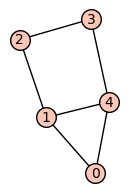

In [69]:
#graph of matrix A
n=5
H=Graph([])
H.add_vertices(range(n))
for i in range(0,n):
    for j in range(i+1,n):
        if A[i][j] != 0:
            H.add_edge((i,j))
H.show(figsize=(2,2))

In [70]:
#['124', '0234', '0123', '0134'] and ['134', '0234', '0123', '0124']

var('a00,a01,a11,a12,a22,a23,a04,a14')
var('b03,b04,b13,b14,b23,b24')
var('x,y')

b03=1
b13=2
b23=3
b14=1
b24=1

x=1
y=-1

B=Matrix([
    [1,0,0,b03,0],
    [0,1,0,b13,b14],
    [0,0,1,b23,b24]
])
print B, '\n'

a00 = (b13*b23*x + b13^2*y)/b03^2
a01 = -(b23*x + b13*y)/b03
a11 = y 
a12 = x
a22 = -b14*x/b24
a23 = -(b14*b23*x - b13*b24*x)/b24
a04 = -(b14*b23*x + b13*b14*y)/b03
a14 = b24*x + b14*y

Ac=Matrix([
    [a00,a01,0],
    [a01,a11,a12],
    [0,a12,a22],
    [0,0,a23],
    [a04,a14,0]
])
print Ac, '\n'

A=Ac*B

print A
print A.rank()

[1 0 0 1 0]
[0 1 0 2 1]
[0 0 1 3 1] 

[ 2 -1  0]
[-1 -1  1]
[ 0  1 -1]
[ 0  0 -1]
[-1  0  0] 

[ 2 -1  0  0 -1]
[-1 -1  1  0  0]
[ 0  1 -1 -1  0]
[ 0  0 -1 -3 -1]
[-1  0  0 -1  0]
3


In [71]:
MA=Matroid(A)
print sorted([sorted(c) for c in MA.circuits()])

[[0, 1, 2, 3], [0, 1, 3, 4], [0, 2, 3, 4], [1, 2, 4]]


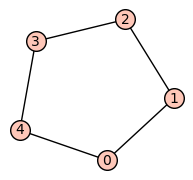

In [72]:
#graph of matrix A
n=5
H=Graph([])
H.add_vertices(range(n))
for i in range(0,n):
    for j in range(i+1,n):
        if A[i][j] != 0:
            H.add_edge((i,j))
H.show(figsize=(2,2))

In [45]:
#['013', '1234', '0234', '0124'] and ['024', '1234', '0123', '0134']

var('a00,a01,a11,a12,a22,a23,a04,a14')
var('b03,b04,b13,b14,b23,b24')
var('x,y')

# b03=1
# b13=1
# b04=2
# b14=1
# b24=1

B=Matrix([
    [1,0,0,b03,b04],
    [0,1,0,b13,b14],
    [0,0,1,0,b24]
])
print B, '\n'

# a00 = 0
# a01 = (b14*b23* x - b23* y)/(b03*b24)
# a11 =  x
# a12 = -(b14* x -  y)/b24
# a22 = (b14^2* x - b14* y)/b24^2
# a23 = (b14^2*b23* x - b14*b23* y)/b24^2
# a04 = (b14^2*b23* x - b14*b23* y)/(b03*b24)
# a14 =  y

Ac=Matrix([
    [a00,a01,0],
    [a01,a11,a12],
    [0,a12,a22],
    [0,0,a23],
    [a04,a14,0]
])
print Ac, '\n'

A=Ac*B

print A

[  1   0   0 b03 b04]
[  0   1   0 b13 b14]
[  0   0   1   0 b24] 

[a00 a01   0]
[a01 a11 a12]
[  0 a12 a22]
[  0   0 a23]
[a04 a14   0] 

[                        a00                         a01                           0           a00*b03 + a01*b13           a00*b04 + a01*b14]
[                        a01                         a11                         a12           a01*b03 + a11*b13 a01*b04 + a11*b14 + a12*b24]
[                          0                         a12                         a22                     a12*b13           a12*b14 + a22*b24]
[                          0                           0                         a23                           0                     a23*b24]
[                        a04                         a14                           0           a04*b03 + a14*b13           a04*b04 + a14*b14]


In [46]:
Eq=[]
for i in range(5):
    for j in range(5):
        Eq.append(A[i][j]==A[j][i])
        #print i,j, ' ', A[i][j], ' = ', A[j][i]

In [47]:
S=solve(Eq,[a00,a01,a11,a12,a22,a23,a04,a14])
S

[[a00 == b13^2*r4/b03^2, a01 == -b13*r4/b03, a11 == r4, a12 == (b04*b13*r4 - (b14*r4 - r3)*b03)/(b03*b24), a22 == -(b04*b13*b14*r4 - (b14^2*r4 - b14*r3)*b03)/(b03*b24^2), a23 == (b04*b13^2*r4 - (b14*r4 - r3)*b03*b13)/(b03*b24), a04 == (b04*b13^2*r4 - b03*b13*b14*r4)/b03^2, a14 == r3]]

In [ ]:
a00 = b13^2*x/b03^2, a01 = -b13*x/b03, a11 = x, a12 = (b04*b13*x - (b14*x - y)*b03)/(b03*b24), a22 = -(b04*b13*b14*x - (b14^2*x - b14*y)*b03)/(b03*b24^2), a23 = (b04*b13^2*x - (b14*x - y)*b03*b13)/(b03*b24), a04 = (b04*b13^2*x - b03*b13*b14*x)/b03^2, a14 = y

In [48]:
#['013', '1234', '0234', '0124'] and ['024', '1234', '0123', '0134']

var('a00,a01,a11,a12,a22,a23,a04,a14')
var('b03,b04,b13,b14,b23,b24')
var('x,y')

b03=1
b13=1
b04=2
b14=1
b24=1

B=Matrix([
    [1,0,0,b03,b04],
    [0,1,0,b13,b14],
    [0,0,1,0,b24]
])
print B, '\n'

a00 = b13^2*x/b03^2
a01 = -b13*x/b03
a11 = x
a12 = (b04*b13*x - (b14*x - y)*b03)/(b03*b24)
a22 = -(b04*b13*b14*x - (b14^2*x - b14*y)*b03)/(b03*b24^2)
a23 = (b04*b13^2*x - (b14*x - y)*b03*b13)/(b03*b24)
a04 = (b04*b13^2*x - b03*b13*b14*x)/b03^2
a14 = y

Ac=Matrix([
    [a00,a01,0],
    [a01,a11,a12],
    [0,a12,a22],
    [0,0,a23],
    [a04,a14,0]
])
print Ac, '\n'

A=Ac*B

print A

[1 0 0 1 2]
[0 1 0 1 1]
[0 0 1 0 1] 

[     x     -x      0]
[    -x      x  x + y]
[     0  x + y -x - y]
[     0      0  x + y]
[     x      y      0] 

[      x      -x       0       0       x]
[     -x       x   x + y       0       y]
[      0   x + y  -x - y   x + y       0]
[      0       0   x + y       0   x + y]
[      x       y       0   x + y 2*x + y]


In [50]:
#['013', '1234', '0234', '0124'] and ['024', '1234', '0123', '0134']

var('a00,a01,a11,a12,a22,a23,a04,a14')
var('b03,b04,b13,b14,b23,b24')
var('x,y')

b03=1
b13=1
b04=2
b14=1
b24=1

x=1
y=2

B=Matrix([
    [1,0,0,b03,b04],
    [0,1,0,b13,b14],
    [0,0,1,0,b24]
])
print B, '\n'

a00 = b13^2*x/b03^2
a01 = -b13*x/b03
a11 = x
a12 = (b04*b13*x - (b14*x - y)*b03)/(b03*b24)
a22 = -(b04*b13*b14*x - (b14^2*x - b14*y)*b03)/(b03*b24^2)
a23 = (b04*b13^2*x - (b14*x - y)*b03*b13)/(b03*b24)
a04 = (b04*b13^2*x - b03*b13*b14*x)/b03^2
a14 = y

Ac=Matrix([
    [a00,a01,0],
    [a01,a11,a12],
    [0,a12,a22],
    [0,0,a23],
    [a04,a14,0]
])
print Ac, '\n'

A=Ac*B

print A
print A.rank()

[1 0 0 1 2]
[0 1 0 1 1]
[0 0 1 0 1] 

[ 1 -1  0]
[-1  1  3]
[ 0  3 -3]
[ 0  0  3]
[ 1  2  0] 

[ 1 -1  0  0  1]
[-1  1  3  0  2]
[ 0  3 -3  3  0]
[ 0  0  3  0  3]
[ 1  2  0  3  4]
3


In [51]:
MB=Matroid(B)
print sorted([sorted(c) for c in MB.circuits()])

[[0, 1, 2, 4], [0, 1, 3], [0, 2, 3, 4], [1, 2, 3, 4]]


In [52]:
MA=Matroid(A)
print sorted([sorted(c) for c in MA.circuits()])

[[0, 1, 2, 4], [0, 1, 3], [0, 2, 3, 4], [1, 2, 3, 4]]


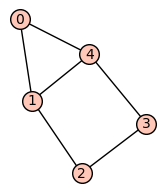

In [53]:
#graph of matrix A
n=5
H=Graph([])
H.add_vertices(range(n))
for i in range(0,n):
    for j in range(i+1,n):
        if A[i][j] != 0:
            H.add_edge((i,j))
H.show(figsize=(2,2))

In [54]:
#['013', '1234', '0234', '0124'] and ['024', '1234', '0123', '0134']

var('a00,a01,a11,a12,a22,a23,a04,a14')
var('b03,b04,b13,b14,b23,b24')
var('x,y')

b03=1
b13=1
b04=2
b14=1
b24=1

x=1
y=0

B=Matrix([
    [1,0,0,b03,b04],
    [0,1,0,b13,b14],
    [0,0,1,0,b24]
])
print B, '\n'

a00 = b13^2*x/b03^2
a01 = -b13*x/b03
a11 = x
a12 = (b04*b13*x - (b14*x - y)*b03)/(b03*b24)
a22 = -(b04*b13*b14*x - (b14^2*x - b14*y)*b03)/(b03*b24^2)
a23 = (b04*b13^2*x - (b14*x - y)*b03*b13)/(b03*b24)
a04 = (b04*b13^2*x - b03*b13*b14*x)/b03^2
a14 = y

Ac=Matrix([
    [a00,a01,0],
    [a01,a11,a12],
    [0,a12,a22],
    [0,0,a23],
    [a04,a14,0]
])
print Ac, '\n'

A=Ac*B

print A
print A.rank()

[1 0 0 1 2]
[0 1 0 1 1]
[0 0 1 0 1] 

[ 1 -1  0]
[-1  1  1]
[ 0  1 -1]
[ 0  0  1]
[ 1  0  0] 

[ 1 -1  0  0  1]
[-1  1  1  0  0]
[ 0  1 -1  1  0]
[ 0  0  1  0  1]
[ 1  0  0  1  2]
3


In [55]:
MA=Matroid(A)
print sorted([sorted(c) for c in MA.circuits()])

[[0, 1, 2, 4], [0, 1, 3], [0, 2, 3, 4], [1, 2, 3, 4]]


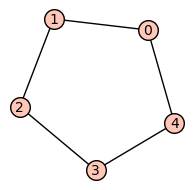

In [56]:
#graph of matrix A
n=5
H=Graph([])
H.add_vertices(range(n))
for i in range(0,n):
    for j in range(i+1,n):
        if A[i][j] != 0:
            H.add_edge((i,j))
H.show(figsize=(2,2))

In [6]:
#['023', '1234', '0124', '0134']

var('a00,a01,a11,a12,a22,a23,a04,a14')
var('b03,b04,b13,b14,b23,b24')
var('x,y')

# b03=1
# b23=1
# b14=1
# b24=1

B=Matrix([
    [1,0,0,b03,b04],
    [0,1,0,0,b14],
    [0,0,1,b23,b24]
])
print B, '\n'

# a00 = 0
# a01 = (b14*b23* x - b23* y)/(b03*b24)
# a11 =  x
# a12 = -(b14* x -  y)/b24
# a22 = (b14^2* x - b14* y)/b24^2
# a23 = (b14^2*b23* x - b14*b23* y)/b24^2
# a04 = (b14^2*b23* x - b14*b23* y)/(b03*b24)
# a14 =  y

Ac=Matrix([
    [a00,a01,0],
    [a01,a11,a12],
    [0,a12,a22],
    [0,0,a23],
    [a04,a14,0]
])
print Ac, '\n'

A=Ac*B

print A

[  1   0   0 b03 b04]
[  0   1   0   0 b14]
[  0   0   1 b23 b24] 

[a00 a01   0]
[a01 a11 a12]
[  0 a12 a22]
[  0   0 a23]
[a04 a14   0] 

[                        a00                         a01                           0                     a00*b03           a00*b04 + a01*b14]
[                        a01                         a11                         a12           a01*b03 + a12*b23 a01*b04 + a11*b14 + a12*b24]
[                          0                         a12                         a22                     a22*b23           a12*b14 + a22*b24]
[                          0                           0                         a23                     a23*b23                     a23*b24]
[                        a04                         a14                           0                     a04*b03           a04*b04 + a14*b14]


In [7]:
Eq=[]
for i in range(5):
    for j in range(5):
        Eq.append(A[i][j]==A[j][i])
        #print i,j, ' ', A[i][j], ' = ', A[j][i]

In [8]:
S=solve(Eq,[a00,a01,a11,a12,a22,a23,a04,a14])
S

[[a00 == 0, a01 == -b23*r2/b03, a11 == r1, a12 == r2, a22 == -b14*r2/b24, a23 == -b14*b23*r2/b24, a04 == -b14*b23*r2/b03, a14 == -(b04*b23*r2 - (b14*r1 + b24*r2)*b03)/b03]]

In [37]:
#['023', '1234', '0124', '0134']

var('a00,a01,a11,a12,a22,a23,a04,a14')
var('b03,b04,b13,b14,b23,b24')
var('x,y')

b03=1
b23=1
b04=2
b14=1
b24=1

B=Matrix([
    [1,0,0,b03,b04],
    [0,1,0,0,b14],
    [0,0,1,b23,b24]
])
print B, '\n'

a00 = 0
a01 = -b23*y/b03
a11 = x 
a12 = y
a22 = -b14*y/b24
a23 = -b14*b23*y/b24
a04 = -b14*b23*y/b03
a14 = -(b04*b23*y - (b14*x + b24*y)*b03)/b03

Ac=Matrix([
    [a00,a01,0],
    [a01,a11,a12],
    [0,a12,a22],
    [0,0,a23],
    [a04,a14,0]
])
print Ac, '\n'

A=Ac*B

print A

[1 0 0 1 2]
[0 1 0 0 1]
[0 0 1 1 1] 

[    0    -y     0]
[   -y     x     y]
[    0     y    -y]
[    0     0    -y]
[   -y x - y     0] 

[      0      -y       0       0      -y]
[     -y       x       y       0   x - y]
[      0       y      -y      -y       0]
[      0       0      -y      -y      -y]
[     -y   x - y       0      -y x - 3*y]


In [39]:
#['023', '1234', '0124', '0134']

var('a00,a01,a11,a12,a22,a23,a04,a14')
var('b03,b04,b13,b14,b23,b24')
var('x,y')

b03=1
b23=1
b04=2
b14=1
b24=1

x=1
y=2

B=Matrix([
    [1,0,0,b03,b04],
    [0,1,0,0,b14],
    [0,0,1,b23,b24]
])
print B, '\n'

a00 = 0
a01 = -b23*y/b03
a11 = x 
a12 = y
a22 = -b14*y/b24
a23 = -b14*b23*y/b24
a04 = -b14*b23*y/b03
a14 = -(b04*b23*y - (b14*x + b24*y)*b03)/b03

Ac=Matrix([
    [a00,a01,0],
    [a01,a11,a12],
    [0,a12,a22],
    [0,0,a23],
    [a04,a14,0]
])
print Ac, '\n'

A=Ac*B

print A

[1 0 0 1 2]
[0 1 0 0 1]
[0 0 1 1 1] 

[ 0 -2  0]
[-2  1  2]
[ 0  2 -2]
[ 0  0 -2]
[-2 -1  0] 

[ 0 -2  0  0 -2]
[-2  1  2  0 -1]
[ 0  2 -2 -2  0]
[ 0  0 -2 -2 -2]
[-2 -1  0 -2 -5]


In [30]:
MB=Matroid(B)
print sorted([sorted(c) for c in MB.circuits()])

[[0, 1, 2, 4], [0, 1, 3, 4], [0, 2, 3], [1, 2, 3, 4]]


In [40]:
MA=Matroid(A)
print sorted([sorted(c) for c in MA.circuits()])

[[0, 1, 2, 4], [0, 1, 3, 4], [0, 2, 3], [1, 2, 3, 4]]


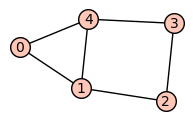

In [41]:
#graph of matrix A
n=5
H=Graph([])
H.add_vertices(range(n))
for i in range(0,n):
    for j in range(i+1,n):
        if A[i][j] != 0:
            H.add_edge((i,j))
H.show(figsize=(2,2))

In [42]:
#['023', '1234', '0124', '0134']

var('a00,a01,a11,a12,a22,a23,a04,a14')
var('b03,b04,b13,b14,b23,b24')
var('x,y')

b03=1
b23=1
b04=2
b14=1
b24=1

x=1
y=1

B=Matrix([
    [1,0,0,b03,b04],
    [0,1,0,0,b14],
    [0,0,1,b23,b24]
])
print B, '\n'

a00 = 0
a01 = -b23*y/b03
a11 = x 
a12 = y
a22 = -b14*y/b24
a23 = -b14*b23*y/b24
a04 = -b14*b23*y/b03
a14 = -(b04*b23*y - (b14*x + b24*y)*b03)/b03

Ac=Matrix([
    [a00,a01,0],
    [a01,a11,a12],
    [0,a12,a22],
    [0,0,a23],
    [a04,a14,0]
])
print Ac, '\n'

A=Ac*B

print A
print A.rank()

[1 0 0 1 2]
[0 1 0 0 1]
[0 0 1 1 1] 

[ 0 -1  0]
[-1  1  1]
[ 0  1 -1]
[ 0  0 -1]
[-1  0  0] 

[ 0 -1  0  0 -1]
[-1  1  1  0  0]
[ 0  1 -1 -1  0]
[ 0  0 -1 -1 -1]
[-1  0  0 -1 -2]
3


In [43]:
MA=Matroid(A)
print sorted([sorted(c) for c in MA.circuits()])

[[0, 1, 2, 4], [0, 1, 3, 4], [0, 2, 3], [1, 2, 3, 4]]


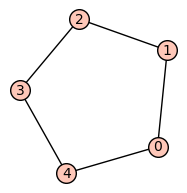

In [44]:
#graph of matrix A
n=5
H=Graph([])
H.add_vertices(range(n))
for i in range(0,n):
    for j in range(i+1,n):
        if A[i][j] != 0:
            H.add_edge((i,j))
H.show(figsize=(2,2))

In [128]:
#['023', '124', '0134']  and ['023', '134', '0124']

var('b03,b04,b13,b14,b23,b24')

b03=1
b23=1
b14=1
b24=1

B=Matrix([
    [1,0,0,b03,0],
    [0,1,0,0,b14],
    [0,0,1,b23,b24]
])
B




[1 0 0 1 0]
[0 1 0 0 1]
[0 0 1 1 1]

In [133]:
var('a00,a01,a11,a12,a22,a23,a04,a14')
var('b03,b04,b13,b14,b23,b24')
var('x,y')

b03=1
b23=1
b14=1
b24=1

x=1
y=2


a00 = 0
a01 = (b14*b23* x - b23* y)/(b03*b24)
a11 =  x
a12 = -(b14* x -  y)/b24
a22 = (b14^2* x - b14* y)/b24^2
a23 = (b14^2*b23* x - b14*b23* y)/b24^2
a04 = (b14^2*b23* x - b14*b23* y)/(b03*b24)
a14 =  y


Ac=Matrix([
    [a00,a01,0],
    [a01,a11,a12],
    [0,a12,a22],
    [0,0,a23],
    [a04,a14,0]
])
Ac

[ 0 -1  0]
[-1  1  1]
[ 0  1 -1]
[ 0  0 -1]
[-1  2  0]

In [134]:
A=Ac*B

In [135]:
print A
print A.rank()

[ 0 -1  0  0 -1]
[-1  1  1  0  2]
[ 0  1 -1 -1  0]
[ 0  0 -1 -1 -1]
[-1  2  0 -1  2]
3


In [122]:
MA=Matroid(A)
print sorted([sorted(c) for c in MA.circuits()])

[[0, 1, 3, 4], [0, 2, 3], [1, 2, 4]]


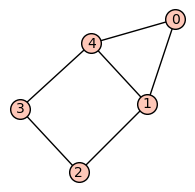

In [136]:
#graph of matrix A
n=5
H=Graph([])
H.add_vertices(range(n))
for i in range(0,n):
    for j in range(i+1,n):
        if A[i][j] != 0:
            H.add_edge((i,j))
H.show(figsize=(2,2))

In [141]:
var('a00,a01,a11,a12,a22,a23,a04,a14')
var('b03,b04,b13,b14,b23,b24')
var('x,y')

b03=1
b23=1
b14=1
b24=1

x=1
y=0


a00 = 0
a01 = (b14*b23* x - b23* y)/(b03*b24)
a11 =  x
a12 = -(b14* x -  y)/b24
a22 = (b14^2* x - b14* y)/b24^2
a23 = (b14^2*b23* x - b14*b23* y)/b24^2
a04 = (b14^2*b23* x - b14*b23* y)/(b03*b24)
a14 =  y


Ac=Matrix([
    [a00,a01,0],
    [a01,a11,a12],
    [0,a12,a22],
    [0,0,a23],
    [a04,a14,0]
])
Ac

[ 0  1  0]
[ 1  1 -1]
[ 0 -1  1]
[ 0  0  1]
[ 1  0  0]

In [142]:
A=Ac*B

In [143]:
print A
print A.rank()

[ 0  1  0  0  1]
[ 1  1 -1  0  0]
[ 0 -1  1  1  0]
[ 0  0  1  1  1]
[ 1  0  0  1  0]
3


In [144]:
MA=Matroid(A)
print sorted([sorted(c) for c in MA.circuits()])

[[0, 1, 3, 4], [0, 2, 3], [1, 2, 4]]


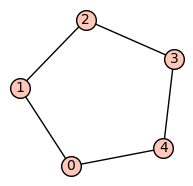

In [145]:
#graph of matrix A
n=5
H=Graph([])
H.add_vertices(range(n))
for i in range(0,n):
    for j in range(i+1,n):
        if A[i][j] != 0:
            H.add_edge((i,j))
H.show(figsize=(2,2))

In [113]:
Eq=[]
for i in range(5):
    for j in range(5):
        Eq.append(A[i][j]==A[j][i])
        #print i,j, ' ', A[i][j], ' = ', A[j][i]

In [114]:
S=solve(Eq,[a00,a01,a11,a12,a22,a23,a04,a14])
S

[[a00 == 0, a01 == (b14*b23*r10 - b23*r9)/(b03*b24), a11 == r10, a12 == -(b14*r10 - r9)/b24, a22 == (b14^2*r10 - b14*r9)/b24^2, a23 == (b14^2*b23*r10 - b14*b23*r9)/b24^2, a04 == (b14^2*b23*r10 - b14*b23*r9)/(b03*b24), a14 == r9]]

In [82]:
#['124', '013', '0234'] and ['024', '134', '0123']

var('b03,b04,b13,b14,b23,b24')

b03=1
b13=1
b14=1
b24=1

B=Matrix([
    [1,0,0,b03,0],
    [0,1,0,b13,b14],
    [0,0,1,0,b24]
])
B


[1 0 0 1 0]
[0 1 0 1 1]
[0 0 1 0 1]

In [98]:
var('a00,a01,a11,a12,a22,a23,a04,a14')
var('b03,b04,b13,b14,b23,b24')
var('x,y')

b03=1
b13=1
b14=1
b24=1

x=1
y=2


a00 = b13^2*x/b03^2
a01 = -b13*x/b03
a11 = x
a12 = -(b14*x - y)/b24
a22 = (b14^2*x - b14*y)/b24^2
a23 = -(b14*x - y)*b13/b24
a04 = -b13*b14*x/b03
a14 = y



Ac=Matrix([
    [a00,a01,0],
    [a01,a11,a12],
    [0,a12,a22],
    [0,0,a23],
    [a04,a14,0]
])
Ac

[ 1 -1  0]
[-1  1  1]
[ 0  1 -1]
[ 0  0  1]
[-1  2  0]

In [99]:
A=Ac*B

In [100]:
print A
print A.rank()

[ 1 -1  0  0 -1]
[-1  1  1  0  2]
[ 0  1 -1  1  0]
[ 0  0  1  0  1]
[-1  2  0  1  2]
3


In [101]:
MA=Matroid(A)
print sorted([sorted(c) for c in MA.circuits()])

[[0, 1, 3], [0, 2, 3, 4], [1, 2, 4]]


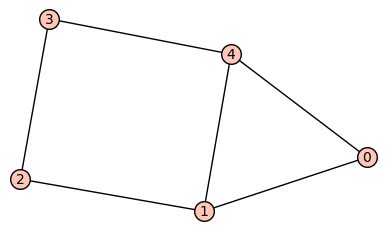

In [94]:
#graph of matrix A
n=5
H=Graph([])
H.add_vertices(range(n))
for i in range(0,n):
    for j in range(i+1,n):
        if A[i][j] != 0:
            H.add_edge((i,j))
H.show()

In [102]:
var('a00,a01,a11,a12,a22,a23,a04,a14')
var('b03,b04,b13,b14,b23,b24')
var('x,y')

b03=1
b13=1
b14=1
b24=1

x=1
y=0


a00 = b13^2*x/b03^2
a01 = -b13*x/b03
a11 = x
a12 = -(b14*x - y)/b24
a22 = (b14^2*x - b14*y)/b24^2
a23 = -(b14*x - y)*b13/b24
a04 = -b13*b14*x/b03
a14 = y



Ac=Matrix([
    [a00,a01,0],
    [a01,a11,a12],
    [0,a12,a22],
    [0,0,a23],
    [a04,a14,0]
])
Ac

[ 1 -1  0]
[-1  1 -1]
[ 0 -1  1]
[ 0  0 -1]
[-1  0  0]

In [103]:
A=Ac*B
print A
print A.rank()

[ 1 -1  0  0 -1]
[-1  1 -1  0  0]
[ 0 -1  1 -1  0]
[ 0  0 -1  0 -1]
[-1  0  0 -1  0]
3


In [104]:
MA=Matroid(A)
print sorted([sorted(c) for c in MA.circuits()])

[[0, 1, 3], [0, 2, 3, 4], [1, 2, 4]]


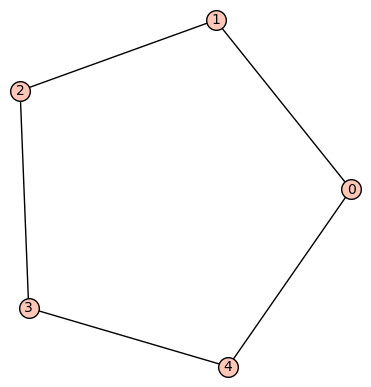

In [97]:
#graph of matrix A
n=5
H=Graph([])
H.add_vertices(range(n))
for i in range(0,n):
    for j in range(i+1,n):
        if A[i][j] != 0:
            H.add_edge((i,j))
H.show()

In [75]:
Eq=[]
for i in range(5):
    for j in range(5):
        Eq.append(A[i][j]==A[j][i])
        #print i,j, ' ', A[i][j], ' = ', A[j][i]

In [81]:
S=solve(Eq,[a00,a01,a11,a12,a22,a23,a04,a14])
S

[[a00 == b13^2*r8/b03^2, a01 == -b13*r8/b03, a11 == r8, a12 == -(b14*r8 - r7)/b24, a22 == (b14^2*r8 - b14*r7)/b24^2, a23 == -(b14*r8 - r7)*b13/b24, a04 == -b13*b14*r8/b03, a14 == r7]]

In [45]:
#['024', '013', '1234']

var('b03,b04,b13,b14,b23,b24')

b03=1
b13=1
b04=1
b24=1

B=Matrix([
    [1,0,0,b03,b04],
    [0,1,0,b13,0],
    [0,0,1,0,b24]
])
B

[1 0 0 1 1]
[0 1 0 1 0]
[0 0 1 0 1]

In [46]:
var('a00,a01,a11,a12,a22,a23,a04,a14')
var('b03,b04,b13,b14,b23,b24')
var('x,y')

b03=1
b13=1
b04=1
b24=1


a00=x
a01=-(b03/b13)*x
a11=(b03^2/b13^2)*x
a12=(b03*b04/(b13*b24))*x+(1/b24)*y
a22=0
a23=(b03*b04/b24)*x+(b13/b24)*y
a04=b04*x
a14=y


Ac=Matrix([
    [a00,a01,0],
    [a01,a11,a12],
    [0,a12,a22],
    [0,0,a23],
    [a04,a14,0]
])
Ac

[    x    -x     0]
[   -x     x x + y]
[    0 x + y     0]
[    0     0 x + y]
[    x     y     0]

In [48]:
A=expand(Ac*B)
print A.list()
A.is_symmetric()

[x, -x, 0, 0, x, -x, x, x + y, 0, y, 0, x + y, 0, x + y, 0, 0, 0, x + y, 0, x + y, x, y, 0, x + y, x]


True

In [52]:
var('x,y')

x=1
y=2

A=Matrix([
    [x, -x, 0, 0, x],
    [-x, x, x + y, 0, y],
    [0, x + y, 0, x + y, 0],
    [0, 0, x + y, 0, x + y],
    [x, y, 0, x + y, x]
])
print A
print
print A.rank()

[ 1 -1  0  0  1]
[-1  1  3  0  2]
[ 0  3  0  3  0]
[ 0  0  3  0  3]
[ 1  2  0  3  1]

3


In [62]:
MA=Matroid(A)
print sorted([sorted(c) for c in MA.circuits()])

[[0, 1, 3], [0, 2, 4], [1, 2, 3, 4]]


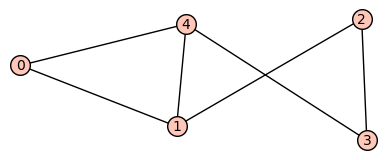

In [53]:
#graph of matrix A
n=5
H=Graph([])
H.add_vertices(range(n))
for i in range(0,n):
    for j in range(i+1,n):
        if A[i][j] != 0:
            H.add_edge((i,j))
H.show()

In [59]:
var('x,y')

x=1
y=0

A=Matrix([
    [x, -x, 0, 0, x],
    [-x, x, x + y, 0, y],
    [0, x + y, 0, x + y, 0],
    [0, 0, x + y, 0, x + y],
    [x, y, 0, x + y, x]
])
print A
print
print A.rank()

[ 1 -1  0  0  1]
[-1  1  1  0  0]
[ 0  1  0  1  0]
[ 0  0  1  0  1]
[ 1  0  0  1  1]

3


In [61]:
MA=Matroid(A)
print sorted([sorted(c) for c in MA.circuits()])

[[0, 1, 3], [0, 2, 4], [1, 2, 3, 4]]


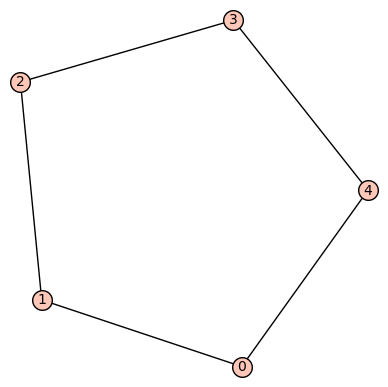

In [55]:
#graph of matrix A
n=5
H=Graph([])
H.add_vertices(range(n))
for i in range(0,n):
    for j in range(i+1,n):
        if A[i][j] != 0:
            H.add_edge((i,j))
H.show()

In [27]:
solve([A[0][3]==A[3][0],A[0][4]==A[0][4],A[1][3]==A[3][1],A[1][4]==A[4][1],A[2][3]==A[3][2],A[2][4]==A[4][2],A[3][4]==A[4][3]],[a00,a01,a11,a12,a22,a23,a04,a14])



[[a00 == r2, a01 == -b03*r2/b13, a11 == b03^2*r2/b13^2, a12 == (b03*b04*r2 + b13*r1)/(b13*b24), a22 == 0, a23 == (b03*b04*r2 + b13*r1)/b24, a04 == b04*r2, a14 == r1]]

In [ ]:


[[a00 == r2, a01 == -b03*r2/b13, a11 == b03^2*r2/b13^2, a12 == (b03*b04*r2 + b13*r1)/(b13*b24), a22 == 0, a23 == (b03*b04*r2 + b13*r1)/b24, a04 == b04*r2, a14 == r1]]




In [31]:
var('x,y')

expand((b03*b04*x + b13*y)/(b13*b24))

b03*b04*x/(b13*b24) + y/b24

In [21]:
m=FG.clique_number()
for k in range(1,m+1):
    print k
    C=CompCollForts(G,k,data_type='string')
    for c in C:
        M=Matroid(groundset='01234',circuits=c)
        print c, M.rank()
        #print [list(b) for b in M.bases()]
        #print 

1
['023'] 4
['124'] 4
['024'] 4
['013'] 4
['134'] 4
['1234'] 4
['0234'] 4
['0123'] 4
['0124'] 4
['0134'] 4
['01234'] 4
2
3
['024', '134', '0123'] 3
['024', '013', '1234'] 3
['124', '013', '0234'] 3
['023', '134', '0124'] 3
['023', '124', '0134'] 3
4
['134', '0234', '0123', '0124'] 3
['013', '1234', '0234', '0124'] 3
['024', '1234', '0123', '0134'] 3
['124', '0234', '0123', '0134'] 3
['023', '1234', '0124', '0134'] 3
5
['1234', '0234', '0123', '0124', '0134'] 3


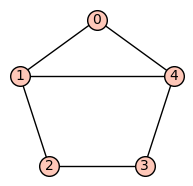

In [8]:
H=graphs.CycleGraph(5)
H.add_edge(1,4)
FG=Fort_RGraph(H)
H.show(figsize=(2,2))

In [14]:
m=FG.clique_number()
for k in range(1,m+1):
    print k
    C=CompCollForts(G,k,data_type='string')
    for c in C:
        M=Matroid(groundset='01234',circuits=c)
        print c, M.rank()
        #print [list(b) for b in M.bases()]
        #print 

1
['023'] 4
['124'] 4
['024'] 4
['013'] 4
['134'] 4
['1234'] 4
['0234'] 4
['0123'] 4
['0124'] 4
['0134'] 4
['01234'] 4
2
3
['024', '134', '0123'] 3
['024', '013', '1234'] 3
['124', '013', '0234'] 3
['023', '134', '0124'] 3
['023', '124', '0134'] 3
4
['134', '0234', '0123', '0124'] 3
['013', '1234', '0234', '0124'] 3
['024', '1234', '0123', '0134'] 3
['124', '0234', '0123', '0134'] 3
['023', '1234', '0124', '0134'] 3
5
['1234', '0234', '0123', '0124', '0134'] 3


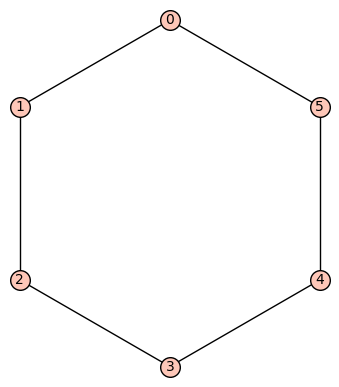

[[0, 2, 4],
 [1, 3, 5],
 [0, 1, 3, 5],
 [1, 2, 3, 5],
 [0, 2, 4, 5],
 [1, 2, 4, 5],
 [0, 2, 3, 5],
 [0, 2, 3, 4],
 [1, 3, 4, 5],
 [0, 1, 2, 4],
 [0, 1, 3, 4],
 [0, 1, 2, 3, 5],
 [1, 2, 3, 4, 5],
 [0, 1, 3, 4, 5],
 [0, 1, 2, 4, 5],
 [0, 1, 2, 3, 4],
 [0, 2, 3, 4, 5],
 [0, 1, 2, 3, 4, 5]]

In [5]:
G=graphs.CycleGraph(6)
G.show()
All_Forts(G)

In [6]:
FG=Fort_RGraph(G)

In [8]:
m=FG.clique_number()
for k in range(1,m+1):
    print k
    C=CompCollForts(G,k,data_type='string')
    for c in C:
        M=Matroid(groundset='012345',circuits=c)
        print c, M.rank()
        #print [list(b) for b in M.bases()]
        #print 

1
['024'] 5
['135'] 5
['0135'] 5
['1235'] 5
['0245'] 5
['1245'] 5
['0235'] 5
['0234'] 5
['1345'] 5
['0124'] 5
['0134'] 5
['01235'] 5
['12345'] 5
['01345'] 5
['01245'] 5
['01234'] 5
['02345'] 5
['012345'] 5
2
['024', '135'] 4
3
['0235', '1345', '0124'] 4
['1245', '0235', '0134'] 4
['1235', '0245', '0134'] 4
['0135', '1245', '0234'] 4
['135', '0124', '02345'] 4
['135', '0234', '01245'] 4
['135', '0245', '01234'] 4
['024', '1345', '01235'] 4
['024', '1235', '01345'] 4
['024', '0135', '12345'] 4
4
['1345', '0124', '01235', '02345'] 4
['0234', '1345', '01235', '01245'] 4
['0235', '0134', '12345', '01245'] 4
['0235', '0124', '12345', '01345'] 4
['0235', '1345', '01245', '01234'] 4
['1245', '0134', '01235', '02345'] 4
['1245', '0234', '01235', '01345'] 4
['1245', '0235', '01345', '01234'] 4
['0245', '0134', '01235', '12345'] 4
['0245', '1345', '01235', '01234'] 4
['1235', '0134', '01245', '02345'] 4
['1235', '0124', '01345', '02345'] 4
['1235', '0234', '01345', '01245'] 4
['1235', '0245', '01

In [48]:
C=['23','14','135','345','125','245']
M=Matroid(groundset='12345',circuits=C)
Mdual=M.dual()

In [49]:
sorted([sorted(c) for c in Mdual.circuits()])

[['1', '2', '3', '4'], ['1', '4', '5'], ['2', '3', '5']]

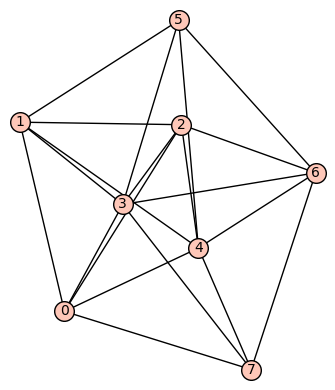

[[0], [0, 5], [0, 6], [1], [1, 6], [1, 7], [2], [2, 5], [2, 5, 7], [2, 7], [3], [3, 4], [4], [5], [5, 7], [6], [7], []]


In [2]:
#'G~xX{s'
G=Graph('G~xX{s')
G.show()

var('m00,m01,m02,m10,m11,m12,m20,m21,m22,m30,m31,m32,m40,m41,m42,m50,m51,m52,m60,m61,m62,m70,m71,m72')
var('m03,m04,m13,m14,m23,m24,m33,m34,m43,m44,m53,m54,m63,m64,m73,m74')




M=Matrix([[1,0,1,2,2],
         [1,1,0,2,1],
         [1,0,0,0,0],
         [1,1,3,3,3],
         [1,2,5,2,4],
         [0,1,0,0,0],
         [1,2,3,1,1],
         [0,0,1,0,0]])
D=Matrix([[1,0,0,0,0],
         [0,1,0,0,0],
         [0,0,1,0,0],
         [0,0,0,-1,0],
         [0,0,0,0,-1]])


MT=M.transpose()

A=M*D*MT

I=IndependentSets(G)
print list(I)

In [7]:
for i in range(7):
    N=G.neighbors(i)
    for j in range(i+1,8):
        Aij=A[i][j]
        if j in N:
            print i,j,':','0 != ',expand(Aij)
        else:
            print i,j,':','0 = ', expand(Aij)

0 1 : 0 !=  -5
0 2 : 0 !=  1
0 3 : 0 !=  -8
0 4 : 0 !=  -6
0 5 : 0 =  0
0 6 : 0 =  0
0 7 : 0 !=  1
1 2 : 0 !=  1
1 3 : 0 !=  -7
1 4 : 0 !=  -5
1 5 : 0 !=  1
1 6 : 0 =  0
1 7 : 0 =  0
2 3 : 0 !=  1
2 4 : 0 !=  1
2 5 : 0 =  0
2 6 : 0 !=  1
2 7 : 0 =  0
3 4 : 0 =  0
3 5 : 0 !=  1
3 6 : 0 !=  6
3 7 : 0 !=  3
4 5 : 0 !=  2
4 6 : 0 !=  14
4 7 : 0 !=  5
5 6 : 0 !=  2
5 7 : 0 =  0
6 7 : 0 !=  3


In [3]:
A

[-6 -5  1 -8 -6  0  0  1]
[-5 -3  1 -7 -5  1  0  0]
[ 1  1  1  1  1  0  1  0]
[-8 -7  1 -7  0  1  6  3]
[-6 -5  1  0 10  2 14  5]
[ 0  1  0  1  2  1  2  0]
[ 0  0  1  6 14  2 12  3]
[ 1  0  0  3  5  0  3  1]

In [4]:
M=Matroid(A)
print M.rank()
print sorted([sorted(c) for c in M.circuits()])

5
[[0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 6], [0, 1, 2, 3, 4, 7], [0, 1, 2, 4, 5, 6], [0, 1, 2, 4, 6, 7], [0, 1, 3, 4, 5, 6], [0, 1, 3, 4, 6, 7], [0, 1, 4, 5, 7], [0, 2, 3, 5, 6], [0, 2, 3, 5, 7], [0, 2, 3, 6, 7], [0, 2, 5, 6, 7], [0, 3, 5, 6, 7], [1, 2, 3, 4, 5, 6], [1, 2, 3, 4, 5, 7], [1, 2, 3, 4, 6, 7], [1, 2, 4, 5, 6, 7], [1, 3, 4, 5, 6, 7], [2, 3, 5, 6, 7]]


In [46]:
print len(C)
C

19


[[0, 1, 2, 3, 4, 5],
 [0, 1, 2, 3, 4, 6],
 [0, 1, 2, 3, 4, 7],
 [0, 1, 2, 4, 5, 6],
 [0, 1, 2, 4, 6, 7],
 [0, 1, 3, 4, 5, 6],
 [0, 1, 3, 4, 6, 7],
 [0, 1, 4, 5, 7],
 [0, 2, 3, 5, 6],
 [0, 2, 3, 5, 7],
 [0, 2, 3, 6, 7],
 [0, 2, 5, 6, 7],
 [0, 3, 5, 6, 7],
 [1, 2, 3, 4, 5, 6],
 [1, 2, 3, 4, 5, 7],
 [1, 2, 3, 4, 6, 7],
 [1, 2, 4, 5, 6, 7],
 [1, 3, 4, 5, 6, 7],
 [2, 3, 5, 6, 7]]

In [101]:
A.right_kernel()

Free module of degree 8 and rank 3 over Integer Ring
Echelon basis matrix:
[ 1  0  1  0  0  4 -2  5]
[ 0  2  1 -1  1  3 -3  7]
[ 0  0  2  1  0  5 -3  6]

In [11]:
B=Matrix([
    [ 1,  0,  1,  0,  0,  4, -2,  5],
[ 0,  2,  1, -1,  1,  3, -3,  7],
[ 0,  0,  2,  1,  0,  5, -3,  6]
])
B

[ 1  0  1  0  0  4 -2  5]
[ 0  2  1 -1  1  3 -3  7]
[ 0  0  2  1  0  5 -3  6]

In [12]:
B.rref()

[   1    0    0 -1/2    0  3/2 -1/2    2]
[   0    1    0 -3/4  1/2  1/4 -3/4    2]
[   0    0    1  1/2    0  5/2 -3/2    3]

In [14]:
F=[vector([1,0,0,-2,0,6,-6,2]),vector([0,1,0,-3,1,1,-3,2]),vector([0,0,1,2,0,10,-2,3])]

In [15]:
from sage.modules.misc import gram_schmidt

In [16]:
G = gram_schmidt(F)

In [17]:
G

(
[(1, 0, 0, -2, 0, 6, -6, 2), (-34/81, 1, 0, -175/81, 1, -41/27, -13/27, 94/81), (-1306/869, 1220/869, 1, 690/869, 1220/869, 2074/869, 2438/869, 2435/869)],

[        0         0         0]
[    34/81         0         0]
[    74/81 -1220/869         0]
)

In [19]:
M=Matrix([[1,0,1,2,2],
         [1,1,0,2,1],
         [1,0,0,0,0],
         [1,1,3,3,3],
         [1,2,5,2,4],
         [0,1,0,0,0],
         [1,2,3,1,1],
         [0,0,1,0,0]])
D=Matrix([[1,0,0,0,0],
         [0,1,0,0,0],
         [0,0,1,0,0],
         [0,0,0,-1,0],
         [0,0,0,0,-1]])


MT=M.transpose()

A=M*D*MT



In [20]:
A

[-6 -5  1 -8 -6  0  0  1]
[-5 -3  1 -7 -5  1  0  0]
[ 1  1  1  1  1  0  1  0]
[-8 -7  1 -7  0  1  6  3]
[-6 -5  1  0 10  2 14  5]
[ 0  1  0  1  2  1  2  0]
[ 0  0  1  6 14  2 12  3]
[ 1  0  0  3  5  0  3  1]

In [23]:
A.eigenvectors_right()

[(0, [
  (1, 0, 0, -1/2, 0, 3/2, -1/2, 2),
  (0, 1, 0, -3/4, 1/2, 1/4, -3/4, 2),
  (0, 0, 1, 1/2, 0, 5/2, -3/2, 3)
  ], 3),
 (-22.31288582386682?,
  [(1, 0.803678362267906?, -0.130816333317528?, 1.099412295714014?, 0.520087081827031?, -0.094210637141560?, -0.373471497280532?, -0.247856822535460?)],
  1),
 (-0.9630446976391128?,
  [(1, -3.469068988056542?, 2.678154357182585?, -5.048001162842118?, 8.42338620921901?, 2.036430079540135?, -6.163652768646707?, -4.830236042527307?)],
  1),
 (1.267356290532781?,
  [(1, -0.2811596663419011?, 2.288292683188300?, -0.1816046689281397?, -0.2827690269396637?, -1.173178971191805?, 0.3573228056402316?, 0.4238137625718765?)],
  1),
 (2.469034121482328?,
  [(1, -12.324947839720271?, -6.645388061258100?, 5.102903726473358?, 2.060763331164562?, -9.736029478525647?, -5.601021030397086?, 6.677492782913303?)],
  1),
 (28.53954010949082?,
  [(1, 0.90456526949950?, -0.346230232840830?, -1.424855791033735?, -4.929600624602105?, -0.746190828374093?, -5.085130238

In [24]:
W=Matrix([
    [0,1,-1],
    [1,0,1],
    [1,1,0]
])

In [25]:
W.eigenvectors_right()

[(1, [
  (0, 1, 1)
  ], 1), (0, [
  (1, -1, -1)
  ], 1), (-1, [
  (1, -1, 0)
  ], 1)]

In [1]:
C=Matrix([
    [1,0,0,1,0,1,1,1],
    [0,1,0,1,1,3,1,5],
    [0,0,1,1,0,2,3,4]
])

In [6]:
C

[1 0 0 1 0 1 1 1]
[0 1 0 1 1 3 1 5]
[0 0 1 1 0 2 3 4]

In [8]:
MC=Matroid(C)


In [9]:
print sorted([sorted(c) for c in MC.circuits()])

[[0, 1, 2, 3], [0, 1, 2, 5], [0, 1, 2, 6], [0, 1, 2, 7], [0, 1, 3, 5], [0, 1, 3, 6], [0, 1, 3, 7], [0, 1, 5, 6], [0, 1, 5, 7], [0, 1, 6, 7], [0, 2, 3, 4], [0, 2, 3, 5], [0, 2, 3, 7], [0, 2, 4, 5], [0, 2, 4, 6], [0, 2, 4, 7], [0, 2, 5, 6], [0, 2, 5, 7], [0, 2, 6, 7], [0, 3, 4, 5], [0, 3, 4, 6], [0, 3, 4, 7], [0, 3, 5, 6], [0, 3, 5, 7], [0, 3, 6, 7], [0, 4, 5, 6], [0, 4, 5, 7], [0, 4, 6, 7], [0, 5, 6, 7], [1, 2, 3, 5], [1, 2, 3, 7], [1, 2, 5, 6], [1, 2, 5, 7], [1, 2, 6, 7], [1, 3, 5, 6], [1, 3, 5, 7], [1, 3, 6, 7], [1, 4], [1, 5, 6, 7], [2, 3, 4, 5], [2, 3, 4, 7], [2, 3, 5, 7], [2, 3, 6], [2, 4, 5, 6], [2, 4, 5, 7], [2, 4, 6, 7], [2, 5, 6, 7], [3, 4, 5, 6], [3, 4, 5, 7], [3, 4, 6, 7], [3, 5, 6, 7], [4, 5, 6, 7]]


In [23]:
M.is_isomorphic(MC)

False

In [24]:
B=sorted([sorted(b) for b in MC.bases()])
print B

[[0, 1, 2], [0, 1, 3], [0, 1, 5], [0, 1, 6], [0, 1, 7], [0, 2, 3], [0, 2, 4], [0, 2, 5], [0, 2, 6], [0, 2, 7], [0, 3, 4], [0, 3, 5], [0, 3, 6], [0, 3, 7], [0, 4, 5], [0, 4, 6], [0, 4, 7], [0, 5, 6], [0, 5, 7], [0, 6, 7], [1, 2, 3], [1, 2, 5], [1, 2, 6], [1, 2, 7], [1, 3, 5], [1, 3, 6], [1, 3, 7], [1, 5, 6], [1, 5, 7], [1, 6, 7], [2, 3, 4], [2, 3, 5], [2, 3, 7], [2, 4, 5], [2, 4, 6], [2, 4, 7], [2, 5, 6], [2, 5, 7], [2, 6, 7], [3, 4, 5], [3, 4, 6], [3, 4, 7], [3, 5, 6], [3, 5, 7], [3, 6, 7], [4, 5, 6], [4, 5, 7], [4, 6, 7], [5, 6, 7]]


In [25]:
len(B)

49

In [33]:
S=range(8)
S7=Subsets(S,3)

In [34]:
B=[Set(b) for b in B]
S7=[Set(s) for s in S7]
print B, len(B)
print S7, len(S7)

[{0, 1, 2}, {0, 1, 3}, {0, 1, 5}, {0, 1, 6}, {0, 1, 7}, {0, 2, 3}, {0, 2, 4}, {0, 2, 5}, {0, 2, 6}, {0, 2, 7}, {0, 3, 4}, {0, 3, 5}, {0, 3, 6}, {0, 3, 7}, {0, 4, 5}, {0, 4, 6}, {0, 4, 7}, {0, 5, 6}, {0, 5, 7}, {0, 6, 7}, {1, 2, 3}, {1, 2, 5}, {1, 2, 6}, {1, 2, 7}, {1, 3, 5}, {1, 3, 6}, {1, 3, 7}, {1, 5, 6}, {1, 5, 7}, {1, 6, 7}, {2, 3, 4}, {2, 3, 5}, {2, 3, 7}, {2, 4, 5}, {2, 4, 6}, {2, 4, 7}, {2, 5, 6}, {2, 5, 7}, {2, 6, 7}, {3, 4, 5}, {3, 4, 6}, {3, 4, 7}, {3, 5, 6}, {3, 5, 7}, {3, 6, 7}, {4, 5, 6}, {4, 5, 7}, {4, 6, 7}, {5, 6, 7}] 49
[{0, 1, 2}, {0, 1, 3}, {0, 1, 4}, {0, 1, 5}, {0, 1, 6}, {0, 1, 7}, {0, 2, 3}, {0, 2, 4}, {0, 2, 5}, {0, 2, 6}, {0, 2, 7}, {0, 3, 4}, {0, 3, 5}, {0, 3, 6}, {0, 3, 7}, {0, 4, 5}, {0, 4, 6}, {0, 4, 7}, {0, 5, 6}, {0, 5, 7}, {0, 6, 7}, {1, 2, 3}, {1, 2, 4}, {1, 2, 5}, {1, 2, 6}, {1, 2, 7}, {1, 3, 4}, {1, 3, 5}, {1, 3, 6}, {1, 3, 7}, {1, 4, 5}, {1, 4, 6}, {1, 4, 7}, {1, 5, 6}, {1, 5, 7}, {1, 6, 7}, {2, 3, 4}, {2, 3, 5}, {2, 3, 6}, {2, 3, 7}, {2, 4, 5}, {2, 4

In [35]:
for s in S7:
    if s not in B:
        print s

{0, 1, 4}
{1, 2, 4}
{1, 3, 4}
{1, 4, 5}
{1, 4, 6}
{1, 4, 7}
{2, 3, 6}


In [42]:
sorted([sorted(c) for c in MCdual.circuits()])

[[0, 1, 2, 3, 4, 5],
 [0, 1, 2, 3, 4, 6],
 [0, 1, 2, 3, 4, 7],
 [0, 1, 2, 4, 5, 6],
 [0, 1, 2, 4, 6, 7],
 [0, 1, 3, 4, 5, 6],
 [0, 1, 3, 4, 6, 7],
 [0, 1, 4, 5, 7],
 [0, 2, 3, 5, 6],
 [0, 2, 3, 5, 7],
 [0, 2, 3, 6, 7],
 [0, 2, 5, 6, 7],
 [0, 3, 5, 6, 7],
 [1, 2, 3, 4, 5, 6],
 [1, 2, 3, 4, 5, 7],
 [1, 2, 3, 4, 6, 7],
 [1, 2, 4, 5, 6, 7],
 [1, 3, 4, 5, 6, 7],
 [2, 3, 5, 6, 7]]

In [43]:
sorted([sorted(c) for c in MC.circuits()])

[[0, 1, 2, 3],
 [0, 1, 2, 5],
 [0, 1, 2, 6],
 [0, 1, 2, 7],
 [0, 1, 3, 5],
 [0, 1, 3, 6],
 [0, 1, 3, 7],
 [0, 1, 5, 6],
 [0, 1, 5, 7],
 [0, 1, 6, 7],
 [0, 2, 3, 4],
 [0, 2, 3, 5],
 [0, 2, 3, 7],
 [0, 2, 4, 5],
 [0, 2, 4, 6],
 [0, 2, 4, 7],
 [0, 2, 5, 6],
 [0, 2, 5, 7],
 [0, 2, 6, 7],
 [0, 3, 4, 5],
 [0, 3, 4, 6],
 [0, 3, 4, 7],
 [0, 3, 5, 6],
 [0, 3, 5, 7],
 [0, 3, 6, 7],
 [0, 4, 5, 6],
 [0, 4, 5, 7],
 [0, 4, 6, 7],
 [0, 5, 6, 7],
 [1, 2, 3, 5],
 [1, 2, 3, 7],
 [1, 2, 5, 6],
 [1, 2, 5, 7],
 [1, 2, 6, 7],
 [1, 3, 5, 6],
 [1, 3, 5, 7],
 [1, 3, 6, 7],
 [1, 4],
 [1, 5, 6, 7],
 [2, 3, 4, 5],
 [2, 3, 4, 7],
 [2, 3, 5, 7],
 [2, 3, 6],
 [2, 4, 5, 6],
 [2, 4, 5, 7],
 [2, 4, 6, 7],
 [2, 5, 6, 7],
 [3, 4, 5, 6],
 [3, 4, 5, 7],
 [3, 4, 6, 7],
 [3, 5, 6, 7],
 [4, 5, 6, 7]]

In [21]:
print sorted([sorted(b) for b in MC.bases()])

[[0, 1, 2, 3, 4], [0, 1, 2, 3, 5], [0, 1, 2, 3, 6], [0, 1, 2, 3, 7], [0, 1, 2, 4, 5], [0, 1, 2, 4, 6], [0, 1, 2, 4, 7], [0, 1, 2, 5, 6], [0, 1, 2, 5, 7], [0, 1, 2, 6, 7], [0, 1, 3, 4, 5], [0, 1, 3, 4, 6], [0, 1, 3, 4, 7], [0, 1, 3, 5, 6], [0, 1, 3, 5, 7], [0, 1, 3, 6, 7], [0, 1, 4, 5, 6], [0, 1, 4, 6, 7], [0, 1, 5, 6, 7], [0, 2, 3, 4, 5], [0, 2, 3, 4, 6], [0, 2, 3, 4, 7], [0, 2, 4, 5, 6], [0, 2, 4, 5, 7], [0, 2, 4, 6, 7], [0, 3, 4, 5, 6], [0, 3, 4, 5, 7], [0, 3, 4, 6, 7], [0, 4, 5, 6, 7], [1, 2, 3, 4, 5], [1, 2, 3, 4, 6], [1, 2, 3, 4, 7], [1, 2, 3, 5, 6], [1, 2, 3, 5, 7], [1, 2, 3, 6, 7], [1, 2, 4, 5, 6], [1, 2, 4, 5, 7], [1, 2, 4, 6, 7], [1, 2, 5, 6, 7], [1, 3, 4, 5, 6], [1, 3, 4, 5, 7], [1, 3, 4, 6, 7], [1, 3, 5, 6, 7], [1, 4, 5, 6, 7], [2, 3, 4, 5, 6], [2, 3, 4, 5, 7], [2, 3, 4, 6, 7], [2, 4, 5, 6, 7], [3, 4, 5, 6, 7]]


In [113]:
print CMC

[[0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 6], [0, 1, 2, 3, 4, 7], [0, 1, 2, 4, 5, 6], [0, 1, 2, 4, 6, 7], [0, 1, 3, 4, 5, 6], [0, 1, 3, 4, 6, 7], [0, 1, 4, 5, 7], [0, 2, 3, 5, 6], [0, 2, 3, 5, 7], [0, 2, 3, 6, 7], [0, 2, 5, 6, 7], [0, 3, 5, 6, 7], [1, 2, 3, 4, 5, 6], [1, 2, 3, 4, 5, 7], [1, 2, 3, 4, 6, 7], [1, 2, 4, 5, 6, 7], [1, 3, 4, 5, 6, 7], [2, 3, 5, 6, 7]]


In [114]:
len(CMC)

19

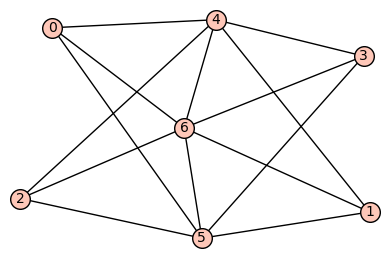

In [6]:
G=Graph('F?~vw')
G.show()

In [18]:
A=All_Forts(G)
len(A)

76

In [19]:
FG=Fort_RGraph(G)

In [21]:
m=FG.clique_number()

In [ ]:
m=FG.clique_number()
for k in range(6,m+1):
    print k
    C=CompCollForts(G,k,data_type='string')
    for c in C:
        M=Matroid(groundset='0123456',circuits=c)
        print c, M.rank()
        #print [list(b) for b in M.bases()]
        #print 

6


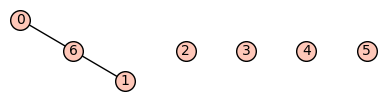

F??E?



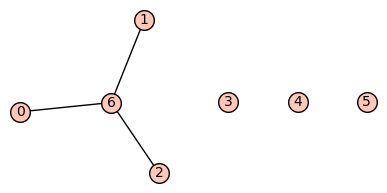

F??F?



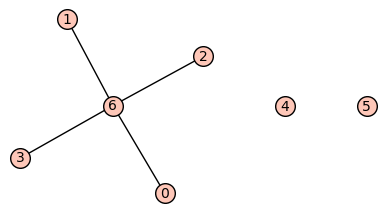

F??F_



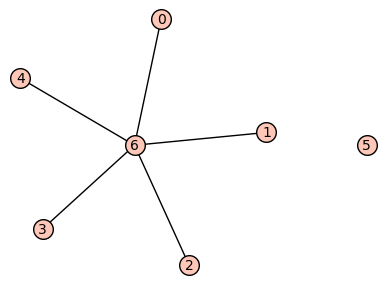

F??Fo



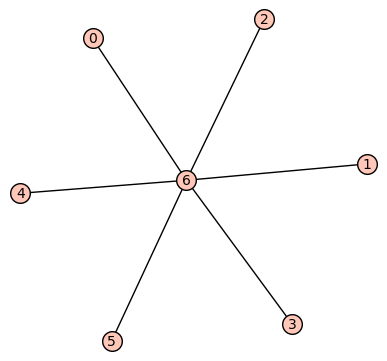

F??Fw



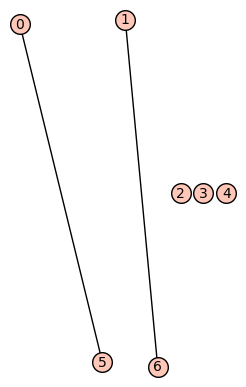

F?AA?



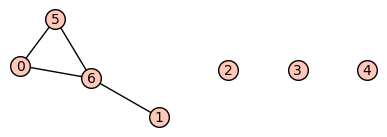

F?AEG



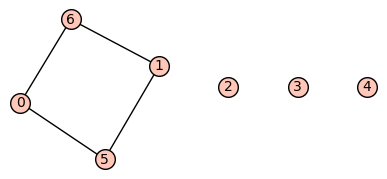

F?BE?



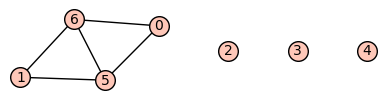

F?BEG



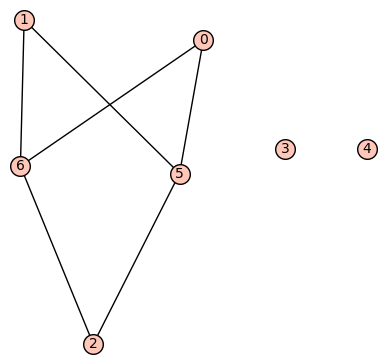

F?Bf?



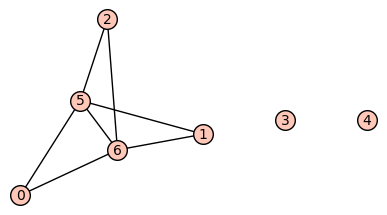

F?BfG



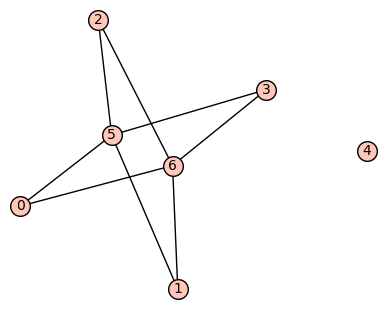

F?Bv_



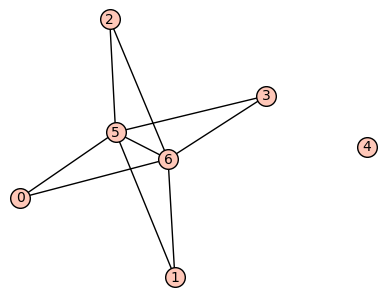

F?Bvg



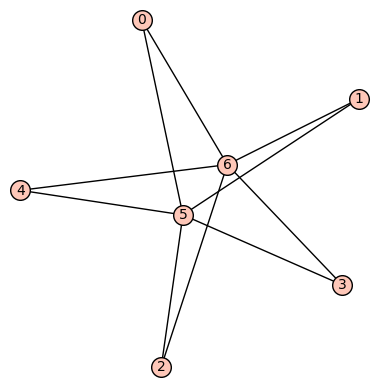

F?B~o



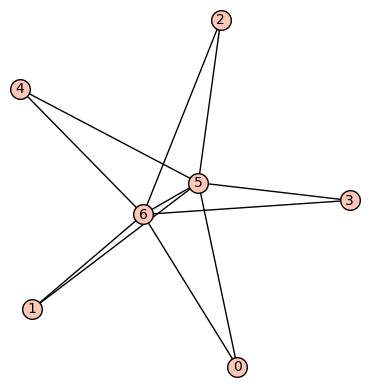

F?B~w



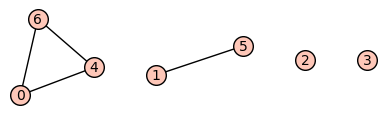

F?`CO



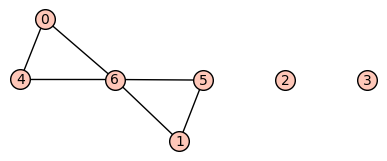

F?`EW



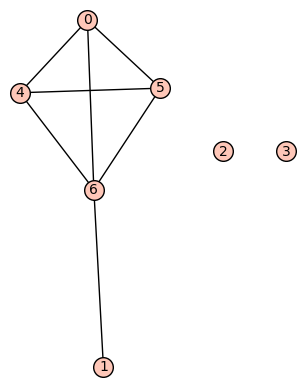

F?aMW



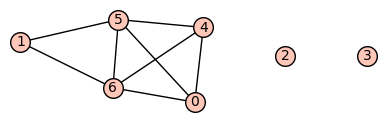

F?bMW



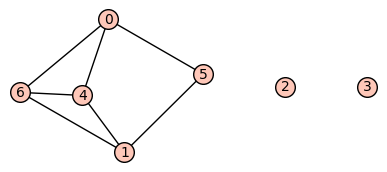

F?rEO



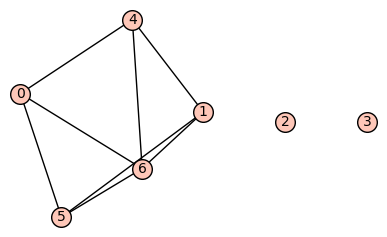

F?rEW



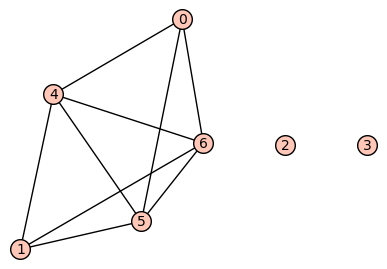

F?rMW



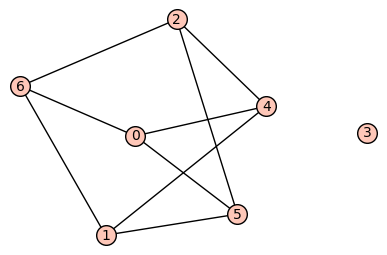

F?zf?



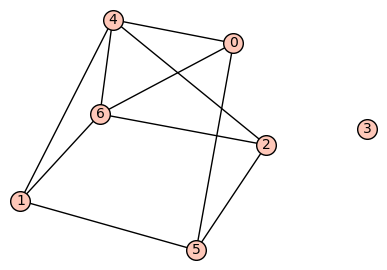

F?zfO



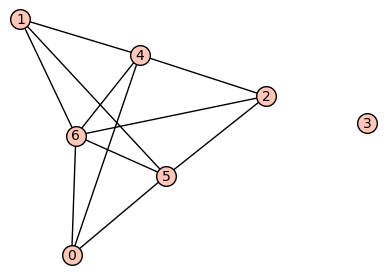

F?zfW



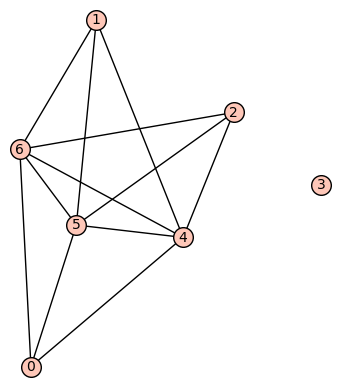

F?znW



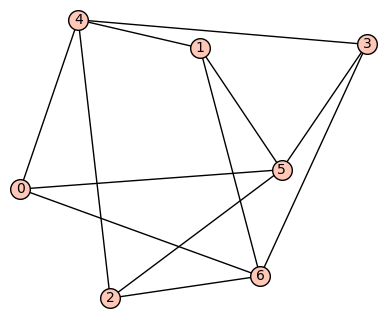

F?~v_



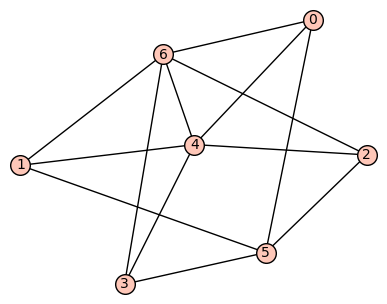

F?~vo



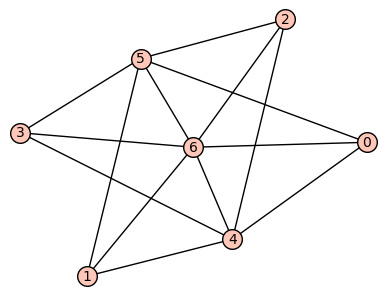

F?~vw



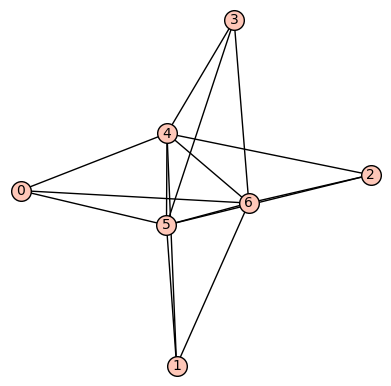

F?~~w



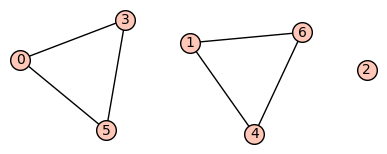

FCQQO



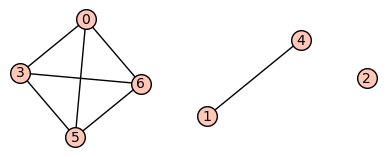

FCQSg



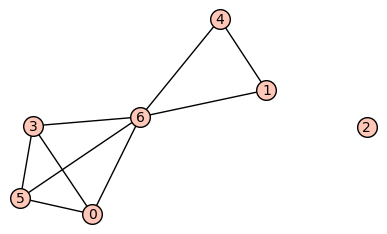

FCQUw



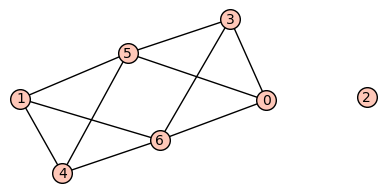

FCR]o



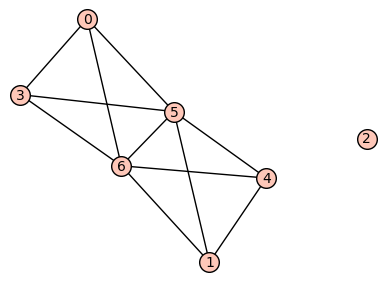

FCR]w



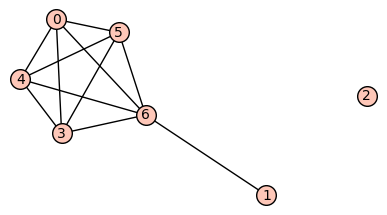

FCe]w



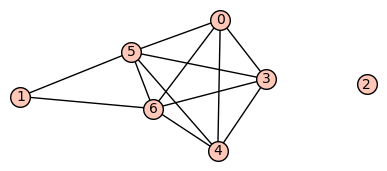

FCf]w



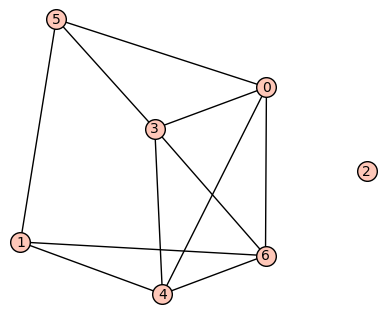

FCvUo



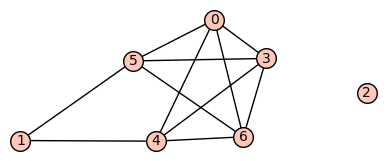

FCvSw



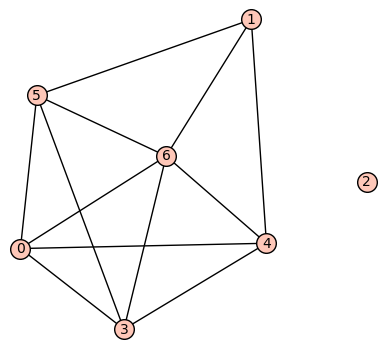

FCvUw



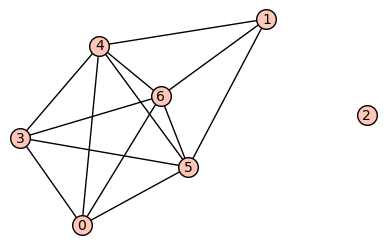

FCv]w



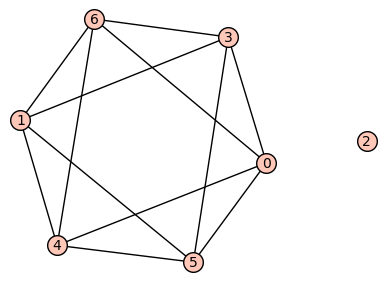

FEr]o



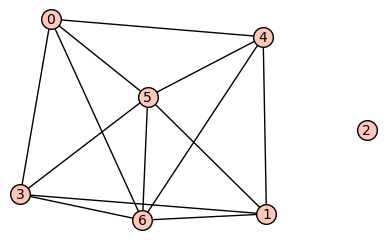

FEr]w



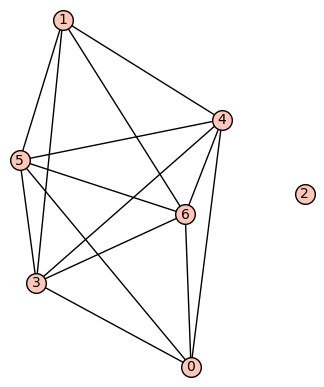

FEv]w



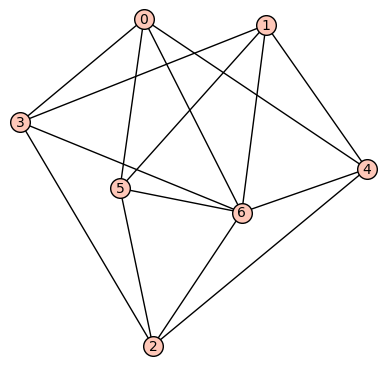

FFzfw



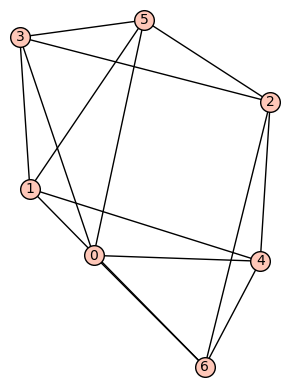

FFzvO



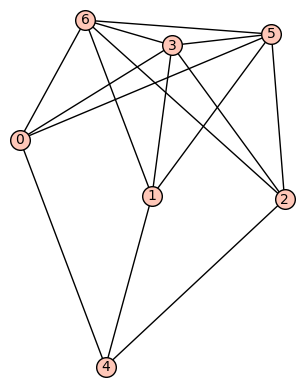

FFzvg



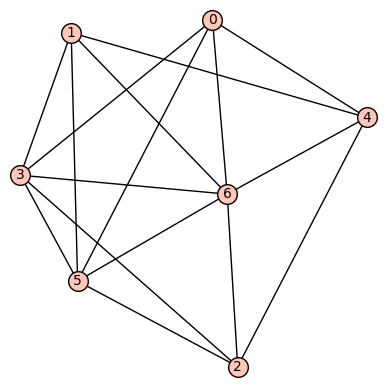

FFzvw



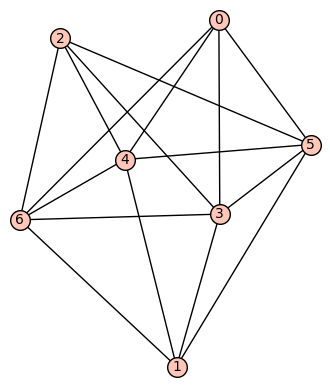

FFz~o



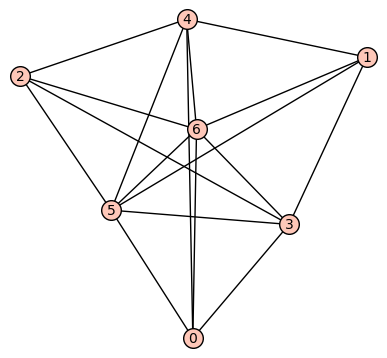

FFz~w



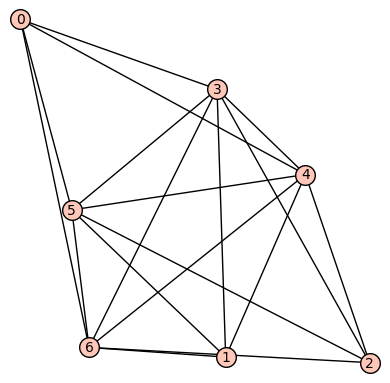

FF~~w



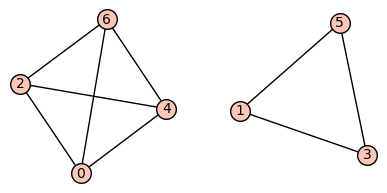

FQhTO



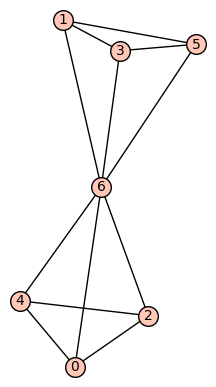

FQhVw



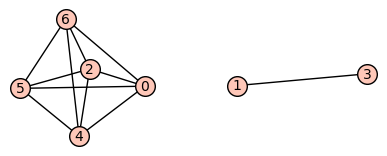

FQilW



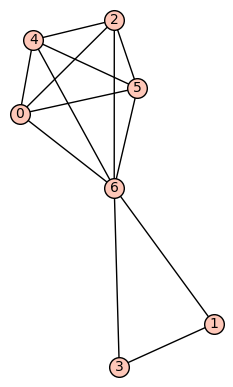

FQinw



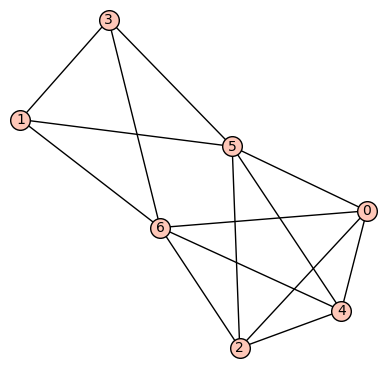

FQj~o



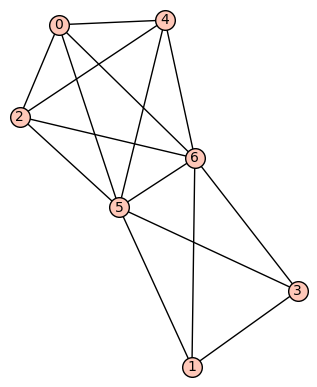

FQj~w



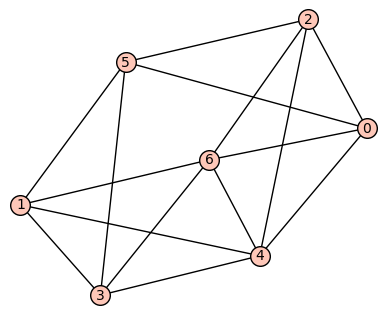

FQ~vo



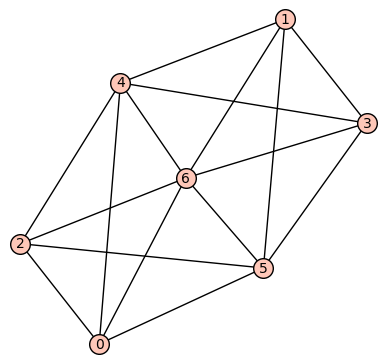

FQ~vw



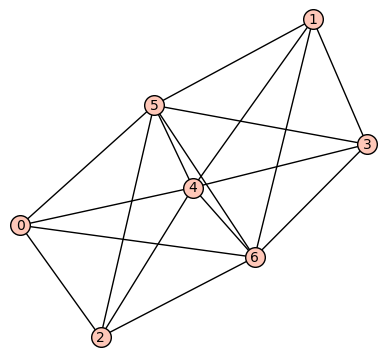

FQ~~w



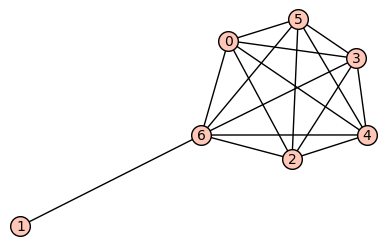

FTm~w



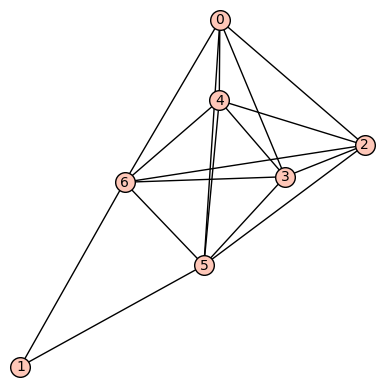

FTn~w



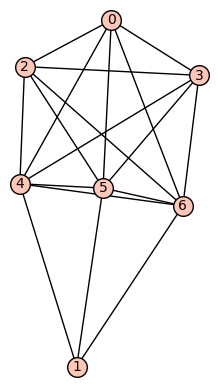

FT~~w



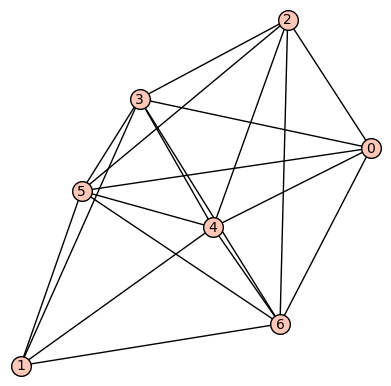

FV~~w



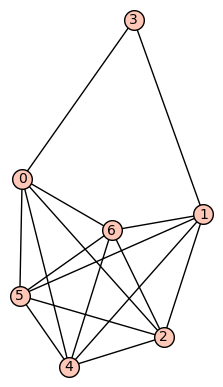

F]znW



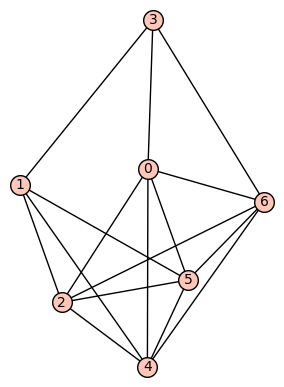

F]zlw



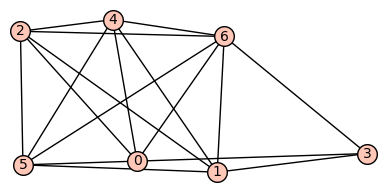

F]znw



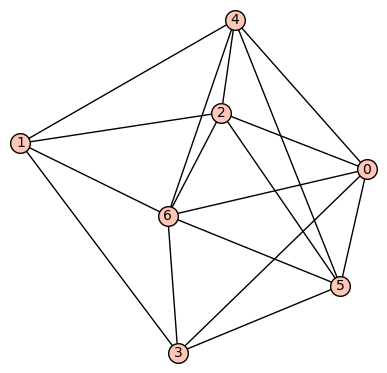

F]y~w



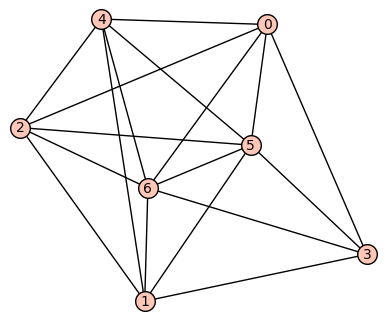

F]z~w



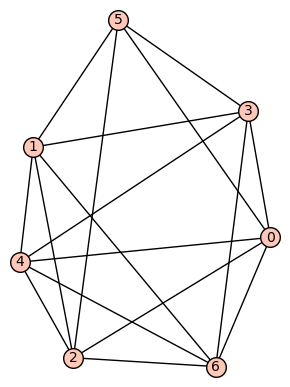

F]~vo



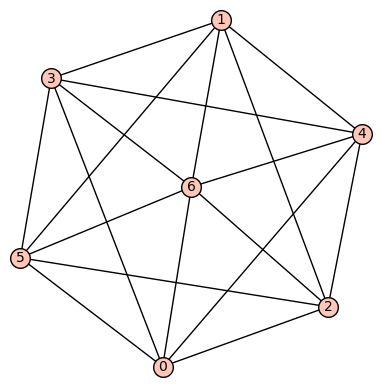

F]~vw



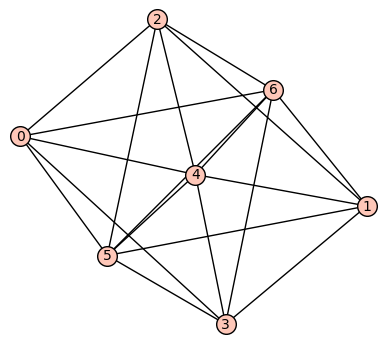

F]~~w



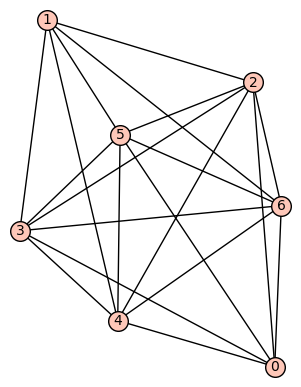

F^~~w



In [14]:
n=7
for g in graphs(n):
    Z=find_Z(g)
    if Z==5:
        g.show()
        print g.graph6_string()
        print

In [7]:
M=Matroid(groundset='12345',circuits=['1345','2345','125','1234'])
M.is_valid()

True

In [8]:
B=Matrix([
    [-1,-2,1,0,0],
    [-1,-2,0,1,0],
    [-1,-3,0,0,1]
])
B

[-1 -2  1  0  0]
[-1 -2  0  1  0]
[-1 -3  0  0  1]

In [6]:
MB=Matroid(B)
sorted([sorted(c) for c in MB.circuits()])

[[0, 1, 2, 3], [0, 1, 4], [0, 2, 3, 4], [1, 2, 3, 4]]

In [9]:
M=Matroid(groundset='01234',circuits=['024','123','0134'])
M.is_valid()

True

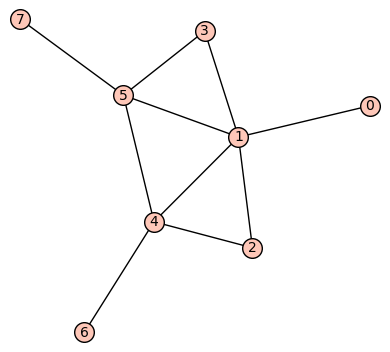

In [8]:
#graph with M<Z compatible collections
G=Graph({0:[1],1:[2,3,4,5],2:[4],3:[5],4:[5,6],5:[7]})
G.show()

In [9]:
FG=Fort_RGraph(G)

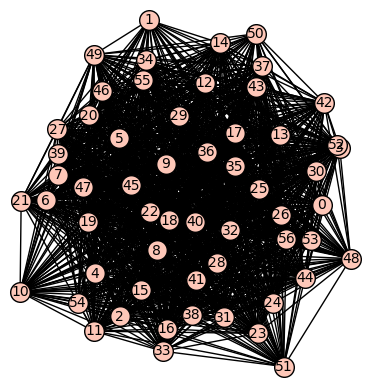

24


In [12]:
FG.show()
print FG.clique_number()

In [ ]:
m=FG.clique_number()
for k in range(9,m+1):
    print k
    C=CompCollForts(G,k,data_type='string')
    for c in C:
        M=Matroid(groundset='01234567',circuits=c)
        print c, M.rank()
        #print [list(b) for b in M.bases()]
        #print 

9


In [10]:
#need to switch some vertices and then construct the dual matroid representation
B=Matrix([
    [1,0,0,0,0,0,0,0],
    [0,1,0,0,0,1,0,0],
    [0,0,1,0,0,0,0,2],
    [0,0,0,1,0,0,0,0],
    [0,0,0,0,1,0,1,3]
])
print B
print

Bstar=Matrix([
    [0,-1,0,0,0,1,0,0],
    [0,0,0,0,-1,0,1,0],
    [0,0,-2,0,-3,0,0,1]
])
print Bstar

[1 0 0 0 0 0 0 0]
[0 1 0 0 0 1 0 0]
[0 0 1 0 0 0 0 2]
[0 0 0 1 0 0 0 0]
[0 0 0 0 1 0 1 3]

[ 0 -1  0  0  0  1  0  0]
[ 0  0  0  0 -1  0  1  0]
[ 0  0 -2  0 -3  0  0  1]


In [16]:
B*Bstar.transpose()

[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]

In [11]:
MB=Matroid(B)

In [12]:
sorted([sorted(c) for c in MB.circuits()])

[[1, 5], [2, 4, 7], [2, 6, 7], [4, 6]]

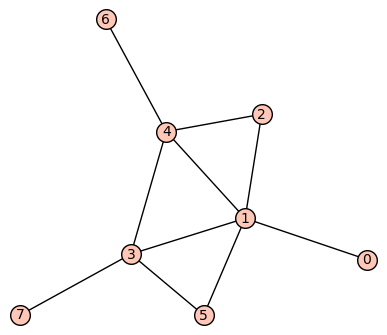

In [13]:
G.show()

In [14]:
var('a00,a01,a02,a03,a04,a05,a06,a07,a10,a11,a12,a13,a14,a15,a16,a17,a20,a21,a22,a23,a24,a25,a26,a27,a30,a31,a32,a33,a34,a35,a36,a37,a40,a41,a42,a43,a44,a45,a46,a47,a50,a51,a52,a53,a54,a55,a56,a57,a60,a61,a62,a63,a64,a65,a66,a67,a70,a71,a72,a73,a74,a75,a76,a77')

A=Matrix([
    [a00,a01,0,0,0,0,0,0],
    [a10,a11,a12,a13,a14,a15,0,0],
    [0,a21,a22,0,a24,0,0,0],
    [0,a31,0,a33,a34,a35,0,a37],
    [0,a41,a42,a43,a44,0,a46,0],
    [0,a51,0,a53,0,a55,0,0],
    [0,0,0,0,a64,0,a66,0],
    [0,0,0,a73,0,0,0,a77]    
])
A

[a00 a01   0   0   0   0   0   0]
[a10 a11 a12 a13 a14 a15   0   0]
[  0 a21 a22   0 a24   0   0   0]
[  0 a31   0 a33 a34 a35   0 a37]
[  0 a41 a42 a43 a44   0 a46   0]
[  0 a51   0 a53   0 a55   0   0]
[  0   0   0   0 a64   0 a66   0]
[  0   0   0 a73   0   0   0 a77]

In [15]:
for i in range(8):
    for j in range(3):
        print i,j,matrix(A[i])*matrix(Bstar[j]).transpose()

0 0 [-a01]
0 1 [0]
0 2 [0]
1 0 [-a11 + a15]
1 1 [-a14]
1 2 [-2*a12 - 3*a14]
2 0 [-a21]
2 1 [-a24]
2 2 [-2*a22 - 3*a24]
3 0 [-a31 + a35]
3 1 [-a34]
3 2 [-3*a34 + a37]
4 0 [-a41]
4 1 [-a44 + a46]
4 2 [-2*a42 - 3*a44]
5 0 [-a51 + a55]
5 1 [0]
5 2 [0]
6 0 [0]
6 1 [-a64 + a66]
6 2 [-3*a64]
7 0 [0]
7 1 [0]
7 2 [a77]


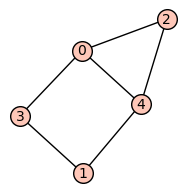

In [62]:
H.show(figsize=(2,2))

In [89]:
var('a00,a01,a02,a03,a04,a10,a11,a12,a13,a14,a20,a21,a22,a23,a24,a30,a31,a32,a33,a34,a40,a41,a42,a43,a44')
var('b00,b01,b02,b03,b04,b10,b11,b12,b13,b14,b20,b21,b22,b23,b24')


A=Matrix([[5,0,1],
         [0,1,0],
         [1,0,0],
         [2,3,0],
         [7,4,-6]])

#F = ['123', '0234', '0124', '0134'], rank = 3

B=Matrix([[1,0,0,0,-6/1],
         [0,1,0,3/1,4/1],
         [0,0,1,2/1,37]])
A=A*B

In [90]:
for i in range(5):
    N=H.neighbors(i)
    for j in range(i+1,5):
        Aij=A[i][j]
        Aji=A[j][i]
        if j in N:
            print '*',i,j,':',expand(Aji),' = ',expand(Aij)
        else:
            print i,j,':','0 = ', expand(Aij)

0 1 : 0 =  0
* 0 2 : 1  =  1
* 0 3 : 2  =  2
* 0 4 : 7  =  7
1 2 : 0 =  0
* 1 3 : 3  =  3
* 1 4 : 4  =  4
2 3 : 0 =  0
* 2 4 : -6  =  -6
3 4 : 0 =  0


In [91]:
M=Matroid(B)
print [list(c) for c in M.circuits()]

[[1, 2, 3], [0, 1, 3, 4], [0, 2, 3, 4], [0, 1, 2, 4]]


In [92]:
print A
A.is_symmetric()

[   5    0    1    2    7]
[   0    1    0    3    4]
[   1    0    0    0   -6]
[   2    3    0    9    0]
[   7    4   -6    0 -248]


True

In [119]:
# C5
var('a00,a01,a02,a03,a04,a10,a11,a12,a13,a14,a20,a21,a22,a23,a24,a30,a31,a32,a33,a34,a40,a41,a42,a43,a44')
var('b00,b01,b02,b03,b04,b10,b11,b12,b13,b14,b20,b21,b22,b23,b24')


A=Matrix([[0,0,1],
         [0,1,0],
         [1,0,3],
         [2,5,0],
         [0,7,-35/2]])

#F = ['014', '1234', '0234', '0123'], rank = 3

B=Matrix([[1,0,0,-2*3/1^2,-35/2],
         [0,1,0,5,7],
         [0,0,1,2/1,0]])
A=A*B

In [120]:
for i in range(5):
    N=G.neighbors(i)
    for j in range(i+1,5):
        Aij=A[i][j]
        Aji=A[j][i]
        if j in N:
            print '*',i,j,':',expand(Aji),' = ',expand(Aij)
        else:
            print i,j,':','0 = ', expand(Aij)

0 1 : 0 =  0
* 0 2 : 1  =  1
* 0 3 : 2  =  2
0 4 : 0 =  0
1 2 : 0 =  0
* 1 3 : 5  =  5
* 1 4 : 7  =  7
2 3 : 0 =  0
* 2 4 : -35/2  =  -35/2
3 4 : 0 =  0


In [121]:
A.is_symmetric()

True

In [122]:
M=Matroid(A)
print [list(c) for c in M.circuits()]

[[0, 1, 2, 3], [0, 2, 3, 4], [1, 2, 3, 4], [0, 1, 4]]


In [ ]:
# diamond house
################
################

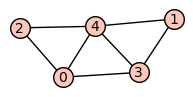

Z(G) =  2
Z+(G) =  2
mr(G) =  (3, 3)


In [43]:
G=Graph('DU{')
G.show(figsize=(2,2))
print 'Z(G) = ', find_Z(G)
print 'Z+(G) = ', Zplus(G)
print 'mr(G) = ', minrank_bounds(G)

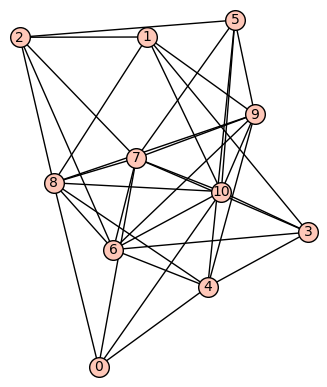

In [44]:
FG=Fort_RGraph(G)
FG.show()

In [45]:
m=FG.clique_number()

In [46]:
for k in range(1,m+1):
    C=CompCollForts(G,k,data_type='string')
    for c in C:
        M=Matroid(groundset='01234',circuits=c)
        print c, M.rank()
        #print [list(b) for b in M.bases()]
        #print 

['124'] 4
['234'] 4
['014'] 4
['012'] 4
['034'] 4
['123'] 4
['1234'] 4
['0234'] 4
['0123'] 4
['0124'] 4
['0134'] 4
['01234'] 4
['034', '123', '0124'] 3
['012', '034', '1234'] 3
['014', '123', '0234'] 3
['234', '012', '0134'] 3
['234', '014', '0123'] 3
['124', '034', '0123'] 3
['123', '0234', '0124', '0134'] 3
['034', '1234', '0123', '0124'] 3
['012', '1234', '0234', '0134'] 3
['014', '1234', '0234', '0123'] 3
['234', '0123', '0124', '0134'] 3
['124', '0234', '0123', '0134'] 3
['1234', '0234', '0123', '0124', '0134'] 3


In [ ]:
# K_2,3
################
################

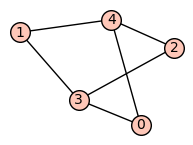

Z(G) =  3
Z+(G) =  2
mr(G) =  (2, 2)


In [39]:
G=Graph('DFw')
G.show(figsize=(2,2))
print 'Z(G) = ', find_Z(G)
print 'Z+(G) = ', Zplus(G)
print 'mr(G) = ', minrank_bounds(G)

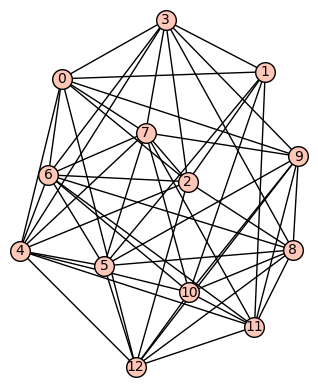

In [40]:
FG=Fort_RGraph(G)
FG.show()

In [41]:
m=FG.clique_number()

In [42]:
for k in range(1,m+1):
    C=CompCollForts(G,k,data_type='string')
    for c in C:
        M=Matroid(groundset='01234',circuits=c)
        print c, M.rank()
        #print [list(b) for b in M.bases()]
        #print 

['12'] 4
['34'] 4
['02'] 4
['01'] 4
['234'] 4
['012'] 4
['034'] 4
['134'] 4
['1234'] 4
['0234'] 4
['0123'] 4
['0124'] 4
['0134'] 4
['01234'] 4
['01', '234'] 3
['02', '134'] 3
['34', '012'] 3
['34', '01'] 3
['34', '02'] 3
['12', '034'] 3
['12', '34'] 3
['012', '134', '0234'] 3
['012', '034', '1234'] 3
['234', '012', '0134'] 3
['01', '1234', '0234'] 3
['01', '034', '134'] 3
['02', '1234', '0134'] 3
['02', '234', '034'] 3
['34', '0123', '0124'] 3
['12', '0234', '0134'] 3
['12', '234', '134'] 3
['12', '02', '01'] 3
['134', '0234', '0123', '0124'] 3
['034', '1234', '0123', '0124'] 3
['012', '1234', '0234', '0134'] 3
['234', '0123', '0124', '0134'] 3
['12', '34', '02', '01'] 2
['1234', '0234', '0123', '0124', '0134'] 3
['12', '02', '01', '234', '034', '134'] 2


In [ ]:
# bull example
################
################

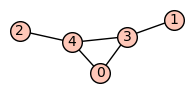

Z(G) =  2
Z+(G) =  2
mr(G) =  (3, 3)


In [35]:
G=Graph('DEk')
G.show(figsize=(2,2))
print 'Z(G) = ', find_Z(G)
print 'Z+(G) = ', Zplus(G)
print 'mr(G) = ', minrank_bounds(G)

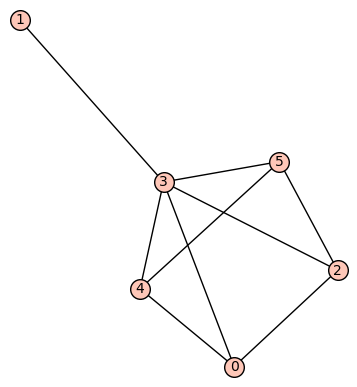

In [36]:
FG=Fort_RGraph(G)
FG.show()

In [37]:
m=FG.clique_number()

In [38]:
for k in range(1,m+1):
    C=CompCollForts(G,k,data_type='string')
    for c in C:
        M=Matroid(groundset='01234',circuits=c)
        print c, M.rank()
        #print [list(b) for b in M.bases()]
        #print 

['024'] 4
['012'] 4
['013'] 4
['1234'] 4
['0123'] 4
['0124'] 4
['01234'] 4
['024', '013', '1234'] 3


In [ ]:
# 4-star example
################
################

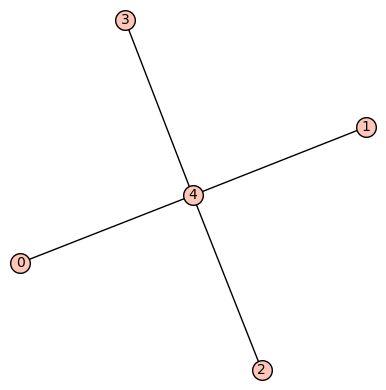

In [6]:
G=Graph('D?{')
G.show()
# print 'Z(G) = ', find_Z(G)
# print 'Z+(G) = ', Zplus(G)
# print 'mr(G) = ', minrank_bounds(G)

In [7]:
All_Forts(G)

[[1, 2],
 [2, 3],
 [0, 2],
 [0, 1],
 [1, 3],
 [0, 3],
 [0, 2, 3],
 [0, 1, 2],
 [0, 1, 3],
 [1, 2, 3],
 [0, 1, 2, 3],
 [0, 1, 2, 3, 4]]

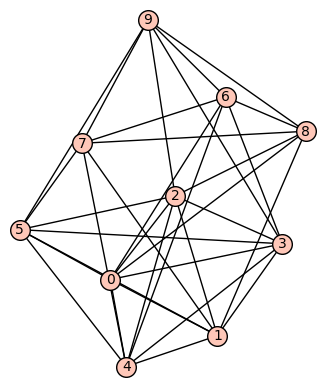

In [10]:
FG=Fort_RGraph(G)
FG.show()

In [11]:
m=FG.clique_number()

In [12]:
for k in range(1,m+1):
    C=CompCollForts(G,k,data_type='string')
    for c in C:
        M=Matroid(groundset='01234',circuits=c)
        print c, M.rank()
        #print [list(b) for b in M.bases()]
        #print 

['12'] 4
['23'] 4
['02'] 4
['01'] 4
['13'] 4
['03'] 4
['023'] 4
['012'] 4
['013'] 4
['123'] 4
['0123'] 4
['01234'] 4
['02', '13'] 3
['23', '01'] 3
['12', '03'] 3
['03', '012', '123'] 3
['13', '023', '012'] 3
['01', '023', '123'] 3
['01', '13', '03'] 3
['02', '013', '123'] 3
['23', '012', '013'] 3
['23', '02', '03'] 3
['12', '023', '013'] 3
['12', '02', '01'] 3
['12', '23', '13'] 3
['023', '012', '013', '123'] 3
['12', '23', '02', '01', '13', '03'] 2


In [ ]:
# bowtie example
################
################


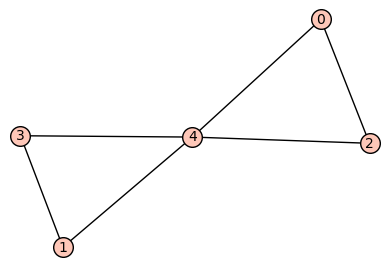

In [2]:
G=Graph('DQ{')
G.show()
# print 'Z(G) = ', find_Z(G)
# print 'Z+(G) = ', Zplus(G)


In [4]:
All_Forts(G)

[[0, 2],
 [1, 3],
 [1, 2, 4],
 [2, 3, 4],
 [0, 1, 4],
 [0, 3, 4],
 [1, 2, 3, 4],
 [0, 2, 3, 4],
 [0, 1, 2, 3],
 [0, 1, 2, 4],
 [0, 1, 3, 4],
 [0, 1, 2, 3, 4]]

In [5]:
len(All_Forts(G))

12

In [7]:
minrank_bounds(G)

(2, 2)

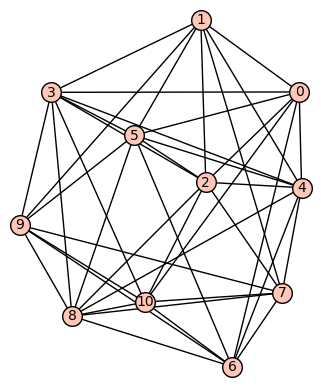

In [24]:
FG=Fort_RGraph(G)
FG.show()

In [25]:
m=FG.clique_number()

In [26]:
for k in range(1,m+1):
    C=CompCollForts(G,k,data_type='string')
    for c in C:
        M=Matroid(groundset='01234',circuits=c)
        print c, M.rank()

['02'] 4
['13'] 4
['124'] 4
['234'] 4
['014'] 4
['034'] 4
['1234'] 4
['0234'] 4
['0123'] 4
['0124'] 4
['0134'] 4
['01234'] 4
['02', '13'] 3
['234', '014', '0123'] 3
['124', '034', '0123'] 3
['13', '0234', '0124'] 3
['13', '014', '034'] 3
['13', '124', '234'] 3
['02', '1234', '0134'] 3
['02', '234', '034'] 3
['02', '124', '014'] 3
['034', '1234', '0123', '0124'] 3
['014', '1234', '0234', '0123'] 3
['234', '0123', '0124', '0134'] 3
['124', '0234', '0123', '0134'] 3
['1234', '0234', '0123', '0124', '0134'] 3
['02', '13', '124', '234', '014', '034'] 2


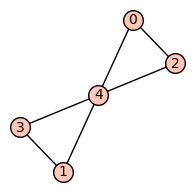

In [5]:
G.show(figsize=(2,2))

In [6]:
var('a00,a01,a02,a03,a04,a10,a11,a12,a13,a14,a20,a21,a22,a23,a24,a30,a31,a32,a33,a34,a40,a41,a42,a43,a44')
var('b00,b01,b02,b03,b04,b10,b11,b12,b13,b14,b20,b21,b22,b23,b24')


A=Matrix([[a00,0,a02],
         [0,a11,0],
         [a02,0,a22],
         [0,a13,0],
         [a04,a14,a24]])


B=Matrix([[1,0,0,b03,b04],
         [0,1,0,b13,b14],
         [0,0,1,b23,b24]])
A=A*B

In [7]:
for i in range(5):
    N=G.neighbors(i)
    for j in range(i+1,5):
        Aij=A[i][j]
        if j in N:
            print i,j,':','0 != ',expand(Aij)
        else:
            print i,j,':','0 = ', expand(Aij)

0 1 : 0 =  0
0 2 : 0 !=  a02
0 3 : 0 =  a00*b03 + a02*b23
0 4 : 0 !=  a00*b04 + a02*b24
1 2 : 0 =  0
1 3 : 0 !=  a11*b13
1 4 : 0 !=  a11*b14
2 3 : 0 =  a02*b03 + a22*b23
2 4 : 0 !=  a02*b04 + a22*b24
3 4 : 0 !=  a13*b14


In [41]:
#a02^2=a00*a22


In [10]:
var('a00,a01,a02,a03,a04,a10,a11,a12,a13,a14,a20,a21,a22,a23,a24,a30,a31,a32,a33,a34,a40,a41,a42,a43,a44')
var('b00,b01,b02,b03,b04,b10,b11,b12,b13,b14,b20,b21,b22,b23,b24')


A=Matrix([[2,0,1],
         [0,13,0],
         [1,0,1/2],
         [0,5,0],
         [2*7,11,7]])


B=Matrix([[1,0,0,17,(2*7-1)/2],
         [0,1,0,5/13,11/13],
         [0,0,1,-2*17,1]])
A=A*B

In [85]:
for i in range(5):
    N=G.neighbors(i)
    for j in range(i+1,5):
        Aij=A[i][j]
        Aji=A[j][i]
        if j in N:
            print '*',i,j,':',expand(Aji),' = ',expand(Aij)
        else:
            print i,j,':','0 = ', expand(Aij)

0 1 : 0 =  0
* 0 2 : 1  =  1
0 3 : 0 =  0
* 0 4 : 14  =  14
1 2 : 0 =  0
* 1 3 : 5  =  5
* 1 4 : 11  =  11
2 3 : 0 =  0
* 2 4 : 7  =  7
* 3 4 : 55/13  =  55/13


In [11]:
#rank 2 PSD
print A
print A.rank()
A.is_symmetric()

[      2       0       1       0      14]
[      0      13       0       5      11]
[      1       0     1/2       0       7]
[      0       5       0   25/13   55/13]
[     14      11       7   55/13 1395/13]
2


True

In [87]:
MB=Matroid(B)
print [list(c) for c in MB.circuits()]

[[0, 1, 2, 3], [0, 1, 3, 4], [0, 2, 3, 4], [1, 2, 3, 4], [0, 1, 2, 4]]


In [12]:
MA=Matroid(A)
print [list(c) for c in MA.circuits()]

[[0, 2], [1, 3], [0, 3, 4], [2, 3, 4], [1, 2, 4], [0, 1, 4]]


In [90]:
A.eigenvalues()

[0, 0, 0, 13.71969892090200?, 111.01107030986723?]

In [16]:
#rank 2 not PSD
var('c00,c01,c02,c03,c04,c10,c11,c12,c13,c14,c20,c21,c22,c23,c24,c30,c31,c32,c33,c34,c40,c41,c42,c43,c44')
var('b00,b01,b02,b03,b04,b10,b11,b12,b13,b14,b20,b21,b22,b23,b24')



# C=Matrix([[c00,c01,c02,c03,c04],
#          [c10,c11,c12,c13,c14]])

C=Matrix([[2,1/2,2,1/2,3],
         [1,1,1,1,1]])


CT=C.transpose()

D=Matrix([[1,0],[0,-1]])

A=CT*D*C
A

[   3    0    3    0    5]
[   0 -3/4    0 -3/4  1/2]
[   3    0    3    0    5]
[   0 -3/4    0 -3/4  1/2]
[   5  1/2    5  1/2    8]

In [17]:
for i in range(5):
    N=G.neighbors(i)
    for j in range(i+1,5):
        Aij=A[i][j]
        Aji=A[j][i]
        if j in N:
            print i,j,':','0!=',expand(Aij)
        else:
            print i,j,':','0 = ', expand(Aij)

0 1 : 0 =  0
0 2 : 0!= 3
0 3 : 0 =  0
0 4 : 0!= 5
1 2 : 0 =  0
1 3 : 0!= -3/4
1 4 : 0!= 1/2
2 3 : 0 =  0
2 4 : 0!= 5
3 4 : 0!= 1/2


In [18]:
A.eigenvalues()

[0, 0, 0, -1.659646009778188?, 14.15964600977819?]

In [20]:
MA=Matroid(A)
print [list(c) for c in MA.circuits()]

[[0, 2], [1, 3], [0, 3, 4], [2, 3, 4], [1, 2, 4], [0, 1, 4]]


In [42]:
#A not symmetric CSym(G)
var('a00,a01,a02,a03,a04,a10,a11,a12,a13,a14,a20,a21,a22,a23,a24,a30,a31,a32,a33,a34,a40,a41,a42,a43,a44')
var('b00,b01,b02,b03,b04,b10,b11,b12,b13,b14,b20,b21,b22,b23,b24')

a02=1
a00=1
a22=1
a11=1
a13=1

A=Matrix([[2,0,2],
         [0,2,0],
         [1,0,1],
         [0,1,0],
         [1,2,3]])

#b03=-b23


B=Matrix([[1,0,0,1,1],
         [0,1,0,2,1],
         [0,0,1,-1,1]])
A=A*B

print A
print A.rank()

[2 0 2 0 4]
[0 2 0 4 2]
[1 0 1 0 2]
[0 1 0 2 1]
[1 2 3 2 6]
3


In [38]:
MB=Matroid(B)
print [list(c) for c in MB.circuits()]

[[0, 1, 2, 3], [0, 1, 3, 4], [0, 2, 3, 4], [1, 2, 3, 4], [0, 1, 2, 4]]


In [39]:
MA=Matroid(A)
print [list(c) for c in MA.circuits()]

[[0, 1, 2, 3], [0, 1, 3, 4], [0, 2, 3, 4], [1, 2, 3, 4], [0, 1, 2, 4]]


In [40]:
for i in range(5):
    N=G.neighbors(i)
    for j in range(i+1,5):
        Aij=A[i][j]
        if j in N:
            print i,j,':','0 != ',expand(Aij)
        else:
            print i,j,':','0 = ', expand(Aij)

0 1 : 0 =  0
0 2 : 0 !=  2
0 3 : 0 =  0
0 4 : 0 !=  4
1 2 : 0 =  0
1 3 : 0 !=  4
1 4 : 0 !=  2
2 3 : 0 =  0
2 4 : 0 !=  2
3 4 : 0 !=  1


In [41]:
A.eigenvalues()

[0, 0, 0.4294227115800162?, 3.657943077605828?, 8.91263421081416?]

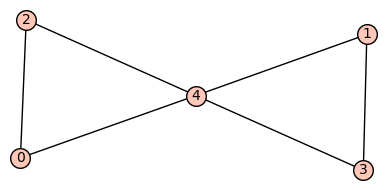

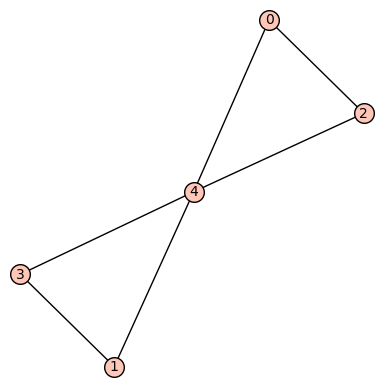

True

In [43]:
#graph of matrix A
n=5
H=Graph([])
H.add_vertices(range(n))
for i in range(0,n):
    for j in range(i+1,n):
        if A[i][j] != 0:
            H.add_edge((i,j))

H.show()
G.show()
H.is_isomorphic(G)

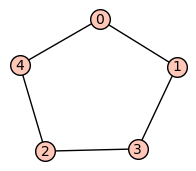

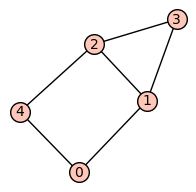

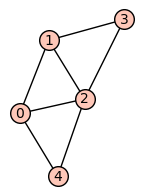

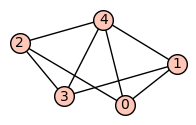

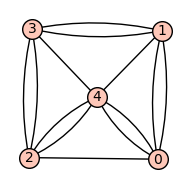

[[0, 2, 3], [1, 2, 4], [0, 1, 2], [0, 3, 4], [1, 3, 4], [1, 2, 3, 4], [0, 2, 3, 4], [0, 1, 2, 3], [0, 1, 2, 4], [0, 1, 3, 4], [0, 1, 2, 3, 4]]
[[0, 2, 3], [1, 2, 4], [0, 1, 2], [0, 3, 4], [1, 3, 4], [1, 2, 3, 4], [0, 2, 3, 4], [0, 1, 2, 3], [0, 1, 2, 4], [0, 1, 3, 4], [0, 1, 2, 3, 4]]
[[0, 2, 3], [1, 2, 4], [2, 3, 4], [0, 1, 2], [0, 3, 4], [1, 3, 4], [1, 2, 3, 4], [0, 2, 3, 4], [0, 1, 2, 3], [0, 1, 2, 4], [0, 1, 3, 4], [0, 1, 2, 3, 4]]
True
False


In [9]:
G=Graph({0:[1,4],1:[3],3:[2],2:[4]})
G1=copy(G)
G1.add_edge(1,2)
G2=copy(G1)
G2.add_edge(2,0)
A=All_Forts(G)
A1=All_Forts(G1)
A2=All_Forts(G2)

G.show(figsize=(2,2))
G1.show(figsize=(2,2))
G2.show(figsize=(2,2))

H=Graph({0:[1,2,4],1:[3,4],2:[3,4],3:[4]})
H.show(figsize=(2,2))

K=Graph(multiedges=True)
K.add_vertices([0,1,2,3,4])
K.add_edges([(0,1),(0,2),(0,4),(1,3),(1,4),(2,3),(2,4),(3,4),(0,1),(0,4),(1,3),(2,3),(2,4)])
K.show(figsize=(2,2))

print A
print A1
print A2

print A==A1
print A==A2

[[0, 2, 3], [1, 2, 4], [0, 1, 2], [0, 3, 4], [1, 3, 4], [1, 2, 3, 4], [0, 2, 3, 4], [0, 1, 2, 3], [0, 1, 2, 4], [0, 1, 3, 4], [0, 1, 2, 3, 4]]

(1, 2, None)
[[0, 2, 3], [1, 2, 4], [0, 1, 2], [0, 3, 4], [1, 3, 4], [1, 2, 3, 4], [0, 2, 3, 4], [0, 1, 2, 3], [0, 1, 2, 4], [0, 1, 3, 4], [0, 1, 2, 3, 4]]


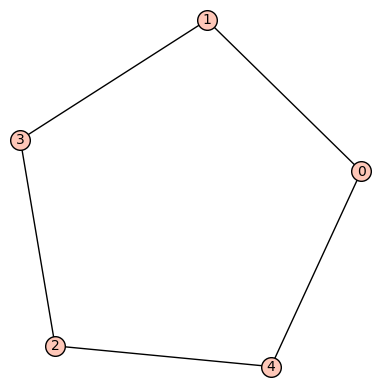

In [46]:
A=All_Forts(G)
print A
print

E=G1.edges()


for edge in E:
    Edge=[edge]
    G1copy=copy(G1)
    G1copy.delete_edges(Edge)
    Ac=All_Forts(G1copy)

    if A==Ac:
        print edge
        print Ac
        G1copy.show()
    

In [14]:
FG=Fort_RGraph(G)
FG1=Fort_RGraph(G1)
FG2=Fort_RGraph(G2)

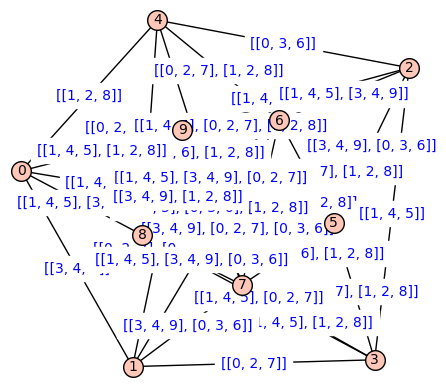

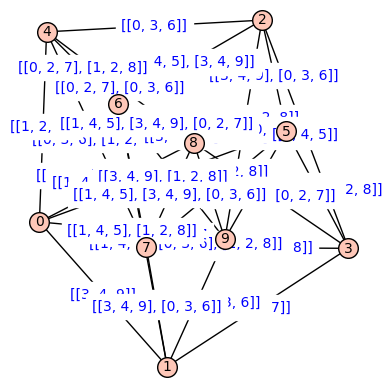

In [20]:
FG.plot(edge_labels=True).show()
FG1.plot(edge_labels=True).show()

In [21]:
FG.is_isomorphic(FG1)

True

In [22]:
FG.is_isomorphic(FG2)

False

In [23]:
for k in range(1,6):
    C=CompCollForts(G,k,data_type='string')
    for c in C:
        M=Matroid(groundset='01234',circuits=c)
        print c, M.rank()

['023'] 4
['124'] 4
['012'] 4
['034'] 4
['134'] 4
['1234'] 4
['0234'] 4
['0123'] 4
['0124'] 4
['0134'] 4
['01234'] 4
['012', '134', '0234'] 3
['012', '034', '1234'] 3
['124', '034', '0123'] 3
['023', '134', '0124'] 3
['023', '124', '0134'] 3
['134', '0234', '0123', '0124'] 3
['034', '1234', '0123', '0124'] 3
['012', '1234', '0234', '0134'] 3
['124', '0234', '0123', '0134'] 3
['023', '1234', '0124', '0134'] 3
['1234', '0234', '0123', '0124', '0134'] 3


In [32]:
for k in range(1,6):
    C=CompCollForts(G2,k,data_type='string')
    for c in C:
        M=Matroid(groundset='01234',circuits=c)
        print c, M.rank()

['023'] 4
['124'] 4
['234'] 4
['012'] 4
['034'] 4
['134'] 4
['1234'] 4
['0234'] 4
['0123'] 4
['0124'] 4
['0134'] 4
['01234'] 4
['012', '134', '0234'] 3
['012', '034', '1234'] 3
['234', '012', '0134'] 3
['124', '034', '0123'] 3
['023', '134', '0124'] 3
['023', '124', '0134'] 3
['134', '0234', '0123', '0124'] 3
['034', '1234', '0123', '0124'] 3
['012', '1234', '0234', '0134'] 3
['234', '0123', '0124', '0134'] 3
['124', '0234', '0123', '0134'] 3
['023', '1234', '0124', '0134'] 3
['1234', '0234', '0123', '0124', '0134'] 3


In [24]:
for k in range(1,6):
    C=CompCollForts(G1,k,data_type='string')
    for c in C:
        M=Matroid(groundset='01234',circuits=c)
        print c, M.rank()

['023'] 4
['124'] 4
['012'] 4
['034'] 4
['134'] 4
['1234'] 4
['0234'] 4
['0123'] 4
['0124'] 4
['0134'] 4
['01234'] 4
['012', '134', '0234'] 3
['012', '034', '1234'] 3
['124', '034', '0123'] 3
['023', '134', '0124'] 3
['023', '124', '0134'] 3
['134', '0234', '0123', '0124'] 3
['034', '1234', '0123', '0124'] 3
['012', '1234', '0234', '0134'] 3
['124', '0234', '0123', '0134'] 3
['023', '1234', '0124', '0134'] 3
['1234', '0234', '0123', '0124', '0134'] 3


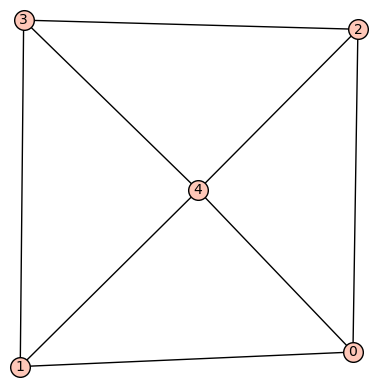

In [27]:
W=Graph({0:[1,2,4],1:[3,4],2:[3,4],3:[4]})
W.show()

[[1, 2], [0, 3], [0, 2, 3], [1, 2, 4], [2, 3, 4], [0, 2, 4], [0, 1, 4], [0, 1, 2], [0, 3, 4], [0, 1, 3], [1, 2, 3], [1, 3, 4], [1, 2, 3, 4], [0, 2, 3, 4], [0, 1, 2, 3], [0, 1, 2, 4], [0, 1, 3, 4], [0, 1, 2, 3, 4]]

(0, 1, None)
[[1, 2, 4], [2, 3, 4], [0, 1, 4], [0, 1, 2], [0, 3, 4], [0, 1, 3], [1, 2, 3, 4], [0, 2, 3, 4], [0, 1, 2, 3], [0, 1, 2, 4], [0, 1, 3, 4], [0, 1, 2, 3, 4]]


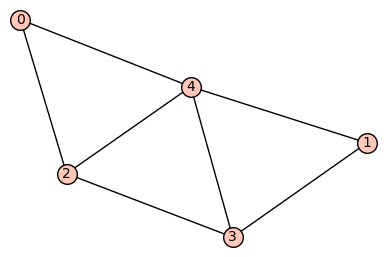

(0, 2, None)
[[0, 2, 3], [1, 2, 4], [0, 2, 4], [0, 1, 2], [0, 3, 4], [1, 3, 4], [1, 2, 3, 4], [0, 2, 3, 4], [0, 1, 2, 3], [0, 1, 2, 4], [0, 1, 3, 4], [0, 1, 2, 3, 4]]


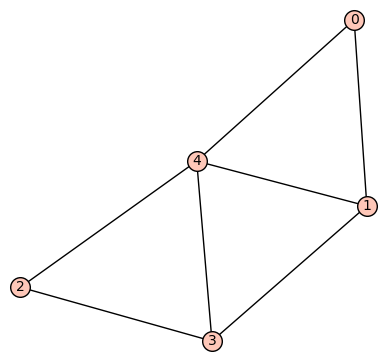

(0, 4, None)
[[1, 2], [3, 4], [0, 2, 3], [1, 2, 4], [0, 2, 4], [0, 1, 4], [0, 1, 2], [0, 3, 4], [0, 1, 3], [1, 2, 3], [1, 2, 3, 4], [0, 2, 3, 4], [0, 1, 2, 3], [0, 1, 2, 4], [0, 1, 3, 4], [0, 1, 2, 3, 4]]


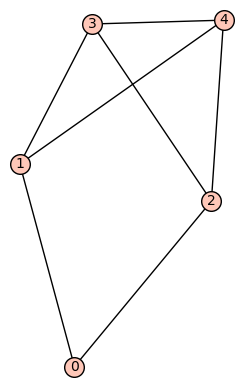

(1, 3, None)
[[1, 2, 4], [0, 2, 4], [0, 3, 4], [0, 1, 3], [1, 2, 3], [1, 3, 4], [1, 2, 3, 4], [0, 2, 3, 4], [0, 1, 2, 3], [0, 1, 2, 4], [0, 1, 3, 4], [0, 1, 2, 3, 4]]


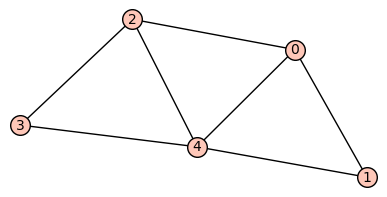

(1, 4, None)
[[0, 3], [2, 4], [0, 2, 3], [1, 2, 4], [0, 1, 4], [0, 1, 2], [0, 3, 4], [0, 1, 3], [1, 2, 3], [1, 3, 4], [1, 2, 3, 4], [0, 2, 3, 4], [0, 1, 2, 3], [0, 1, 2, 4], [0, 1, 3, 4], [0, 1, 2, 3, 4]]


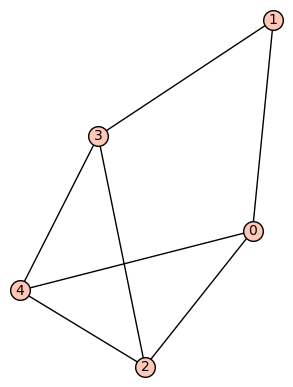

(2, 3, None)
[[0, 2, 3], [1, 2, 4], [2, 3, 4], [0, 1, 4], [0, 3, 4], [1, 2, 3], [1, 2, 3, 4], [0, 2, 3, 4], [0, 1, 2, 3], [0, 1, 2, 4], [0, 1, 3, 4], [0, 1, 2, 3, 4]]


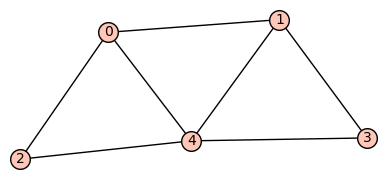

(2, 4, None)
[[0, 3], [1, 4], [0, 2, 3], [1, 2, 4], [2, 3, 4], [0, 2, 4], [0, 1, 2], [0, 3, 4], [0, 1, 3], [1, 2, 3], [1, 2, 3, 4], [0, 2, 3, 4], [0, 1, 2, 3], [0, 1, 2, 4], [0, 1, 3, 4], [0, 1, 2, 3, 4]]


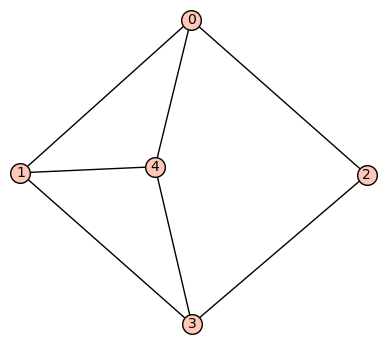

(3, 4, None)
[[1, 2], [0, 4], [0, 2, 3], [1, 2, 4], [2, 3, 4], [0, 1, 2], [0, 3, 4], [0, 1, 3], [1, 2, 3], [1, 3, 4], [1, 2, 3, 4], [0, 2, 3, 4], [0, 1, 2, 3], [0, 1, 2, 4], [0, 1, 3, 4], [0, 1, 2, 3, 4]]


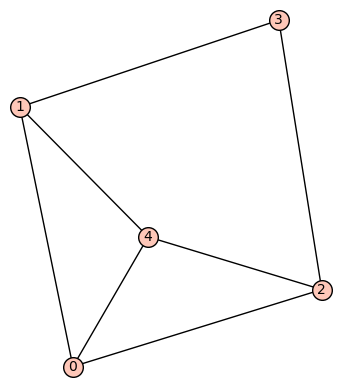

In [38]:
A=All_Forts(W)
print A
print

E=W.edges()
Wcopy=copy(W)

for edge in E:
    Edge=[edge]
    Wcopy=copy(W)
    Wcopy.delete_edges(Edge)
    Ac=All_Forts(Wcopy)

    print edge
    print Ac
    Wcopy.show()
    

[[1, 2], [0, 3], [0, 2, 3], [1, 2, 4], [2, 3, 4], [0, 2, 4], [0, 1, 4], [0, 1, 2], [0, 3, 4], [0, 1, 3], [1, 2, 3], [1, 3, 4], [1, 2, 3, 4], [0, 2, 3, 4], [0, 1, 2, 3], [0, 1, 2, 4], [0, 1, 3, 4], [0, 1, 2, 3, 4]] 18

(0, 3, None)
[[1, 2], [3, 4], [0, 4], [0, 3], [0, 2, 3], [1, 2, 4], [2, 3, 4], [0, 2, 4], [0, 1, 4], [0, 1, 2], [0, 3, 4], [0, 1, 3], [1, 2, 3], [1, 3, 4], [1, 2, 3, 4], [0, 2, 3, 4], [0, 1, 2, 3], [0, 1, 2, 4], [0, 1, 3, 4], [0, 1, 2, 3, 4]] 20


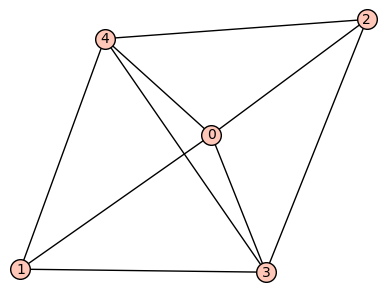

(1, 2, None)
[[1, 2], [0, 3], [2, 4], [1, 4], [0, 2, 3], [1, 2, 4], [2, 3, 4], [0, 2, 4], [0, 1, 4], [0, 1, 2], [0, 3, 4], [0, 1, 3], [1, 2, 3], [1, 3, 4], [1, 2, 3, 4], [0, 2, 3, 4], [0, 1, 2, 3], [0, 1, 2, 4], [0, 1, 3, 4], [0, 1, 2, 3, 4]] 20


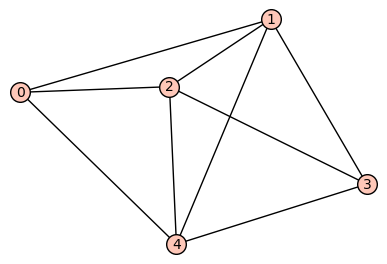

In [43]:
A=All_Forts(W)
print A, len(A)
print

compW=W.complement()
E=compW.edges()
Wcopy=copy(W)

for edge in E:
    Edge=[edge]
    Wcopy=copy(W)
    Wcopy.add_edges(Edge)
    Ac=All_Forts(Wcopy)
    
    print edge
    print Ac, len(Ac)
    Wcopy.show()

In [28]:
FW=Fort_RGraph(W)

In [29]:
FW.clique_number()

10

In [31]:
for k in range(1,11):
    C=CompCollForts(W,k,data_type='string')
    for c in C:
        M=Matroid(groundset='01234',circuits=c)
        print c, M.rank()

['12'] 4
['03'] 4
['023'] 4
['124'] 4
['234'] 4
['024'] 4
['014'] 4
['012'] 4
['034'] 4
['013'] 4
['123'] 4
['134'] 4
['1234'] 4
['0234'] 4
['0123'] 4
['0124'] 4
['0134'] 4
['01234'] 4
['03', '124'] 3
['12', '034'] 3
['12', '03'] 3
['034', '123', '0124'] 3
['012', '134', '0234'] 3
['012', '034', '1234'] 3
['014', '123', '0234'] 3
['024', '134', '0123'] 3
['024', '123', '0134'] 3
['024', '013', '1234'] 3
['234', '013', '0124'] 3
['234', '012', '0134'] 3
['234', '014', '0123'] 3
['124', '013', '0234'] 3
['124', '034', '0123'] 3
['023', '134', '0124'] 3
['023', '014', '1234'] 3
['023', '124', '0134'] 3
['03', '1234', '0124'] 3
['03', '012', '123'] 3
['03', '014', '134'] 3
['03', '234', '024'] 3
['12', '0234', '0134'] 3
['12', '024', '014'] 3
['12', '234', '134'] 3
['12', '023', '013'] 3
['134', '0234', '0123', '0124'] 3
['123', '0234', '0124', '0134'] 3
['013', '1234', '0234', '0124'] 3
['034', '1234', '0123', '0124'] 3
['012', '1234', '0234', '0134'] 3
['014', '1234', '0234', '0123'] 3
[

In [37]:
#duals to all minrank compatible collections
C1=['23', '14', '135', '345', '125', '245']
C2=['14', '234', '123', '135', '345', '235', '125', '245']
C3=['23', '124', '145', '134', '135', '345', '125', '245']
C4=['124', '234', '123', '145', '134', '135', '345', '235', '125', '245']

N1=Matroid(groundset='12345',circuits=C1)
N2=Matroid(groundset='12345',circuits=C2)
N3=Matroid(groundset='12345',circuits=C3)
N4=Matroid(groundset='12345',circuits=C4)

N1d=N1.dual()
N2d=N2.dual()
N3d=N3.dual()
N4d=N4.dual()

print len(N1d.circuits())
print len(N2d.circuits())
print len(N3d.circuits())
print len(N4d.circuits())

3
4
4
5


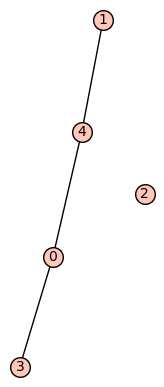

no compatible collections larger than  3
no compatible collections larger than  3
[]


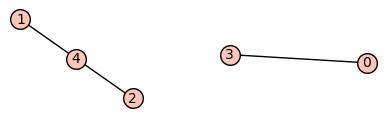

no compatible collections larger than  2
no compatible collections larger than  2
no compatible collections larger than  2
[]


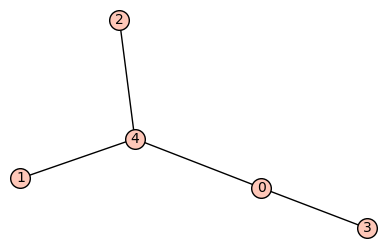

no compatible collections larger than  3
no compatible collections larger than  3
[]


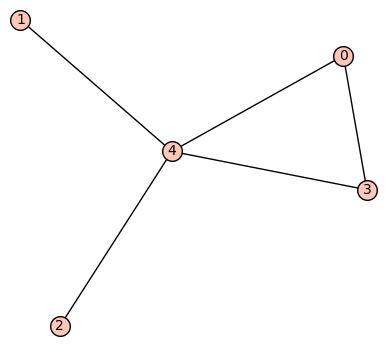

no compatible collections larger than  4
[]


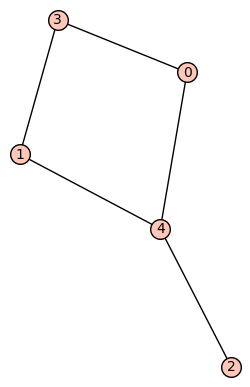

N1d ['234', '013', '0124']
N2d ['013', '1234', '0234', '0124']
N3d ['013', '1234', '0234', '0124']
no compatible collections larger than  4
['1', '3', '2']


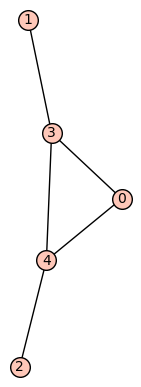

N1d ['024', '013', '1234']
no compatible collections larger than  3
no compatible collections larger than  3
['1']


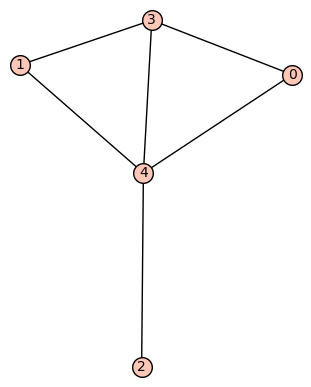

N1d ['234', '013', '0124']
N2d ['013', '1234', '0234', '0124']
N3d ['013', '1234', '0234', '0124']
no compatible collections larger than  4
['1', '3', '2']


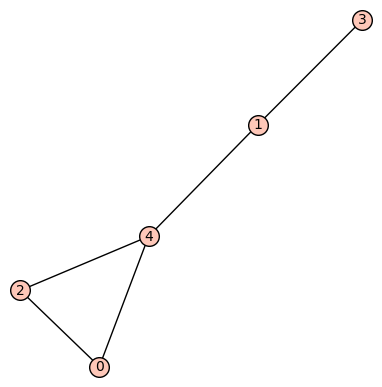

no compatible collections larger than  4
[]


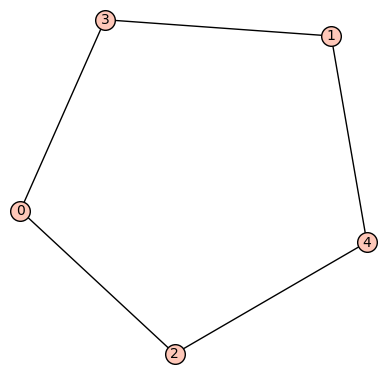

N1d ['034', '123', '0124']
N1d ['012', '034', '1234']
N1d ['014', '123', '0234']
N1d ['234', '012', '0134']
N1d ['234', '014', '0123']
N2d ['123', '0234', '0124', '0134']
N3d ['123', '0234', '0124', '0134']
N2d ['034', '1234', '0123', '0124']
N3d ['034', '1234', '0123', '0124']
N2d ['012', '1234', '0234', '0134']
N3d ['012', '1234', '0234', '0134']
N2d ['014', '1234', '0234', '0123']
N3d ['014', '1234', '0234', '0123']
N2d ['234', '0123', '0124', '0134']
N3d ['234', '0123', '0124', '0134']
N4d ['1234', '0234', '0123', '0124', '0134']
['1', '3', '2', '4']


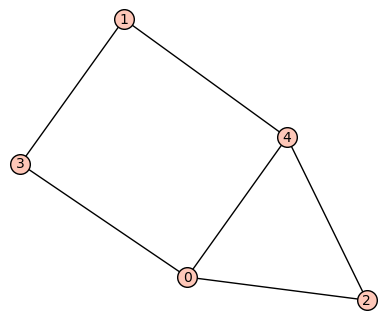

N1d ['034', '123', '0124']
N1d ['012', '034', '1234']
N1d ['014', '123', '0234']
N1d ['234', '012', '0134']
N1d ['234', '014', '0123']
N2d ['123', '0234', '0124', '0134']
N3d ['123', '0234', '0124', '0134']
N2d ['034', '1234', '0123', '0124']
N3d ['034', '1234', '0123', '0124']
N2d ['012', '1234', '0234', '0134']
N3d ['012', '1234', '0234', '0134']
N2d ['014', '1234', '0234', '0123']
N3d ['014', '1234', '0234', '0123']
N2d ['234', '0123', '0124', '0134']
N3d ['234', '0123', '0124', '0134']
N4d ['1234', '0234', '0123', '0124', '0134']
['1', '3', '2', '4']


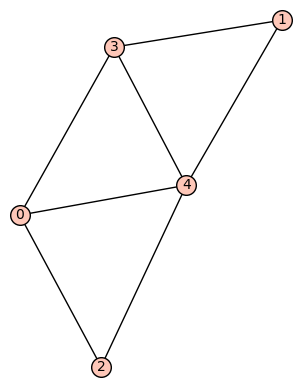

N1d ['034', '123', '0124']
N1d ['012', '034', '1234']
N1d ['014', '123', '0234']
N1d ['234', '012', '0134']
N1d ['234', '014', '0123']
N1d ['124', '034', '0123']
N2d ['123', '0234', '0124', '0134']
N3d ['123', '0234', '0124', '0134']
N2d ['034', '1234', '0123', '0124']
N3d ['034', '1234', '0123', '0124']
N2d ['012', '1234', '0234', '0134']
N3d ['012', '1234', '0234', '0134']
N2d ['014', '1234', '0234', '0123']
N3d ['014', '1234', '0234', '0123']
N2d ['234', '0123', '0124', '0134']
N3d ['234', '0123', '0124', '0134']
N2d ['124', '0234', '0123', '0134']
N3d ['124', '0234', '0123', '0134']
N4d ['1234', '0234', '0123', '0124', '0134']
['1', '3', '2', '4']


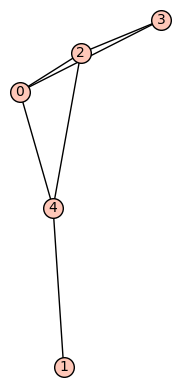

N1d ['023', '134', '0124']
N2d ['023', '1234', '0124', '0134']
N3d ['023', '1234', '0124', '0134']
no compatible collections larger than  4
['1', '3', '2']


In [46]:
n=5
#N=Matroid(groundset='12345',circuits=['145','1234','1235','2345'])

for g in graphs(n):
    m=minrank_bounds(g)
    if m[0]==3:
        g.show()
        Duals=[]
        C3=CompCollForts(g,3,data_type='string')
        for c in C3:
            M=Matroid(groundset='01234',circuits=c)
            if M.is_isomorphic(N1d):
                Duals.append('1')
                print 'N1d',c
        C4=CompCollForts(g,4,data_type='string')
        for c in C4:
            M=Matroid(groundset='01234',circuits=c)
            if M.is_isomorphic(N2d):
                Duals.append('2')
                print 'N2d',c
            if M.is_isomorphic(N3d):
                Duals.append('3')
                print 'N3d',c
        C5=CompCollForts(g,5,data_type='string')
        for c in C5:
            M=Matroid(groundset='01234',circuits=c)
            if M.is_isomorphic(N4d):
                Duals.append('4')
                print 'N4d',c
        
        
        print '============================'  
        print list(set(Duals))
        print '============================'  

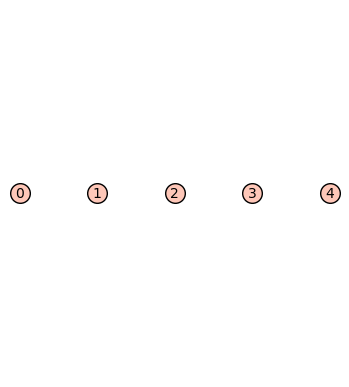

(0, 0)
N1d ['034', '123', '0124']
N1d ['012', '134', '0234']
N1d ['012', '034', '1234']
N1d ['014', '123', '0234']
N1d ['024', '134', '0123']
N1d ['024', '123', '0134']
N1d ['024', '013', '1234']
N1d ['234', '013', '0124']
N1d ['234', '012', '0134']
N1d ['234', '014', '0123']
N1d ['124', '013', '0234']
N1d ['124', '034', '0123']
N1d ['023', '134', '0124']
N1d ['023', '014', '1234']
N1d ['023', '124', '0134']
N2d ['134', '0234', '0123', '0124']
N3d ['134', '0234', '0123', '0124']
N2d ['123', '0234', '0124', '0134']
N3d ['123', '0234', '0124', '0134']
N2d ['013', '1234', '0234', '0124']
N3d ['013', '1234', '0234', '0124']
N2d ['034', '1234', '0123', '0124']
N3d ['034', '1234', '0123', '0124']
N2d ['012', '1234', '0234', '0134']
N3d ['012', '1234', '0234', '0134']
N2d ['014', '1234', '0234', '0123']
N3d ['014', '1234', '0234', '0123']
N2d ['024', '1234', '0123', '0134']
N3d ['024', '1234', '0123', '0134']
N2d ['234', '0123', '0124', '0134']
N3d ['234', '0123', '0124', '0134']
N2d ['124', 

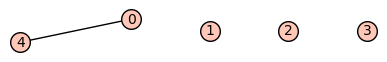

(1, 1)
N1d ['034', '123', '0124']
N1d ['014', '123', '0234']
N1d ['024', '123', '0134']
N2d ['123', '0234', '0124', '0134']
N3d ['123', '0234', '0124', '0134']
['1', '1', '1', '2', '3']


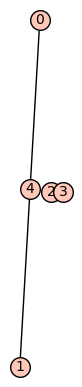

(2, 2)
no compatible collections larger than  4
[]


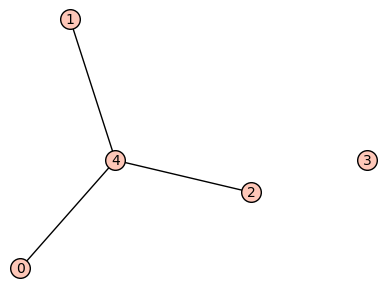

(2, 2)
no compatible collections larger than  4
[]


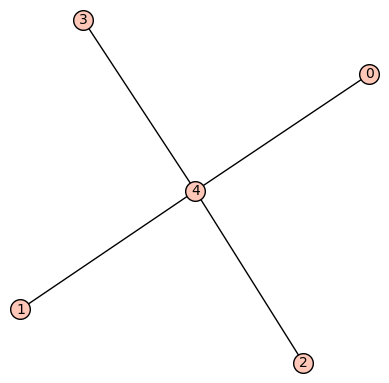

(2, 2)
[]


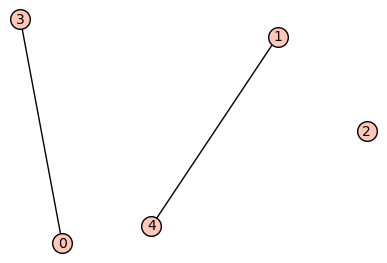

(2, 2)
N1d ['023', '124', '0134']
no compatible collections larger than  3
no compatible collections larger than  3
['1']


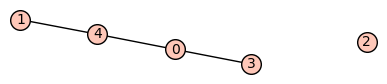

(3, 3)
no compatible collections larger than  3
no compatible collections larger than  3
[]


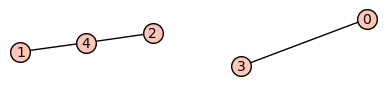

(3, 3)
no compatible collections larger than  2
no compatible collections larger than  2
no compatible collections larger than  2
[]


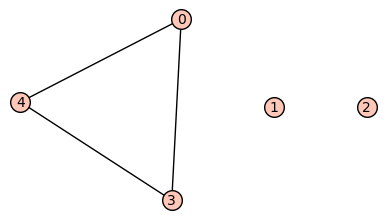

(1, 1)
N1d ['024', '134', '0123']
N1d ['024', '013', '1234']
N1d ['234', '013', '0124']
N1d ['234', '014', '0123']
N1d ['023', '134', '0124']
N1d ['023', '014', '1234']
N2d ['134', '0234', '0123', '0124']
N3d ['134', '0234', '0123', '0124']
N2d ['013', '1234', '0234', '0124']
N3d ['013', '1234', '0234', '0124']
N2d ['034', '1234', '0123', '0124']
N3d ['034', '1234', '0123', '0124']
N2d ['014', '1234', '0234', '0123']
N3d ['014', '1234', '0234', '0123']
N2d ['024', '1234', '0123', '0134']
N3d ['024', '1234', '0123', '0134']
N2d ['234', '0123', '0124', '0134']
N3d ['234', '0123', '0124', '0134']
N2d ['023', '1234', '0124', '0134']
N3d ['023', '1234', '0124', '0134']
N4d ['1234', '0234', '0123', '0124', '0134']
['1', '1', '1', '1', '1', '1', '2', '3', '2', '3', '2', '3', '2', '3', '2', '3', '2', '3', '2', '3', '4']


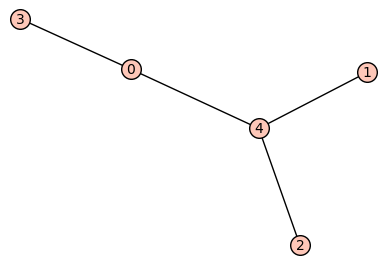

(3, 3)
no compatible collections larger than  3
no compatible collections larger than  3
[]


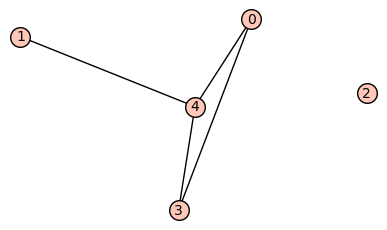

(2, 2)
N1d ['023', '134', '0124']
N1d ['023', '014', '1234']
N2d ['023', '1234', '0124', '0134']
N3d ['023', '1234', '0124', '0134']
no compatible collections larger than  4
['1', '1', '2', '3']


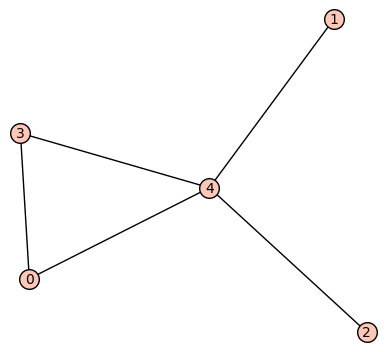

(3, 3)
no compatible collections larger than  4
[]


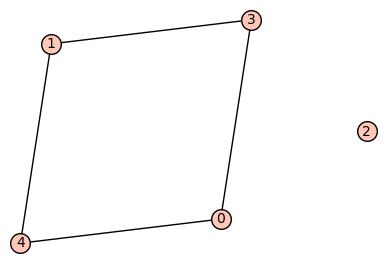

(2, 2)
N1d ['012', '134', '0234']
N1d ['012', '034', '1234']
N1d ['234', '013', '0124']
N1d ['234', '012', '0134']
N1d ['234', '014', '0123']
N2d ['134', '0234', '0123', '0124']
N3d ['134', '0234', '0123', '0124']
N2d ['013', '1234', '0234', '0124']
N3d ['013', '1234', '0234', '0124']
N2d ['034', '1234', '0123', '0124']
N3d ['034', '1234', '0123', '0124']
N2d ['012', '1234', '0234', '0134']
N3d ['012', '1234', '0234', '0134']
N2d ['014', '1234', '0234', '0123']
N3d ['014', '1234', '0234', '0123']
N2d ['234', '0123', '0124', '0134']
N3d ['234', '0123', '0124', '0134']
N4d ['1234', '0234', '0123', '0124', '0134']
['1', '1', '1', '1', '1', '2', '3', '2', '3', '2', '3', '2', '3', '2', '3', '2', '3', '4']


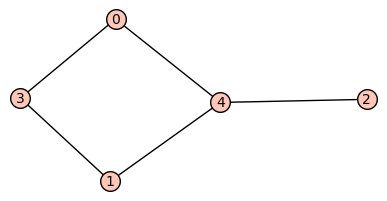

(3, 3)
N1d ['234', '013', '0124']
N2d ['013', '1234', '0234', '0124']
N3d ['013', '1234', '0234', '0124']
no compatible collections larger than  4
['1', '2', '3']


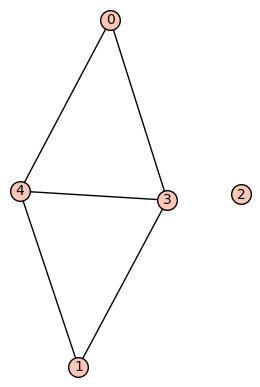

(2, 2)
N1d ['012', '134', '0234']
N1d ['012', '034', '1234']
N1d ['234', '013', '0124']
N1d ['234', '012', '0134']
N1d ['234', '014', '0123']
N2d ['134', '0234', '0123', '0124']
N3d ['134', '0234', '0123', '0124']
N2d ['013', '1234', '0234', '0124']
N3d ['013', '1234', '0234', '0124']
N2d ['034', '1234', '0123', '0124']
N3d ['034', '1234', '0123', '0124']
N2d ['012', '1234', '0234', '0134']
N3d ['012', '1234', '0234', '0134']
N2d ['014', '1234', '0234', '0123']
N3d ['014', '1234', '0234', '0123']
N2d ['234', '0123', '0124', '0134']
N3d ['234', '0123', '0124', '0134']
N4d ['1234', '0234', '0123', '0124', '0134']
['1', '1', '1', '1', '1', '2', '3', '2', '3', '2', '3', '2', '3', '2', '3', '2', '3', '4']


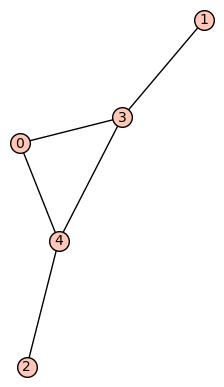

(3, 3)
N1d ['024', '013', '1234']
no compatible collections larger than  3
no compatible collections larger than  3
['1']


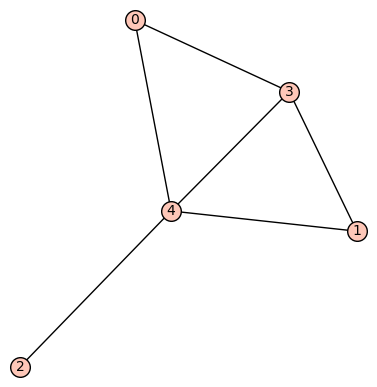

(3, 3)
N1d ['234', '013', '0124']
N2d ['013', '1234', '0234', '0124']
N3d ['013', '1234', '0234', '0124']
no compatible collections larger than  4
['1', '2', '3']


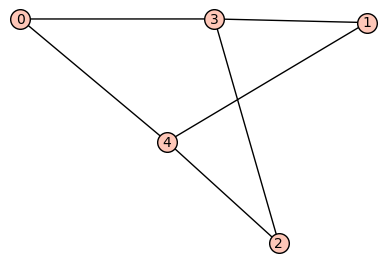

(2, 2)
N1d ['012', '134', '0234']
N1d ['012', '034', '1234']
N1d ['234', '012', '0134']
N2d ['134', '0234', '0123', '0124']
N3d ['134', '0234', '0123', '0124']
N2d ['034', '1234', '0123', '0124']
N3d ['034', '1234', '0123', '0124']
N2d ['012', '1234', '0234', '0134']
N3d ['012', '1234', '0234', '0134']
N2d ['234', '0123', '0124', '0134']
N3d ['234', '0123', '0124', '0134']
N4d ['1234', '0234', '0123', '0124', '0134']
['1', '1', '1', '2', '3', '2', '3', '2', '3', '2', '3', '4']


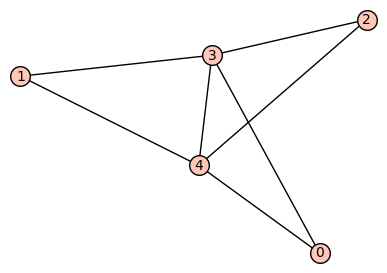

(2, 2)
N1d ['012', '134', '0234']
N1d ['012', '034', '1234']
N1d ['234', '012', '0134']
N2d ['134', '0234', '0123', '0124']
N3d ['134', '0234', '0123', '0124']
N2d ['034', '1234', '0123', '0124']
N3d ['034', '1234', '0123', '0124']
N2d ['012', '1234', '0234', '0134']
N3d ['012', '1234', '0234', '0134']
N2d ['234', '0123', '0124', '0134']
N3d ['234', '0123', '0124', '0134']
N4d ['1234', '0234', '0123', '0124', '0134']
['1', '1', '1', '2', '3', '2', '3', '2', '3', '2', '3', '4']


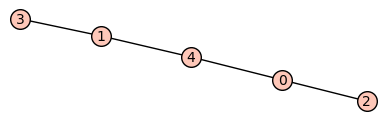

(4, 4)
no compatible collections larger than  0
no compatible collections larger than  0
no compatible collections larger than  0
[]


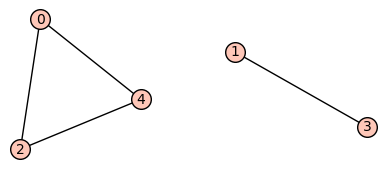

(2, 2)
N2d ['024', '1234', '0123', '0134']
N3d ['024', '1234', '0123', '0134']
no compatible collections larger than  4
['2', '3']


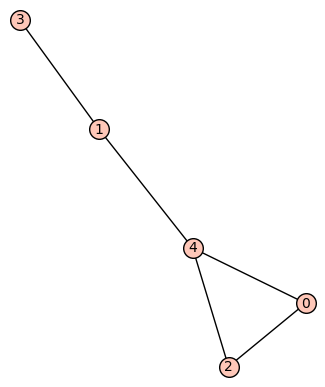

(3, 3)
no compatible collections larger than  4
[]


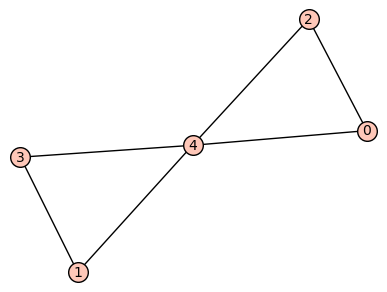

(2, 2)
N1d ['234', '014', '0123']
N1d ['124', '034', '0123']
N2d ['034', '1234', '0123', '0124']
N3d ['034', '1234', '0123', '0124']
N2d ['014', '1234', '0234', '0123']
N3d ['014', '1234', '0234', '0123']
N2d ['234', '0123', '0124', '0134']
N3d ['234', '0123', '0124', '0134']
N2d ['124', '0234', '0123', '0134']
N3d ['124', '0234', '0123', '0134']
N4d ['1234', '0234', '0123', '0124', '0134']
['1', '1', '2', '3', '2', '3', '2', '3', '2', '3', '4']


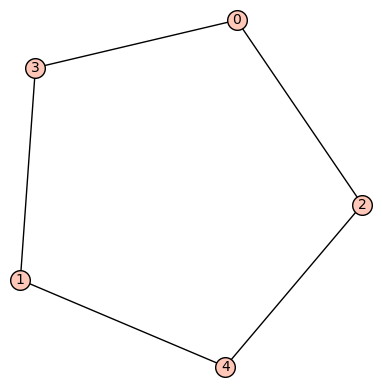

(3, 3)
N1d ['034', '123', '0124']
N1d ['012', '034', '1234']
N1d ['014', '123', '0234']
N1d ['234', '012', '0134']
N1d ['234', '014', '0123']
N2d ['123', '0234', '0124', '0134']
N3d ['123', '0234', '0124', '0134']
N2d ['034', '1234', '0123', '0124']
N3d ['034', '1234', '0123', '0124']
N2d ['012', '1234', '0234', '0134']
N3d ['012', '1234', '0234', '0134']
N2d ['014', '1234', '0234', '0123']
N3d ['014', '1234', '0234', '0123']
N2d ['234', '0123', '0124', '0134']
N3d ['234', '0123', '0124', '0134']
N4d ['1234', '0234', '0123', '0124', '0134']
['1', '1', '1', '1', '1', '2', '3', '2', '3', '2', '3', '2', '3', '2', '3', '4']


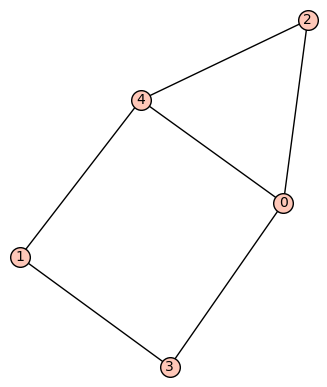

(3, 3)
N1d ['034', '123', '0124']
N1d ['012', '034', '1234']
N1d ['014', '123', '0234']
N1d ['234', '012', '0134']
N1d ['234', '014', '0123']
N2d ['123', '0234', '0124', '0134']
N3d ['123', '0234', '0124', '0134']
N2d ['034', '1234', '0123', '0124']
N3d ['034', '1234', '0123', '0124']
N2d ['012', '1234', '0234', '0134']
N3d ['012', '1234', '0234', '0134']
N2d ['014', '1234', '0234', '0123']
N3d ['014', '1234', '0234', '0123']
N2d ['234', '0123', '0124', '0134']
N3d ['234', '0123', '0124', '0134']
N4d ['1234', '0234', '0123', '0124', '0134']
['1', '1', '1', '1', '1', '2', '3', '2', '3', '2', '3', '2', '3', '2', '3', '4']


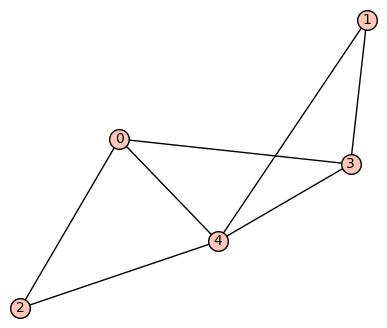

(3, 3)
N1d ['034', '123', '0124']
N1d ['012', '034', '1234']
N1d ['014', '123', '0234']
N1d ['234', '012', '0134']
N1d ['234', '014', '0123']
N1d ['124', '034', '0123']
N2d ['123', '0234', '0124', '0134']
N3d ['123', '0234', '0124', '0134']
N2d ['034', '1234', '0123', '0124']
N3d ['034', '1234', '0123', '0124']
N2d ['012', '1234', '0234', '0134']
N3d ['012', '1234', '0234', '0134']
N2d ['014', '1234', '0234', '0123']
N3d ['014', '1234', '0234', '0123']
N2d ['234', '0123', '0124', '0134']
N3d ['234', '0123', '0124', '0134']
N2d ['124', '0234', '0123', '0134']
N3d ['124', '0234', '0123', '0134']
N4d ['1234', '0234', '0123', '0124', '0134']
['1', '1', '1', '1', '1', '1', '2', '3', '2', '3', '2', '3', '2', '3', '2', '3', '2', '3', '4']


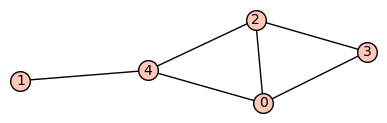

(3, 3)
N1d ['023', '134', '0124']
N2d ['023', '1234', '0124', '0134']
N3d ['023', '1234', '0124', '0134']
no compatible collections larger than  4
['1', '2', '3']


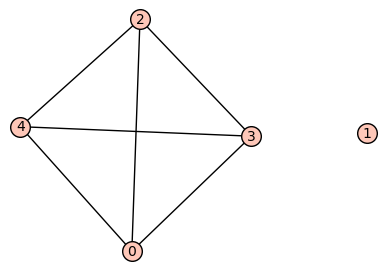

(1, 1)
N1d ['034', '123', '0124']
N1d ['012', '134', '0234']
N1d ['012', '034', '1234']
N1d ['014', '123', '0234']
N1d ['024', '134', '0123']
N1d ['024', '123', '0134']
N1d ['024', '013', '1234']
N1d ['234', '013', '0124']
N1d ['234', '012', '0134']
N1d ['234', '014', '0123']
N1d ['124', '013', '0234']
N1d ['124', '034', '0123']
N1d ['023', '134', '0124']
N1d ['023', '014', '1234']
N1d ['023', '124', '0134']
N2d ['134', '0234', '0123', '0124']
N3d ['134', '0234', '0123', '0124']
N2d ['123', '0234', '0124', '0134']
N3d ['123', '0234', '0124', '0134']
N2d ['013', '1234', '0234', '0124']
N3d ['013', '1234', '0234', '0124']
N2d ['034', '1234', '0123', '0124']
N3d ['034', '1234', '0123', '0124']
N2d ['012', '1234', '0234', '0134']
N3d ['012', '1234', '0234', '0134']
N2d ['014', '1234', '0234', '0123']
N3d ['014', '1234', '0234', '0123']
N2d ['024', '1234', '0123', '0134']
N3d ['024', '1234', '0123', '0134']
N2d ['234', '0123', '0124', '0134']
N3d ['234', '0123', '0124', '0134']
N2d ['124', 

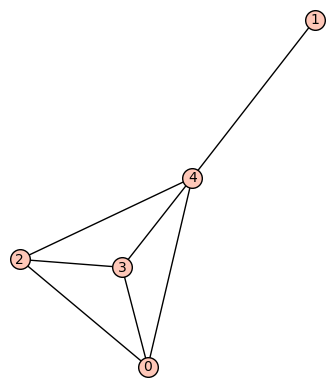

(2, 2)
N1d ['023', '134', '0124']
N1d ['023', '014', '1234']
N1d ['023', '124', '0134']
N2d ['023', '1234', '0124', '0134']
N3d ['023', '1234', '0124', '0134']
['1', '1', '1', '2', '3']


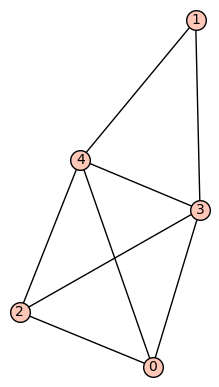

(2, 2)
N1d ['034', '123', '0124']
N1d ['012', '134', '0234']
N1d ['012', '034', '1234']
N1d ['014', '123', '0234']
N1d ['234', '013', '0124']
N1d ['234', '012', '0134']
N1d ['234', '014', '0123']
N1d ['124', '013', '0234']
N1d ['124', '034', '0123']
N2d ['134', '0234', '0123', '0124']
N3d ['134', '0234', '0123', '0124']
N2d ['123', '0234', '0124', '0134']
N3d ['123', '0234', '0124', '0134']
N2d ['013', '1234', '0234', '0124']
N3d ['013', '1234', '0234', '0124']
N2d ['034', '1234', '0123', '0124']
N3d ['034', '1234', '0123', '0124']
N2d ['012', '1234', '0234', '0134']
N3d ['012', '1234', '0234', '0134']
N2d ['014', '1234', '0234', '0123']
N3d ['014', '1234', '0234', '0123']
N2d ['234', '0123', '0124', '0134']
N3d ['234', '0123', '0124', '0134']
N2d ['124', '0234', '0123', '0134']
N3d ['124', '0234', '0123', '0134']
N4d ['1234', '0234', '0123', '0124', '0134']
['1', '1', '1', '1', '1', '1', '1', '1', '1', '2', '3', '2', '3', '2', '3', '2', '3', '2', '3', '2', '3', '2', '3', '2', '3', '4'

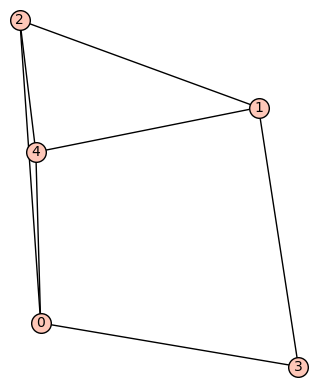

(2, 2)
N1d ['034', '123', '0124']
N1d ['012', '134', '0234']
N1d ['012', '034', '1234']
N1d ['014', '123', '0234']
N1d ['234', '013', '0124']
N1d ['234', '012', '0134']
N1d ['234', '014', '0123']
N1d ['023', '134', '0124']
N1d ['023', '014', '1234']
N2d ['134', '0234', '0123', '0124']
N3d ['134', '0234', '0123', '0124']
N2d ['123', '0234', '0124', '0134']
N3d ['123', '0234', '0124', '0134']
N2d ['013', '1234', '0234', '0124']
N3d ['013', '1234', '0234', '0124']
N2d ['034', '1234', '0123', '0124']
N3d ['034', '1234', '0123', '0124']
N2d ['012', '1234', '0234', '0134']
N3d ['012', '1234', '0234', '0134']
N2d ['014', '1234', '0234', '0123']
N3d ['014', '1234', '0234', '0123']
N2d ['234', '0123', '0124', '0134']
N3d ['234', '0123', '0124', '0134']
N2d ['023', '1234', '0124', '0134']
N3d ['023', '1234', '0124', '0134']
N4d ['1234', '0234', '0123', '0124', '0134']
['1', '1', '1', '1', '1', '1', '1', '1', '1', '2', '3', '2', '3', '2', '3', '2', '3', '2', '3', '2', '3', '2', '3', '2', '3', '4'

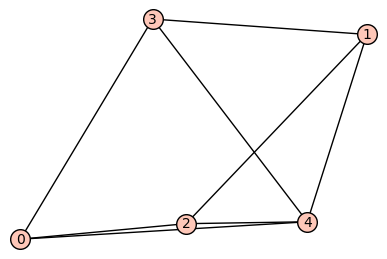

(2, 2)
N1d ['034', '123', '0124']
N1d ['012', '134', '0234']
N1d ['012', '034', '1234']
N1d ['014', '123', '0234']
N1d ['024', '134', '0123']
N1d ['024', '123', '0134']
N1d ['024', '013', '1234']
N1d ['234', '013', '0124']
N1d ['234', '012', '0134']
N1d ['234', '014', '0123']
N1d ['124', '013', '0234']
N1d ['124', '034', '0123']
N1d ['023', '134', '0124']
N1d ['023', '014', '1234']
N1d ['023', '124', '0134']
N2d ['134', '0234', '0123', '0124']
N3d ['134', '0234', '0123', '0124']
N2d ['123', '0234', '0124', '0134']
N3d ['123', '0234', '0124', '0134']
N2d ['013', '1234', '0234', '0124']
N3d ['013', '1234', '0234', '0124']
N2d ['034', '1234', '0123', '0124']
N3d ['034', '1234', '0123', '0124']
N2d ['012', '1234', '0234', '0134']
N3d ['012', '1234', '0234', '0134']
N2d ['014', '1234', '0234', '0123']
N3d ['014', '1234', '0234', '0123']
N2d ['024', '1234', '0123', '0134']
N3d ['024', '1234', '0123', '0134']
N2d ['234', '0123', '0124', '0134']
N3d ['234', '0123', '0124', '0134']
N2d ['124', 

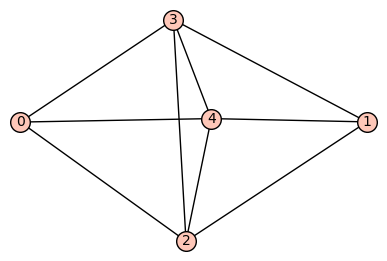

(2, 2)
N1d ['034', '123', '0124']
N1d ['012', '134', '0234']
N1d ['012', '034', '1234']
N1d ['014', '123', '0234']
N1d ['024', '134', '0123']
N1d ['024', '123', '0134']
N1d ['024', '013', '1234']
N1d ['234', '013', '0124']
N1d ['234', '012', '0134']
N1d ['234', '014', '0123']
N1d ['124', '013', '0234']
N1d ['124', '034', '0123']
N1d ['023', '134', '0124']
N1d ['023', '014', '1234']
N1d ['023', '124', '0134']
N2d ['134', '0234', '0123', '0124']
N3d ['134', '0234', '0123', '0124']
N2d ['123', '0234', '0124', '0134']
N3d ['123', '0234', '0124', '0134']
N2d ['013', '1234', '0234', '0124']
N3d ['013', '1234', '0234', '0124']
N2d ['034', '1234', '0123', '0124']
N3d ['034', '1234', '0123', '0124']
N2d ['012', '1234', '0234', '0134']
N3d ['012', '1234', '0234', '0134']
N2d ['014', '1234', '0234', '0123']
N3d ['014', '1234', '0234', '0123']
N2d ['024', '1234', '0123', '0134']
N3d ['024', '1234', '0123', '0134']
N2d ['234', '0123', '0124', '0134']
N3d ['234', '0123', '0124', '0134']
N2d ['124', 

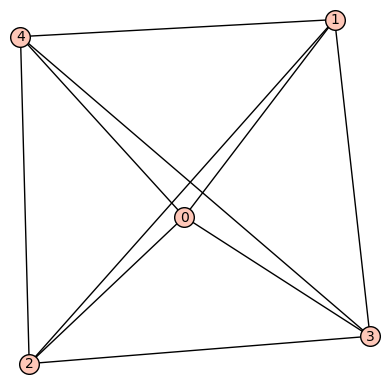

(1, 1)
N1d ['034', '123', '0124']
N1d ['012', '134', '0234']
N1d ['012', '034', '1234']
N1d ['014', '123', '0234']
N1d ['024', '134', '0123']
N1d ['024', '123', '0134']
N1d ['024', '013', '1234']
N1d ['234', '013', '0124']
N1d ['234', '012', '0134']
N1d ['234', '014', '0123']
N1d ['124', '013', '0234']
N1d ['124', '034', '0123']
N1d ['023', '134', '0124']
N1d ['023', '014', '1234']
N1d ['023', '124', '0134']
N2d ['134', '0234', '0123', '0124']
N3d ['134', '0234', '0123', '0124']
N2d ['123', '0234', '0124', '0134']
N3d ['123', '0234', '0124', '0134']
N2d ['013', '1234', '0234', '0124']
N3d ['013', '1234', '0234', '0124']
N2d ['034', '1234', '0123', '0124']
N3d ['034', '1234', '0123', '0124']
N2d ['012', '1234', '0234', '0134']
N3d ['012', '1234', '0234', '0134']
N2d ['014', '1234', '0234', '0123']
N3d ['014', '1234', '0234', '0123']
N2d ['024', '1234', '0123', '0134']
N3d ['024', '1234', '0123', '0134']
N2d ['234', '0123', '0124', '0134']
N3d ['234', '0123', '0124', '0134']
N2d ['124', 

In [41]:
n=5
#N=Matroid(groundset='12345',circuits=['145','1234','1235','2345'])

for g in graphs(n):
    g.show()
    print minrank_bounds(g)
    Duals=[]
    C3=CompCollForts(g,3,data_type='string')
    for c in C3:
        M=Matroid(groundset='01234',circuits=c)
        if M.is_isomorphic(N1d):
            Duals.append('1')
            print 'N1d',c
    C4=CompCollForts(g,4,data_type='string')
    for c in C4:
        M=Matroid(groundset='01234',circuits=c)
        if M.is_isomorphic(N2d):
            Duals.append('2')
            print 'N2d',c
        if M.is_isomorphic(N3d):
            Duals.append('3')
            print 'N3d',c
    C5=CompCollForts(g,5,data_type='string')
    for c in C5:
        M=Matroid(groundset='01234',circuits=c)
        if M.is_isomorphic(N4d):
            Duals.append('4')
            print 'N4d',c
        
        
    print '============================'  
    print Duals
    print '============================'  

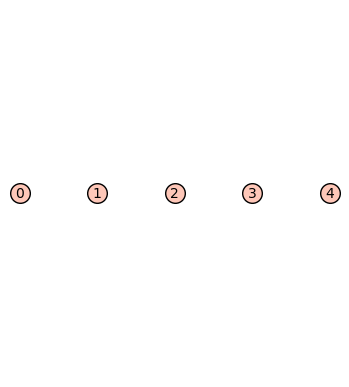

[['134', '0234', '0123', '0124'], ['123', '0234', '0124', '0134'], ['013', '1234', '0234', '0124'], ['034', '1234', '0123', '0124'], ['012', '1234', '0234', '0134'], ['014', '1234', '0234', '0123'], ['014', '034', '013', '134'], ['024', '1234', '0123', '0134'], ['234', '0123', '0124', '0134'], ['124', '0234', '0123', '0134'], ['124', '024', '014', '012'], ['124', '234', '123', '134'], ['023', '1234', '0124', '0134'], ['023', '012', '013', '123'], ['023', '234', '024', '034'], ['01', '13', '03', '24'], ['02', '04', '13', '24'], ['23', '01', '04', '14'], ['23', '02', '03', '14'], ['34', '02', '13', '14'], ['34', '23', '01', '24'], ['12', '03', '24', '14'], ['12', '23', '04', '13'], ['12', '34', '04', '03'], ['12', '34', '02', '01'], ['1', '24', '023', '034'], ['1', '03', '234', '024'], ['1', '04', '023', '234'], ['1', '02', '234', '034'], ['1', '02', '04', '24'], ['1', '23', '024', '034'], ['1', '23', '02', '03'], ['1', '34', '023', '024'], ['1', '34', '04', '03'], ['1', '34', '23', '24'

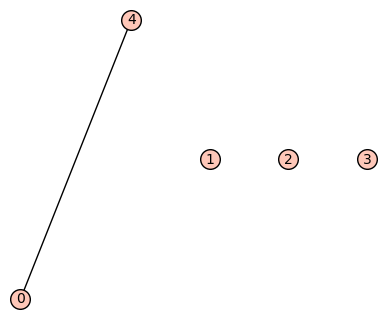

[['123', '0234', '0124', '0134'], ['12', '23', '04', '13'], ['1', '23', '024', '034'], ['2', '13', '014', '034'], ['3', '12', '024', '014'], ['3', '2', '1', '04']]


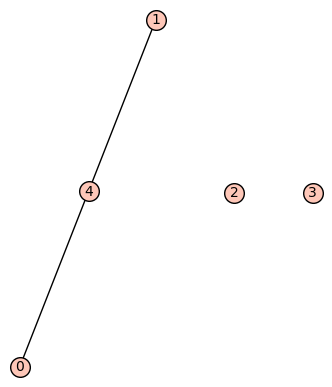

[]


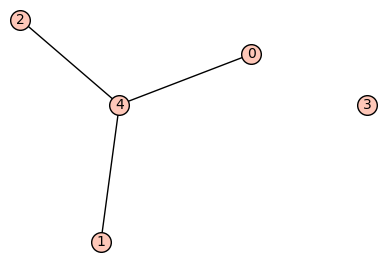

[['023', '012', '013', '123'], ['3', '12', '02', '01']]


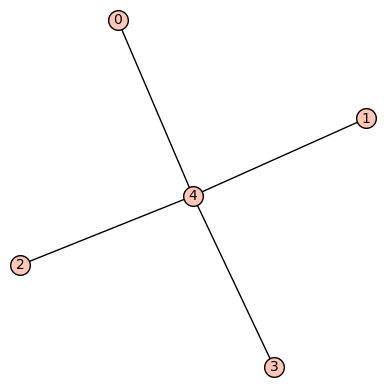

[['023', '012', '013', '123']]


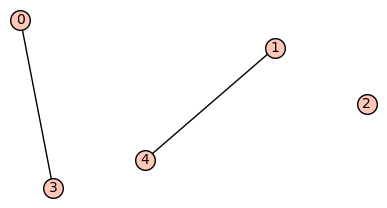

no compatible collections larger than  3
[]


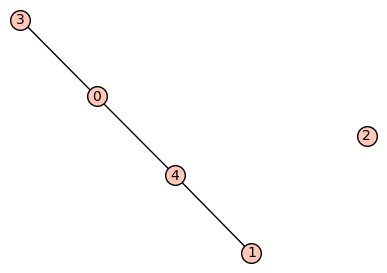

no compatible collections larger than  3
[]


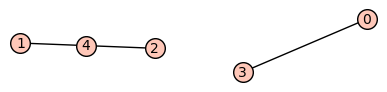

no compatible collections larger than  2
[]


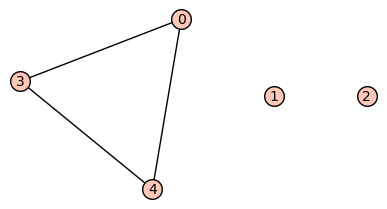

[['134', '0234', '0123', '0124'], ['013', '1234', '0234', '0124'], ['034', '1234', '0123', '0124'], ['014', '1234', '0234', '0123'], ['014', '034', '013', '134'], ['024', '1234', '0123', '0134'], ['234', '0123', '0124', '0134'], ['023', '1234', '0124', '0134'], ['023', '234', '024', '034'], ['12', '34', '04', '03'], ['1', '03', '234', '024'], ['1', '04', '023', '234'], ['1', '34', '023', '024'], ['1', '34', '04', '03'], ['2', '03', '014', '134'], ['2', '04', '013', '134'], ['2', '34', '014', '013'], ['2', '34', '04', '03']]


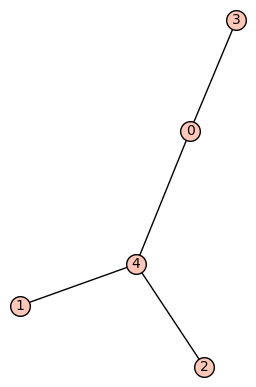

no compatible collections larger than  3
[]


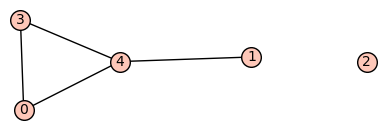

[['023', '1234', '0124', '0134'], ['2', '03', '014', '134']]


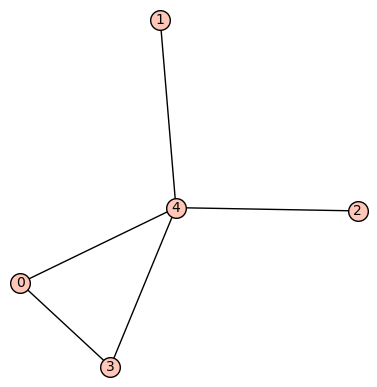

[]


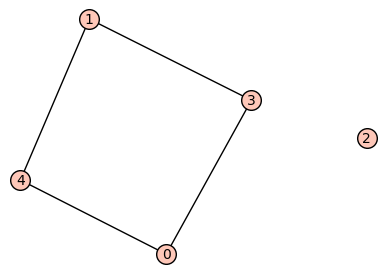

[['134', '0234', '0123', '0124'], ['013', '1234', '0234', '0124'], ['034', '1234', '0123', '0124'], ['012', '1234', '0234', '0134'], ['014', '1234', '0234', '0123'], ['014', '034', '013', '134'], ['234', '0123', '0124', '0134'], ['2', '01', '034', '134'], ['2', '34', '014', '013']]


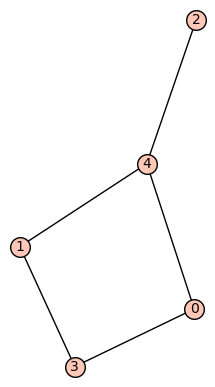

[['013', '1234', '0234', '0124']]


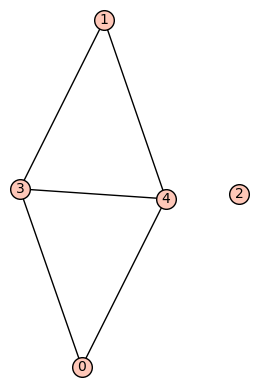

[['134', '0234', '0123', '0124'], ['013', '1234', '0234', '0124'], ['034', '1234', '0123', '0124'], ['012', '1234', '0234', '0134'], ['014', '1234', '0234', '0123'], ['014', '034', '013', '134'], ['234', '0123', '0124', '0134'], ['2', '01', '034', '134'], ['2', '34', '014', '013']]


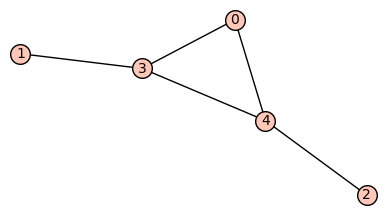

no compatible collections larger than  3
[]


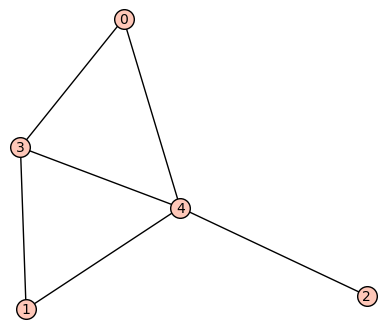

[['013', '1234', '0234', '0124']]


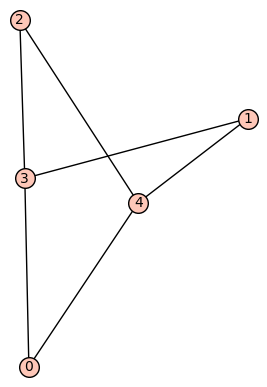

[['134', '0234', '0123', '0124'], ['034', '1234', '0123', '0124'], ['012', '1234', '0234', '0134'], ['234', '0123', '0124', '0134'], ['12', '34', '02', '01']]


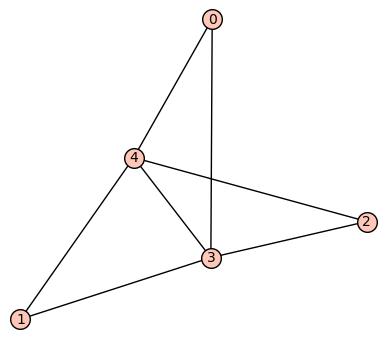

[['134', '0234', '0123', '0124'], ['034', '1234', '0123', '0124'], ['012', '1234', '0234', '0134'], ['234', '0123', '0124', '0134'], ['12', '34', '02', '01']]


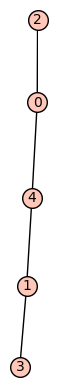

no compatible collections larger than  0
[]


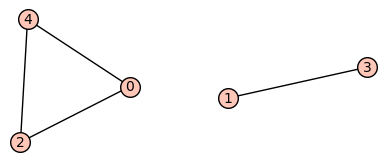

[['024', '1234', '0123', '0134'], ['02', '04', '13', '24']]


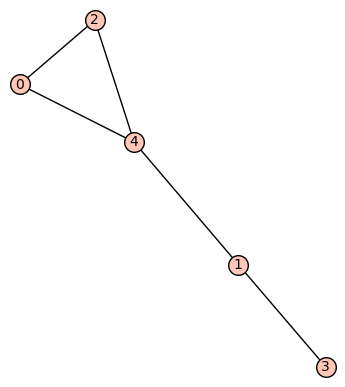

[]


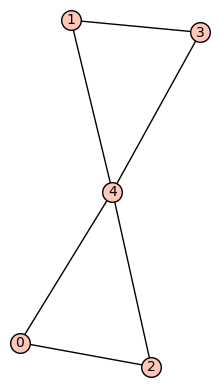

[['034', '1234', '0123', '0124'], ['014', '1234', '0234', '0123'], ['234', '0123', '0124', '0134'], ['124', '0234', '0123', '0134']]


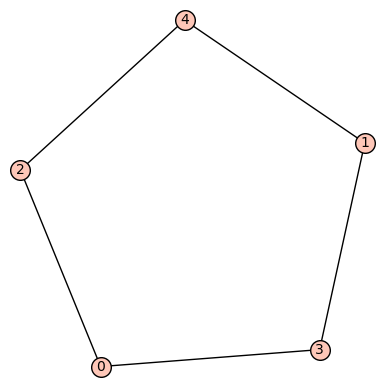

[['123', '0234', '0124', '0134'], ['034', '1234', '0123', '0124'], ['012', '1234', '0234', '0134'], ['014', '1234', '0234', '0123'], ['234', '0123', '0124', '0134']]


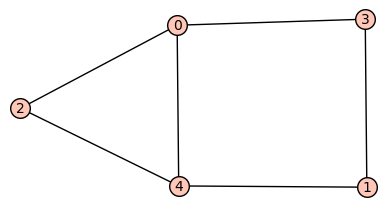

[['123', '0234', '0124', '0134'], ['034', '1234', '0123', '0124'], ['012', '1234', '0234', '0134'], ['014', '1234', '0234', '0123'], ['234', '0123', '0124', '0134']]


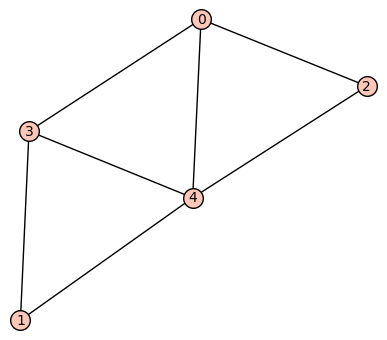

[['123', '0234', '0124', '0134'], ['034', '1234', '0123', '0124'], ['012', '1234', '0234', '0134'], ['014', '1234', '0234', '0123'], ['234', '0123', '0124', '0134'], ['124', '0234', '0123', '0134']]


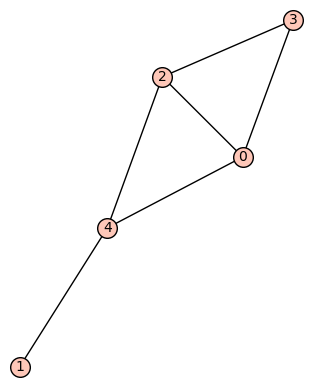

[['023', '1234', '0124', '0134'], ['023', '012', '013', '123']]


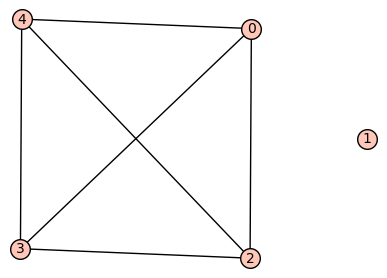

[['134', '0234', '0123', '0124'], ['123', '0234', '0124', '0134'], ['013', '1234', '0234', '0124'], ['034', '1234', '0123', '0124'], ['012', '1234', '0234', '0134'], ['014', '1234', '0234', '0123'], ['014', '034', '013', '134'], ['024', '1234', '0123', '0134'], ['234', '0123', '0124', '0134'], ['124', '0234', '0123', '0134'], ['124', '024', '014', '012'], ['124', '234', '123', '134'], ['023', '1234', '0124', '0134'], ['023', '012', '013', '123'], ['023', '234', '024', '034'], ['1', '24', '023', '034'], ['1', '03', '234', '024'], ['1', '04', '023', '234'], ['1', '02', '234', '034'], ['1', '02', '04', '24'], ['1', '23', '024', '034'], ['1', '23', '02', '03'], ['1', '34', '023', '024'], ['1', '34', '04', '03'], ['1', '34', '23', '24']]


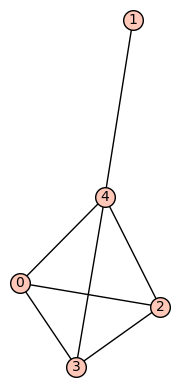

[['023', '1234', '0124', '0134'], ['023', '012', '013', '123']]


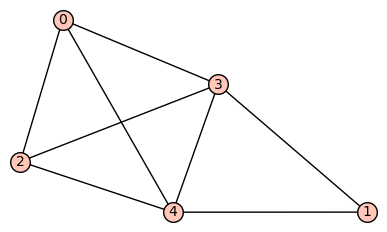

[['134', '0234', '0123', '0124'], ['123', '0234', '0124', '0134'], ['013', '1234', '0234', '0124'], ['034', '1234', '0123', '0124'], ['012', '1234', '0234', '0134'], ['014', '1234', '0234', '0123'], ['014', '034', '013', '134'], ['234', '0123', '0124', '0134'], ['124', '0234', '0123', '0134'], ['124', '234', '123', '134']]


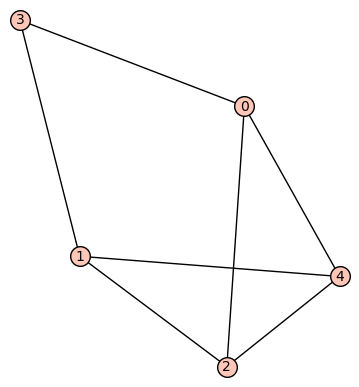

[['134', '0234', '0123', '0124'], ['123', '0234', '0124', '0134'], ['013', '1234', '0234', '0124'], ['034', '1234', '0123', '0124'], ['012', '1234', '0234', '0134'], ['014', '1234', '0234', '0123'], ['014', '034', '013', '134'], ['234', '0123', '0124', '0134'], ['023', '1234', '0124', '0134'], ['023', '012', '013', '123']]


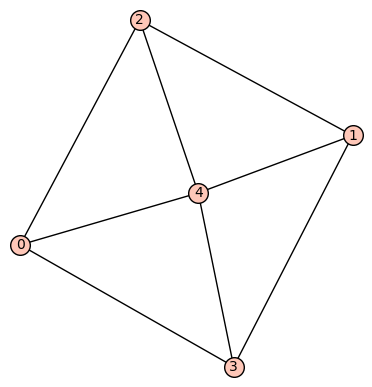

[['134', '0234', '0123', '0124'], ['123', '0234', '0124', '0134'], ['013', '1234', '0234', '0124'], ['034', '1234', '0123', '0124'], ['012', '1234', '0234', '0134'], ['014', '1234', '0234', '0123'], ['014', '034', '013', '134'], ['024', '1234', '0123', '0134'], ['234', '0123', '0124', '0134'], ['124', '0234', '0123', '0134'], ['124', '024', '014', '012'], ['124', '234', '123', '134'], ['023', '1234', '0124', '0134'], ['023', '012', '013', '123'], ['023', '234', '024', '034']]


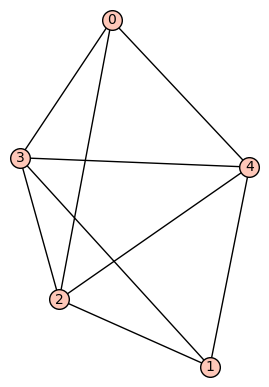

[['134', '0234', '0123', '0124'], ['123', '0234', '0124', '0134'], ['013', '1234', '0234', '0124'], ['034', '1234', '0123', '0124'], ['012', '1234', '0234', '0134'], ['014', '1234', '0234', '0123'], ['014', '034', '013', '134'], ['024', '1234', '0123', '0134'], ['234', '0123', '0124', '0134'], ['124', '0234', '0123', '0134'], ['124', '024', '014', '012'], ['124', '234', '123', '134'], ['023', '1234', '0124', '0134'], ['023', '012', '013', '123'], ['023', '234', '024', '034'], ['34', '23', '01', '24']]


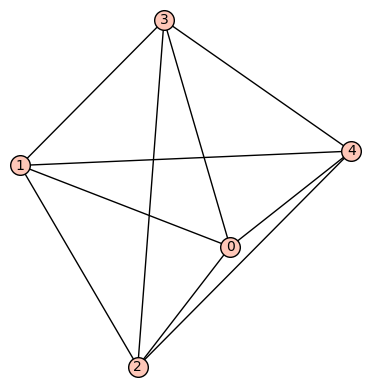

[['134', '0234', '0123', '0124'], ['123', '0234', '0124', '0134'], ['013', '1234', '0234', '0124'], ['034', '1234', '0123', '0124'], ['012', '1234', '0234', '0134'], ['014', '1234', '0234', '0123'], ['014', '034', '013', '134'], ['024', '1234', '0123', '0134'], ['234', '0123', '0124', '0134'], ['124', '0234', '0123', '0134'], ['124', '024', '014', '012'], ['124', '234', '123', '134'], ['023', '1234', '0124', '0134'], ['023', '012', '013', '123'], ['023', '234', '024', '034'], ['01', '13', '03', '24'], ['02', '04', '13', '24'], ['23', '01', '04', '14'], ['23', '02', '03', '14'], ['34', '02', '13', '14'], ['34', '23', '01', '24'], ['12', '03', '24', '14'], ['12', '23', '04', '13'], ['12', '34', '04', '03'], ['12', '34', '02', '01']]


In [22]:
n=5


for g in graphs(n):
    g.show()
    C=CompCollForts(g,4,data_type='string')
    for c in C:
        M=Matroid(groundset='01234',circuits=c)

In [6]:
var('x11,x12,x13,x14,x15,x21,x22,x23,x24,x25')

x14=1
x24=-1
x15=1
x25=2
x23=1



B=Matrix([[1,0,0,x14,x15],
         [0,1,x23,x24,x25]])


var('a11,a12,a21,a22,a31,a32,a41,a42,a51,a52')

a11=1
a12=1
a21=a12
a22=0
a31=a12*x23
a42=1
a51=a11*x15 + a12*x25
a52=a12*x15

A=Matrix([[a11,a12],
          [a21,a22],
         [a31,0],
         [0,a42],
         [a51,a52]])

C=A*B
C

[ 1  1  1  0  3]
[ 1  0  0  1  1]
[ 1  0  0  1  1]
[ 0  1  1 -1  2]
[ 3  1  1  2  5]

In [8]:
C.kernel()

Free module of degree 5 and rank 3 over Integer Ring
Echelon basis matrix:
[ 1  0  2  0 -1]
[ 0  1  2  1 -1]
[ 0  0  3  1 -1]

In [ ]:
var('y11,y12,y13,y14,y15,y21,y22,y23,y24,y25')

In [108]:
var('x11,x12,x13,x14,x15,x21,x22,x23,x24,x25')

x14=1
x24=-1
x13=2
x23=-1
x15=3
x25=-1

B=Matrix([[1,0,x13,x14,x15],
         [0,1,x23,x24,x25]])

B

[ 1  0  2  1  3]
[ 0  1 -1 -1 -1]

In [115]:
var('a11,a12,a21,a22,a31,a32,a41,a42,a51,a52')

a11=1
a12=1
a21=a12
a22=2
a31=1
a42=-1
a51=2
a52=1

A=Matrix([[a11,a12],
          [a21,a22],
         [a31,0],
         [0,a42],
         [a51,a52]])
A

[ 1  1]
[ 1  2]
[ 1  0]
[ 0 -1]
[ 2  1]

In [119]:
C=A*B


In [117]:
for i in range(5):
    for j in range(i+1,5):
        print i,j, '  ', C[i][j], ' = ', C[j][i]

0 1    1  =  1
0 2    1  =  1
0 3    0  =  0
0 4    2  =  2
1 2    0  =  0
1 3    -1  =  -1
1 4    1  =  1
2 3    1  =  1
2 4    3  =  3
3 4    1  =  1


In [120]:
M=Matroid(C)
[list(c) for c in M.circuits()]

[[0, 1, 2],
 [0, 2, 3],
 [1, 2, 3],
 [0, 1, 3],
 [0, 3, 4],
 [1, 3, 4],
 [2, 3, 4],
 [0, 2, 4],
 [1, 2, 4],
 [0, 1, 4]]

In [63]:
C=A*B
C

[              a11               a12 a11*x13 + a12*x23 a11*x14 + a12*x24 a11*x15 + a12*x25]
[              a21               a22 a21*x13 + a22*x23 a21*x14 + a22*x24 a21*x15 + a22*x25]
[              a31                 0           a31*x13           a31*x14           a31*x15]
[                0               a42           a42*x23           a42*x24           a42*x25]
[              a51               a52 a51*x13 + a52*x23 a51*x14 + a52*x24 a51*x15 + a52*x25]

In [54]:
var('x11,x12,x13,x14,x15,x21,x22,x23,x24,x25')

x14=1
x24=-1
x15=1
x25=2
x23=1



B=Matrix([[1,0,0,x14,x15],
         [0,1,x23,x24,x25]])
B

[ 1  0  0  1  1]
[ 0  1  1 -1  2]

In [55]:
var('a11,a12,a21,a22,a31,a32,a41,a42,a51,a52')

a11=1
a12=1
a21=a12
a22=0
a31=a12*x23
a42=1
a51=a11*x15 + a12*x25
a52=a12*x15

A=Matrix([[a11,a12],
          [a21,a22],
         [a31,0],
         [0,a42],
         [a51,a52]])
A

[1 1]
[1 0]
[1 0]
[0 1]
[3 1]

In [59]:
C=A*B
latex(C)

\left(\begin{array}{rrrrr}
1 & 1 & 1 & 0 & 3 \\
1 & 0 & 0 & 1 & 1 \\
1 & 0 & 0 & 1 & 1 \\
0 & 1 & 1 & -1 & 2 \\
3 & 1 & 1 & 2 & 5
\end{array}\right)

In [58]:
M=Matroid(C)
[list(c) for c in M.circuits()]

[[1, 2],
 [0, 2, 3],
 [0, 1, 3],
 [0, 3, 4],
 [1, 3, 4],
 [2, 3, 4],
 [0, 2, 4],
 [0, 1, 4]]

In [57]:
for i in range(5):
    for j in range(i+1,5):
        print i,j, '  ', C[i][j], ' = ', C[j][i]

0 1    1  =  1
0 2    1  =  1
0 3    0  =  0
0 4    3  =  3
1 2    0  =  0
1 3    1  =  1
1 4    1  =  1
2 3    1  =  1
2 4    1  =  1
3 4    2  =  2


In [15]:
C=A*B
C

[              a11               a12           a12*x23 a11*x14 + a12*x24 a11*x15 + a12*x25]
[              a21               a22           a22*x23 a21*x14 + a22*x24 a21*x15 + a22*x25]
[              a31                 0                 0           a31*x14           a31*x15]
[                0               a42           a42*x23           a42*x24           a42*x25]
[              a51               a52           a52*x23 a51*x14 + a52*x24 a51*x15 + a52*x25]

In [1]:
var('x11,x12,x13,x14,x15,x21,x22,x23,x24,x25')

x23=1
x25=1
x13=1
x14=1
x15=2

B=Matrix([[1,0,x13,x14,x15],
         [0,1,x23,0,x25]])
B

[1 0 1 1 2]
[0 1 1 0 1]

In [2]:
var('a11,a12,a21,a22,a31,a32,a41,a42,a51,a52')



a12=1
a11=0
a21=a12
a31=a11*x13 + a12*x23
a22=-a12*x13/x23

a51=a12*x25
a52=a21*x15 + a22*x25
a42=a12*x14




A=Matrix([[a11,a12],
          [a21,a22],
         [a31,0],
         [0,a42],
         [a51,a52]])
A

[ 0  1]
[ 1 -1]
[ 1  0]
[ 0  1]
[ 1  1]

In [4]:
M=A*B
latex(M)

\left(\begin{array}{rrrrr}
0 & 1 & 1 & 0 & 1 \\
1 & -1 & 0 & 1 & 1 \\
1 & 0 & 1 & 1 & 2 \\
0 & 1 & 1 & 0 & 1 \\
1 & 1 & 2 & 1 & 3
\end{array}\right)

In [94]:
for i in range(5):
    for j in range(i+1,5):
        print i,j, '  ', M[i][j], ' = ', M[j][i]

0 1    1  =  1
0 2    1  =  1
0 3    0  =  0
0 4    1  =  1
1 2    0  =  0
1 3    1  =  1
1 4    1  =  1
2 3    1  =  1
2 4    2  =  2
3 4    1  =  1


In [95]:
T=Matroid(M)
print [list(t) for t in T.circuits()]

[[0, 1, 2], [1, 2, 3], [0, 3], [1, 3, 4], [2, 3, 4], [0, 2, 4], [1, 2, 4], [0, 1, 4]]


In [53]:
latex(M)

\left(\begin{array}{rrrrr}
0 & a_{12} & a_{12} x_{23} & 0 & a_{12} x_{25} \\
a_{12} & -\frac{a_{12} x_{13}}{x_{23}} & 0 & a_{12} x_{14} & a_{12} x_{15} - \frac{a_{12} x_{13} x_{25}}{x_{23}} \\
a_{11} x_{13} + a_{12} x_{23} & 0 & {\left(a_{11} x_{13} + a_{12} x_{23}\right)} x_{13} & {\left(a_{11} x_{13} + a_{12} x_{23}\right)} x_{14} & {\left(a_{11} x_{13} + a_{12} x_{23}\right)} x_{15} \\
0 & a_{42} & a_{42} x_{23} & 0 & a_{42} x_{25} \\
a_{12} x_{25} & a_{12} x_{15} - \frac{a_{12} x_{13} x_{25}}{x_{23}} & a_{12} x_{13} x_{25} + {\left(a_{12} x_{15} - \frac{a_{12} x_{13} x_{25}}{x_{23}}\right)} x_{23} & a_{12} x_{14} x_{25} & a_{12} x_{15} x_{25} + {\left(a_{12} x_{15} - \frac{a_{12} x_{13} x_{25}}{x_{23}}\right)} x_{25}
\end{array}\right)

In [46]:
M

[              a11               a12 a11*x13 + a12*x23           a11*x14 a11*x15 + a12*x25]
[              a21               a22 a21*x13 + a22*x23           a21*x14 a21*x15 + a22*x25]
[              a31                 0           a31*x13           a31*x14           a31*x15]
[                0               a42           a42*x23                 0           a42*x25]
[              a51               a52 a51*x13 + a52*x23           a51*x14 a51*x15 + a52*x25]

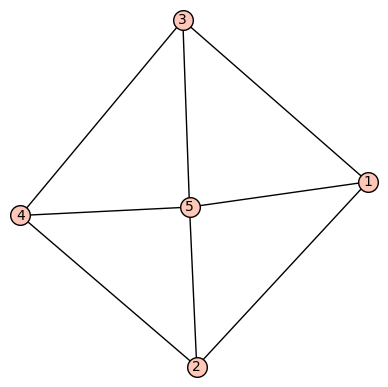

In [36]:
G=Graph({1:[2,3,5],2:[4,5],3:[4,5],4:[5]})
G.show()

In [37]:
A=[Set(a) for a in All_Forts(G)]
print A

[{2, 3}, {1, 4}, {1, 2, 4}, {2, 3, 4}, {1, 2, 3}, {1, 4, 5}, {1, 3, 4}, {1, 3, 5}, {3, 4, 5}, {2, 3, 5}, {1, 2, 5}, {2, 4, 5}, {1, 2, 3, 4}, {1, 2, 3, 5}, {2, 3, 4, 5}, {1, 2, 4, 5}, {1, 3, 4, 5}, {1, 2, 3, 4, 5}]


In [38]:
FG=Fort_RGraph(G)

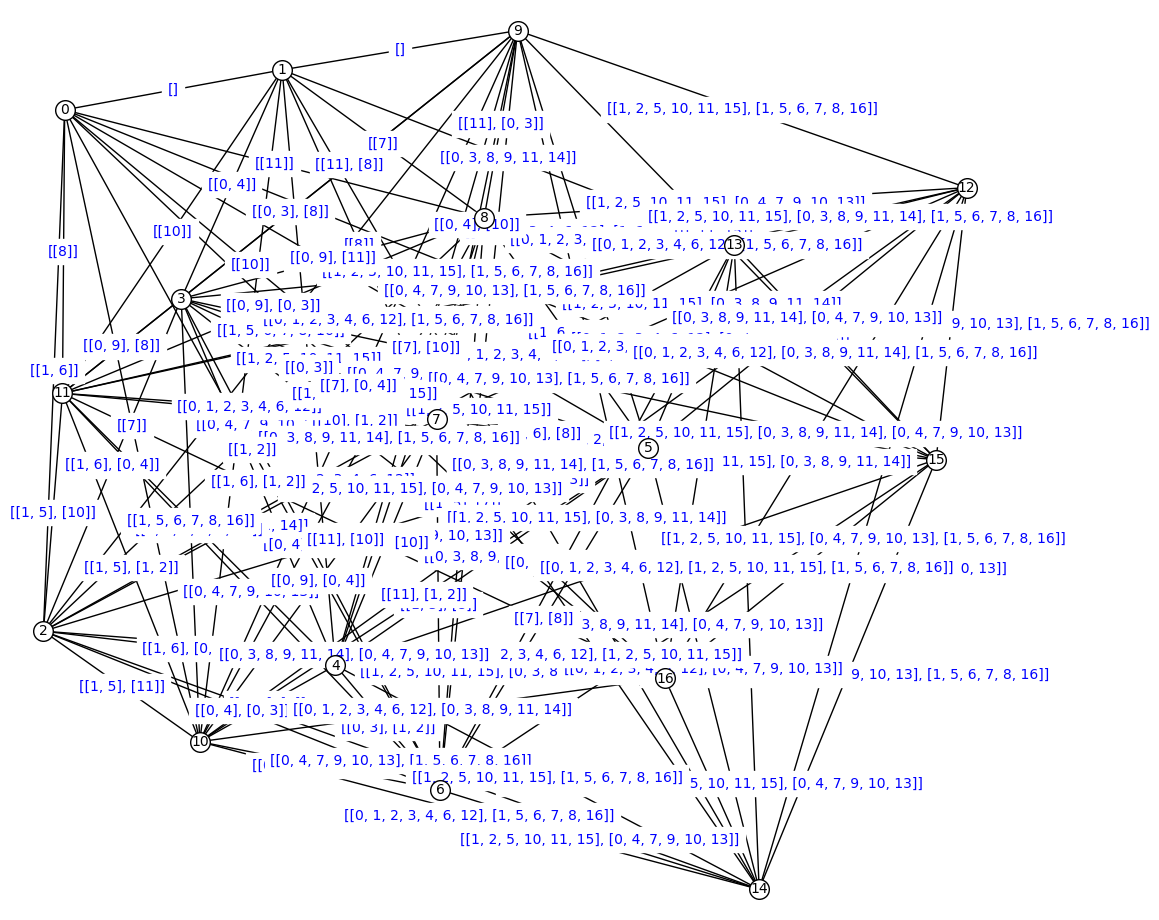

In [39]:
FG.plot(edge_labels=True,vertex_color='white').show(figsize=(10,10))

In [40]:
FG.clique_number()

10

In [16]:
CompCollForts(G,10,data_type='set')

[[{1, 2, 4},
  {2, 3, 4},
  {1, 2, 3},
  {1, 4, 5},
  {1, 3, 4},
  {1, 3, 5},
  {3, 4, 5},
  {2, 3, 5},
  {1, 2, 5},
  {2, 4, 5}]]

In [41]:
for i in range(1,11):
    CC=CompCollForts(G,i)
    m=len(CC)
    for j in range(m):
        C=CC[j]
        M=Matroid(groundset='12345',circuits=C)
        r=M.rank()
        if r==2:
            print C

['23', '14', '135', '345', '125', '245']
['14', '234', '123', '135', '345', '235', '125', '245']
['23', '124', '145', '134', '135', '345', '125', '245']
['124', '234', '123', '145', '134', '135', '345', '235', '125', '245']


In [42]:
for i in range(1,11):
    CC=CompCollForts(G,i)
    m=len(CC)
    for j in range(m):
        C=CC[j]
        M=Matroid(groundset='12345',circuits=C)
        r=M.rank()
        if r==3:
            print C

['14', '235']
['23', '145']
['23', '14']
['345', '125', '1234']
['135', '245', '1234']
['134', '245', '1235']
['134', '125', '2345']
['134', '235', '1245']
['145', '235', '1234']
['123', '245', '1345']
['123', '345', '1245']
['123', '145', '2345']
['234', '125', '1345']
['234', '135', '1245']
['234', '145', '1235']
['124', '235', '1345']
['124', '345', '1235']
['124', '135', '2345']
['14', '1235', '2345']
['14', '125', '245']
['14', '135', '345']
['14', '234', '123']
['23', '1245', '1345']
['23', '345', '245']
['23', '135', '125']
['23', '124', '134']
['245', '1234', '1235', '1345']
['125', '1234', '2345', '1345']
['235', '1234', '1245', '1345']
['345', '1234', '1235', '1245']
['135', '1234', '2345', '1245']
['134', '1235', '2345', '1245']
['145', '1234', '1235', '2345']
['145', '134', '135', '345']
['123', '2345', '1245', '1345']
['123', '135', '235', '125']
['234', '1235', '1245', '1345']
['234', '345', '235', '245']
['124', '1235', '2345', '1345']
['124', '145', '125', '245']
['124'

In [33]:
for i in range(1,11):
    print '|F|=', i
    CC=CompCollForts(G,i)
    m=len(CC)
    for j in range(m):
        C=CC[j]
        M=Matroid(groundset='12345',circuits=C)
        print 
        print 'rank =',M.rank(),',', 'Comp Coll =',C
    print '==============================================================='

|F|= 1

rank = 4 , Comp Coll = ['13']

rank = 4 , Comp Coll = ['24']

rank = 4 , Comp Coll = ['124']

rank = 4 , Comp Coll = ['234']

rank = 4 , Comp Coll = ['123']

rank = 4 , Comp Coll = ['145']

rank = 4 , Comp Coll = ['134']

rank = 4 , Comp Coll = ['135']

rank = 4 , Comp Coll = ['345']

rank = 4 , Comp Coll = ['235']

rank = 4 , Comp Coll = ['125']

rank = 4 , Comp Coll = ['245']

rank = 4 , Comp Coll = ['1234']

rank = 4 , Comp Coll = ['1235']

rank = 4 , Comp Coll = ['2345']

rank = 4 , Comp Coll = ['1245']

rank = 4 , Comp Coll = ['1345']

rank = 4 , Comp Coll = ['12345']
|F|= 2

rank = 3 , Comp Coll = ['24', '135']

rank = 3 , Comp Coll = ['13', '245']

rank = 3 , Comp Coll = ['13', '24']
|F|= 3

rank = 3 , Comp Coll = ['345', '125', '1234']

rank = 3 , Comp Coll = ['135', '245', '1234']

rank = 3 , Comp Coll = ['134', '245', '1235']

rank = 3 , Comp Coll = ['134', '125', '2345']

rank = 3 , Comp Coll = ['134', '235', '1245']

rank = 3 , Comp Coll = ['145', '235', '1234']

ra

In [17]:
CompCollForts(G,10)

[['124', '234', '123', '145', '134', '135', '345', '235', '125', '245']]

In [18]:
C=['124', '234', '123', '145', '134', '135', '345', '235', '125', '245']
M=Matroid(groundset='12345',circuits=C)

In [19]:
M.rank()

2

In [20]:
minrank_bounds(G)

(2, 2)

In [22]:
#no compatible collections of minimal forts with 9 elements
CompCollForts(G,8)

[['24', '123', '145', '134', '135', '345', '235', '125'],
 ['13', '124', '234', '145', '345', '235', '125', '245']]

In [ ]:
C=['24', '123', '145', '134', '135', '345', '235', '125']
M=Matroid(groundset='12345',circuits=C)

In [23]:
M.rank()

2

In [24]:
C=['13', '124', '234', '145', '345', '235', '125', '245']
M=Matroid(groundset='12345',circuits=C)

In [25]:
M.rank()

2

In [27]:
#no compatible collections of minimal forts with 7 elements
CompCollForts(G,6)

[['13', '24', '145', '345', '235', '125']]

In [4]:
G=Graph('H??CFx}')

In [5]:
FG=Fort_RGraph(G)

In [6]:
FG.clique_number()

45

In [7]:
CompCollForts(G,45,data_type='string')

KeyboardInterrupt: 

D??


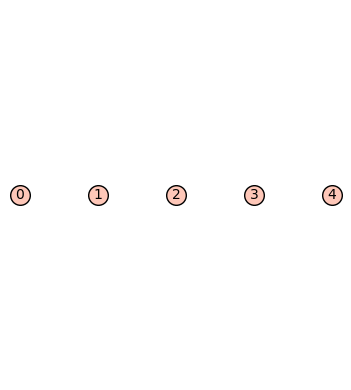

D?_


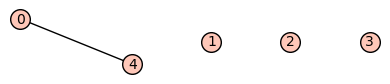

D?o


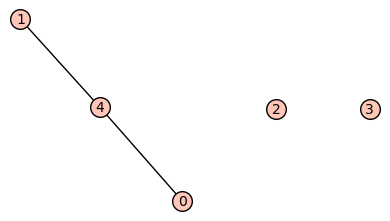

D?w


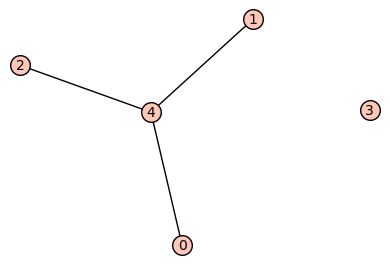

D?{


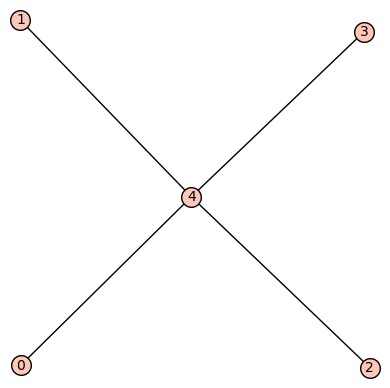

DCO


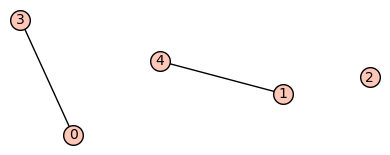

DCo


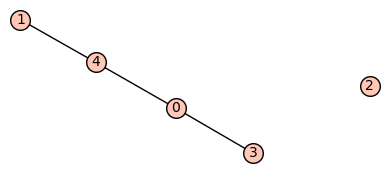

DCW


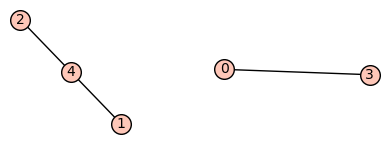

DCc


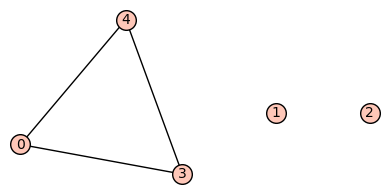

DCw


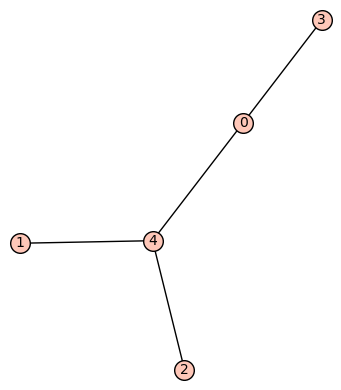

DCs


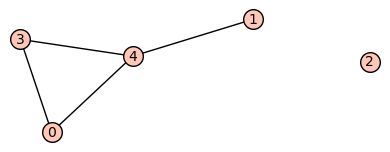

DC{


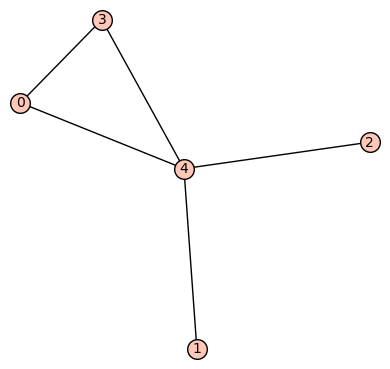

DEo


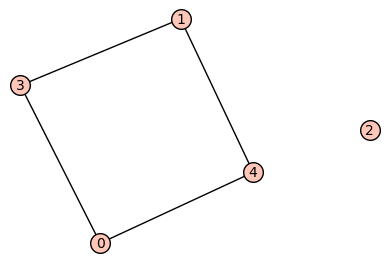

DEw


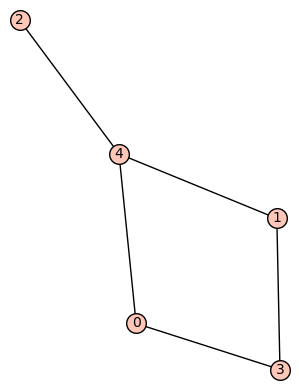

DEs


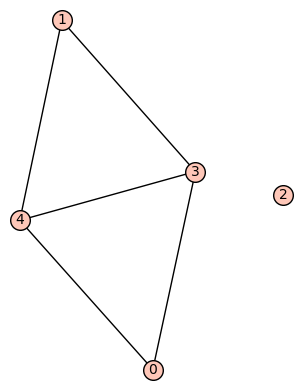

DEk


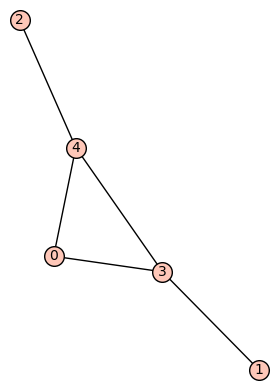

DE{


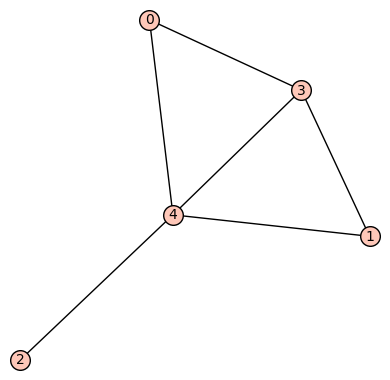

DFw


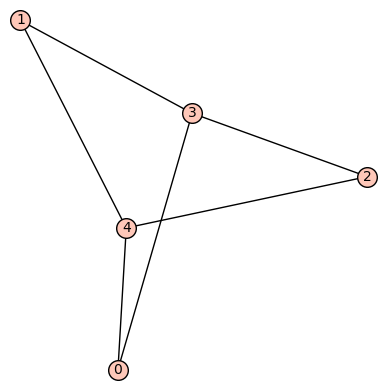

DF{


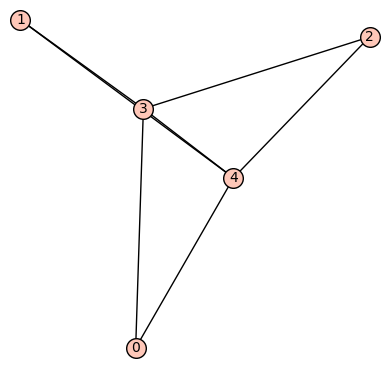

DQo


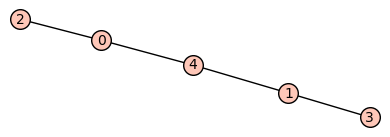

DQg


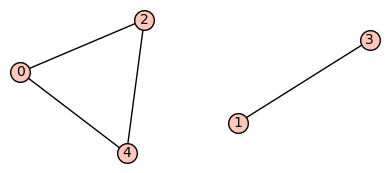

DQw


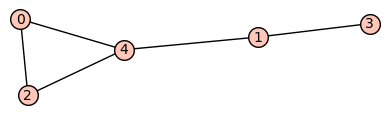

DQ{


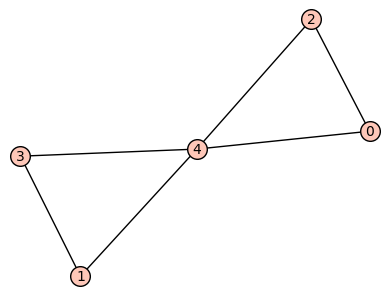

DUW


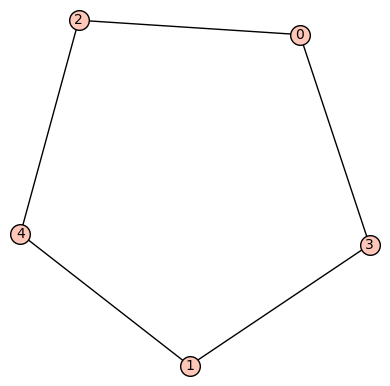

DUw


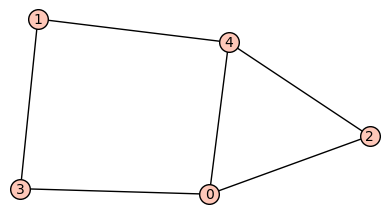

DU{


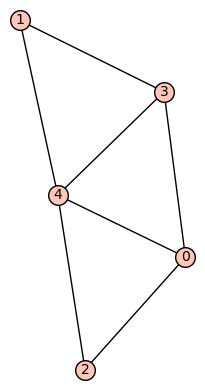

DTw


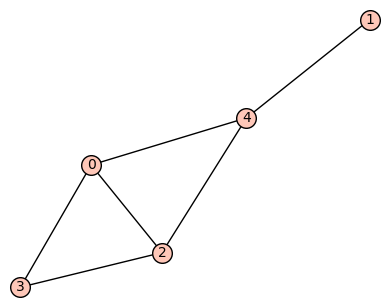

DTk


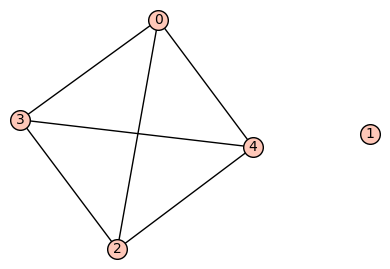

DT{


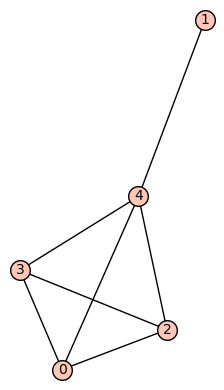

DV{


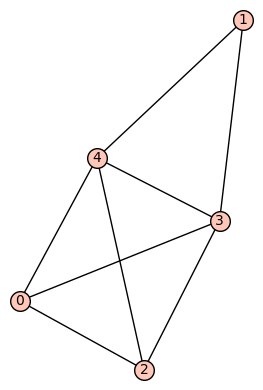

D]w


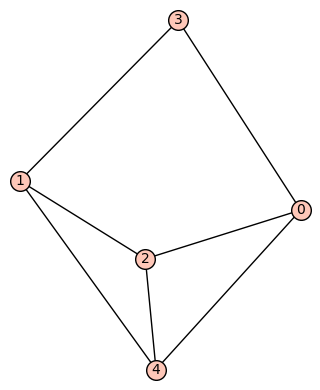

D]{


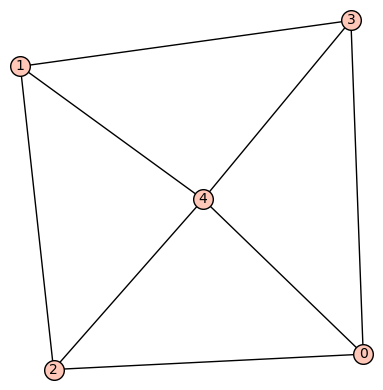

D^{


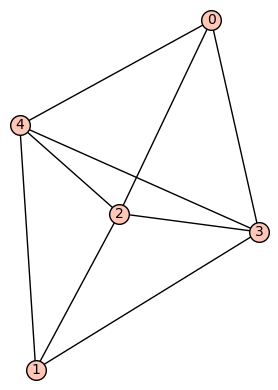

D~{


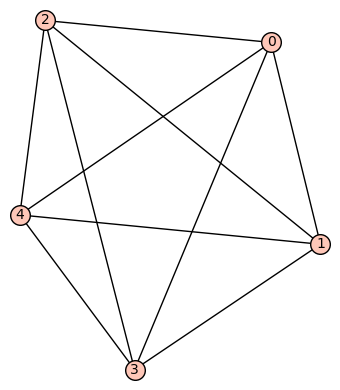

In [6]:
n=5
for g in graphs(n):
    print g.graph6_string()
    g.show()

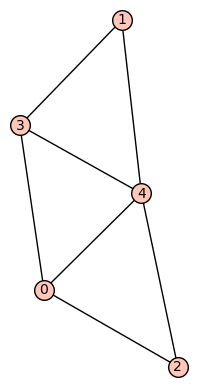

In [29]:
G=Graph('DU{')
G.show()

total number of forts =  12
clique number =  5


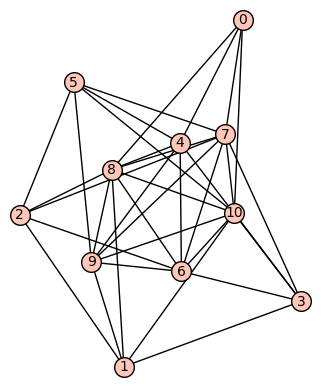

In [8]:
Fort_RGraph(G).plot()

In [27]:
C1=CompCollForts(G,1)

In [28]:
print C1

for x in C1:
    M=Matroid(groundset='01234',circuits=x)
    print x, 'rank = ', M.rank(), M.is_valid()

[['124'], ['234'], ['014'], ['012'], ['034'], ['123'], ['1234'], ['0234'], ['0123'], ['0124'], ['0134'], ['01234']]
['124'] rank =  4 True
['234'] rank =  4 True
['014'] rank =  4 True
['012'] rank =  4 True
['034'] rank =  4 True
['123'] rank =  4 True
['1234'] rank =  4 True
['0234'] rank =  4 True
['0123'] rank =  4 True
['0124'] rank =  4 True
['0134'] rank =  4 True
['01234'] rank =  4 True


In [25]:
C2=CompCollForts(G,2)

In [26]:
print C2

for x in C2:
    M=Matroid(groundset='01234',circuits=x)
    print x, 'rank = ', M.rank(), M.is_valid()

[]


In [19]:
C3=CompCollForts(G,3)

In [20]:
print C3

for x in C3:
    M=Matroid(groundset='01234',circuits=x)
    print x, 'rank = ', M.rank(), M.is_valid()

[['034', '123', '0124'], ['012', '034', '1234'], ['014', '123', '0234'], ['234', '012', '0134'], ['234', '014', '0123'], ['124', '034', '0123']]
['034', '123', '0124'] rank =  3 True
['012', '034', '1234'] rank =  3 True
['014', '123', '0234'] rank =  3 True
['234', '012', '0134'] rank =  3 True
['234', '014', '0123'] rank =  3 True
['124', '034', '0123'] rank =  3 True


In [21]:
C4=CompCollForts(G,4)

In [22]:
print C4

for x in C4:
    M=Matroid(groundset='01234',circuits=x)
    print x, 'rank = ', M.rank(), M.is_valid()

[['123', '0234', '0124', '0134'], ['034', '1234', '0123', '0124'], ['012', '1234', '0234', '0134'], ['014', '1234', '0234', '0123'], ['234', '0123', '0124', '0134'], ['124', '0234', '0123', '0134']]
['123', '0234', '0124', '0134'] rank =  3 True
['034', '1234', '0123', '0124'] rank =  3 True
['012', '1234', '0234', '0134'] rank =  3 True
['014', '1234', '0234', '0123'] rank =  3 True
['234', '0123', '0124', '0134'] rank =  3 True
['124', '0234', '0123', '0134'] rank =  3 True


In [23]:
#compatible collections for 'DU{'
C5=CompCollForts(G,5)

In [24]:
print C5

for x in C5:
    M=Matroid(groundset='01234',circuits=x)
    print x, 'rank = ', M.rank(), M.is_valid()

[['1234', '0234', '0123', '0124', '0134']]
['1234', '0234', '0123', '0124', '0134'] rank =  3 True


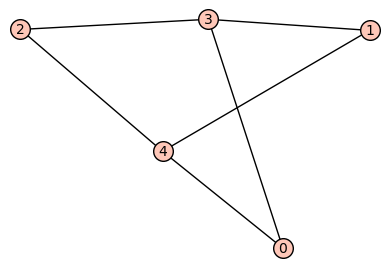

total number of forts =  14
[[1, 2], [3, 4], [0, 2], [0, 1], [2, 3, 4], [0, 1, 2], [0, 3, 4], [1, 3, 4], [1, 2, 3, 4], [0, 2, 3, 4], [0, 1, 2, 3], [0, 1, 2, 4], [0, 1, 3, 4], [0, 1, 2, 3, 4]]


In [7]:
G=Graph('DFw')
G.show()
#print minrank_bounds(G)
print All_Forts(G)

total number of forts =  14
total number of forts =  14
clique number =  6
total number of forts =  14
clique number =  6


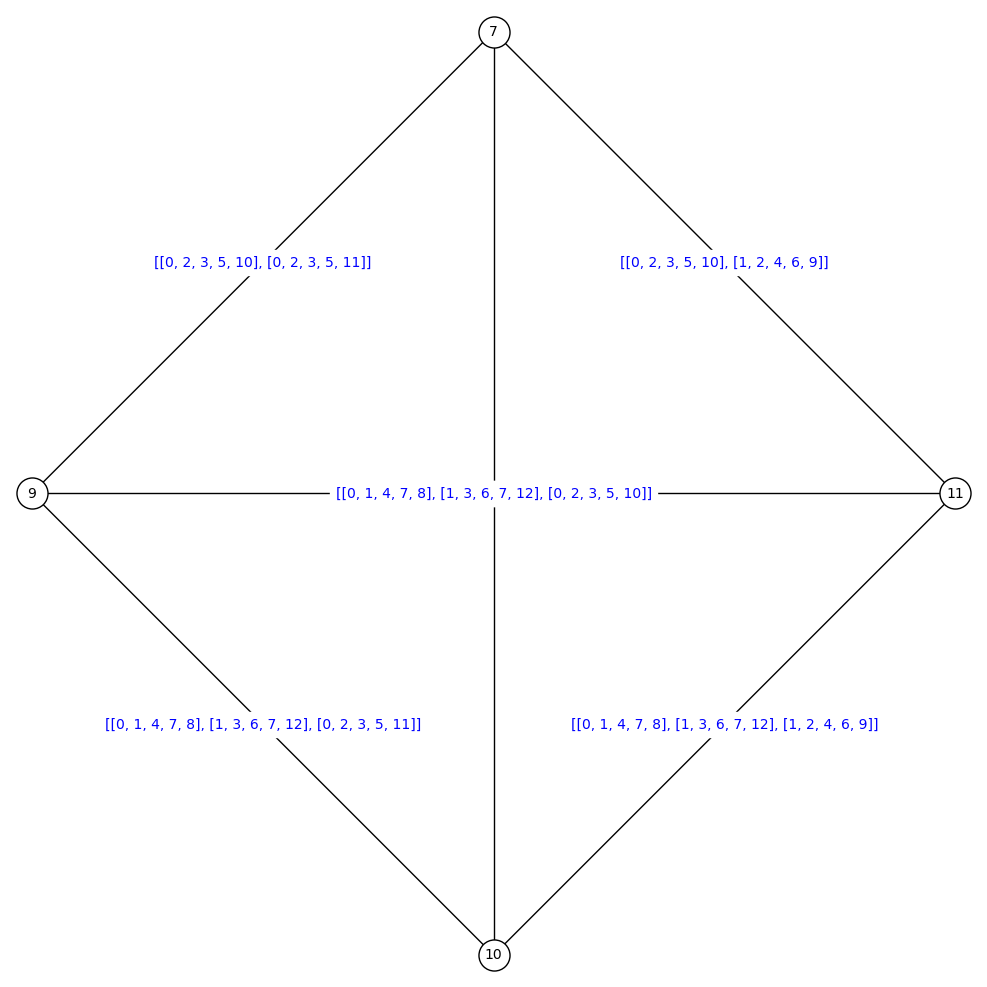

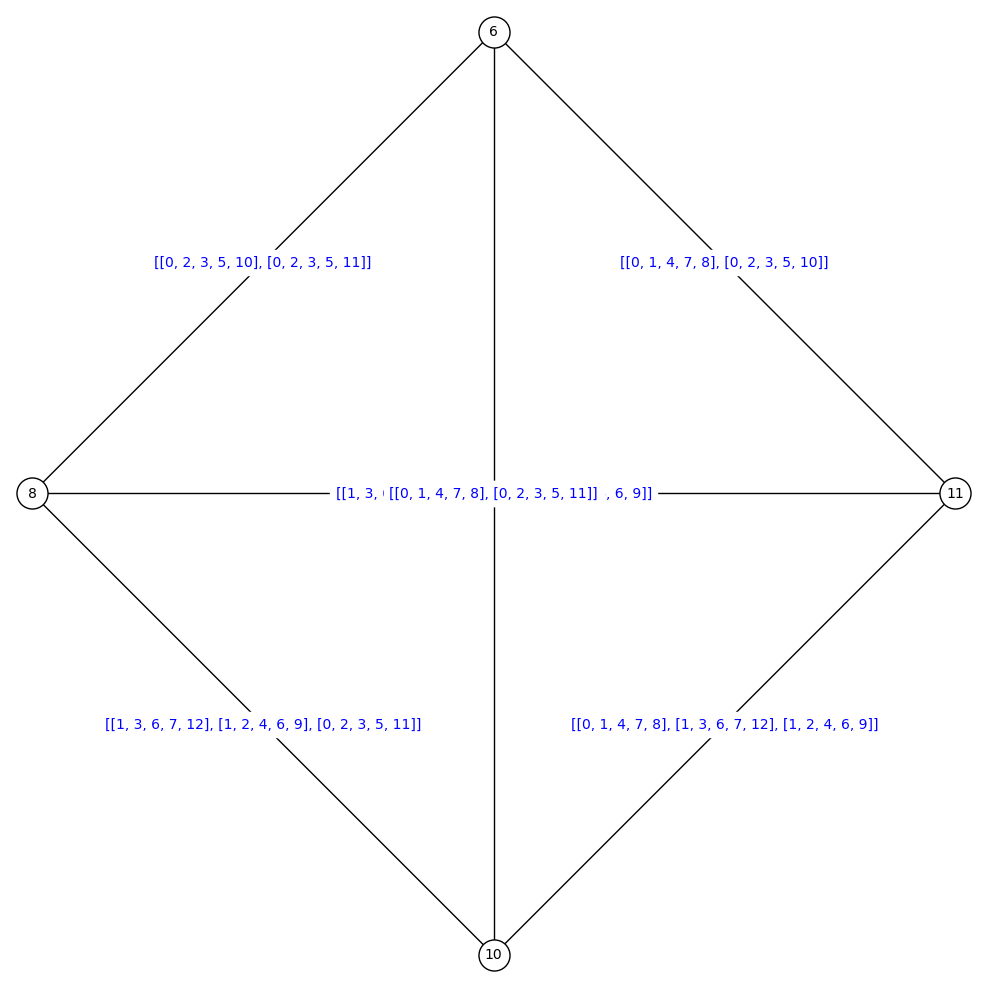

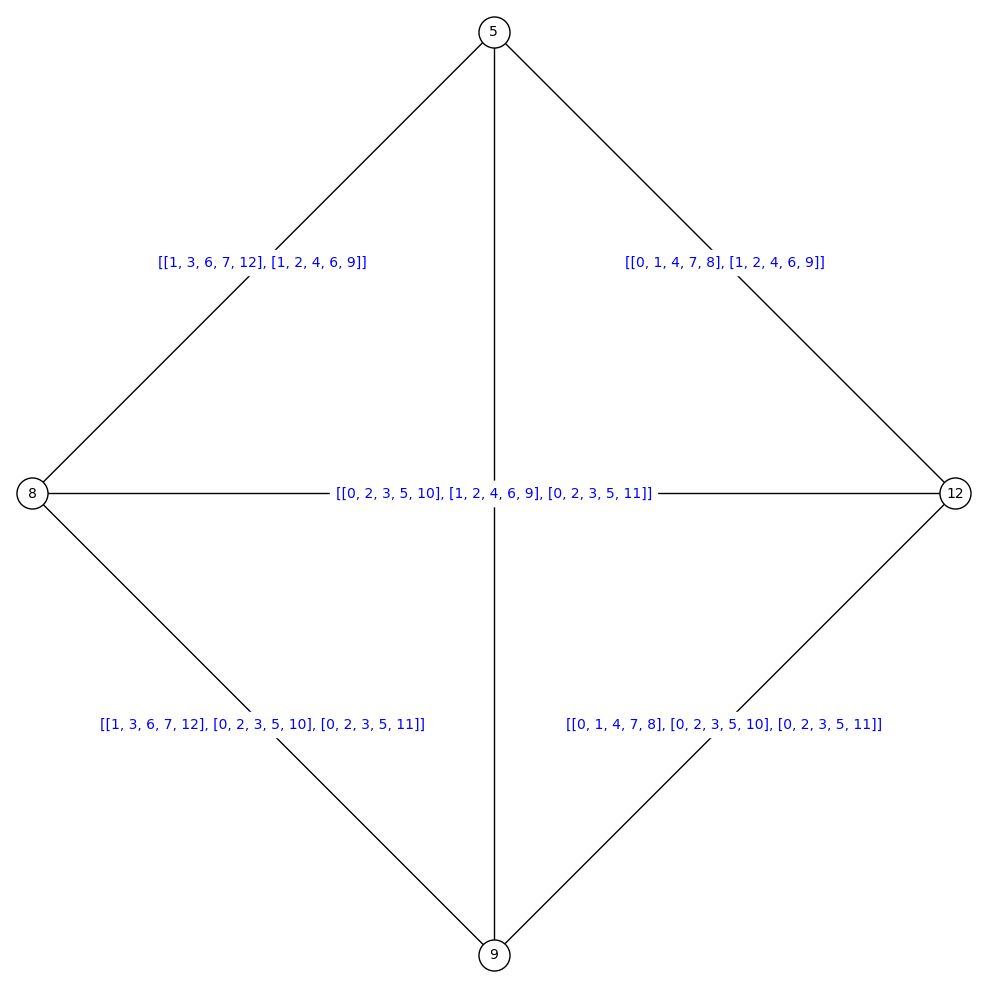

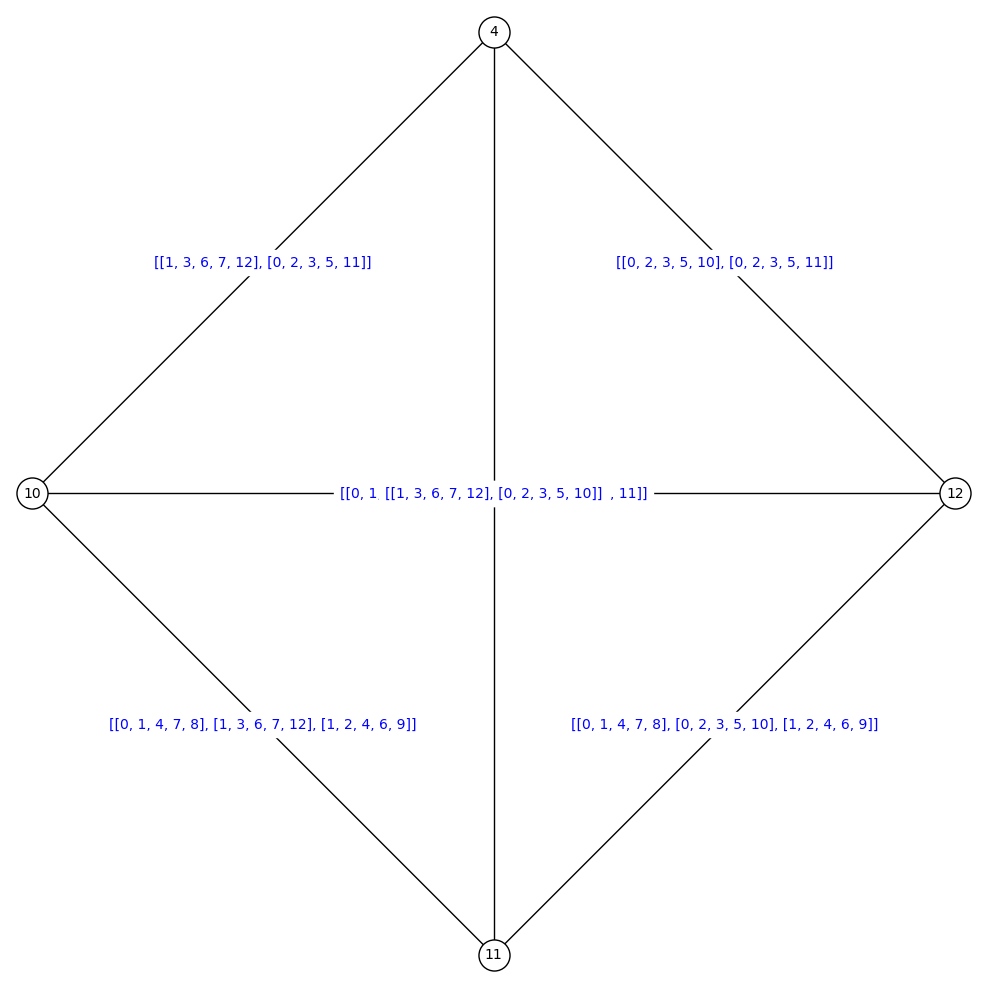

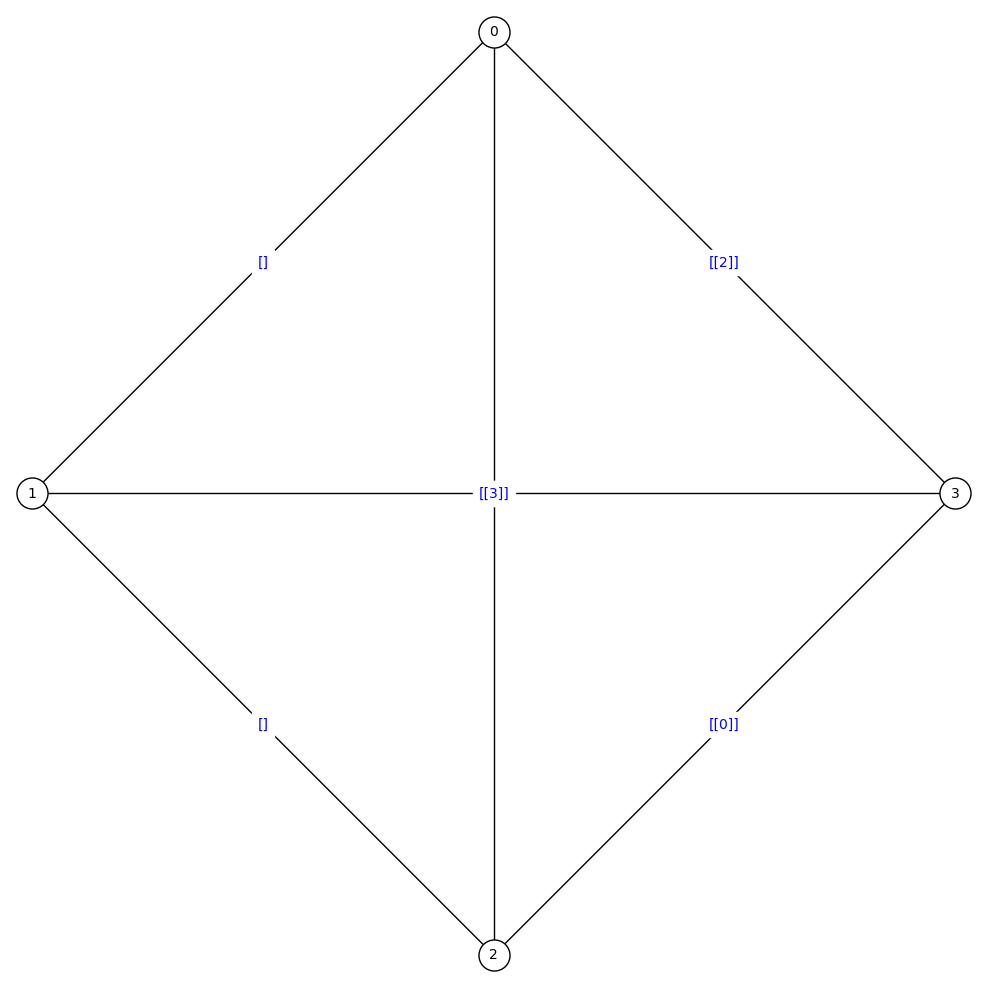

In [13]:
#need to fix k=1 case

C4=CompCollForts(G,4)

In [21]:
F=All_Forts(G)
C4


[[list(F[x]) for x in c] for c in C4]

#Fort_C4=[[list(x) for x in c] for c in C4 ]

total number of forts =  14


[[[1, 3, 4], [0, 2, 3, 4], [0, 1, 2, 3], [0, 1, 2, 4]],
 [[0, 3, 4], [1, 2, 3, 4], [0, 1, 2, 3], [0, 1, 2, 4]],
 [[0, 1, 2], [1, 2, 3, 4], [0, 2, 3, 4], [0, 1, 3, 4]],
 [[2, 3, 4], [0, 1, 2, 3], [0, 1, 2, 4], [0, 1, 3, 4]],
 [[1, 2], [3, 4], [0, 2], [0, 1]]]

total number of forts =  14
clique number =  6
[8, 9, 10, 11, 12]


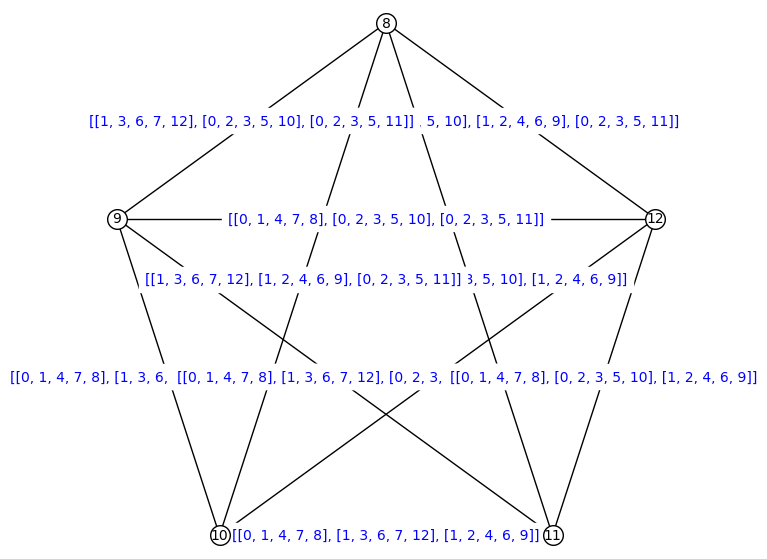

[4, 6, 7, 10, 11]


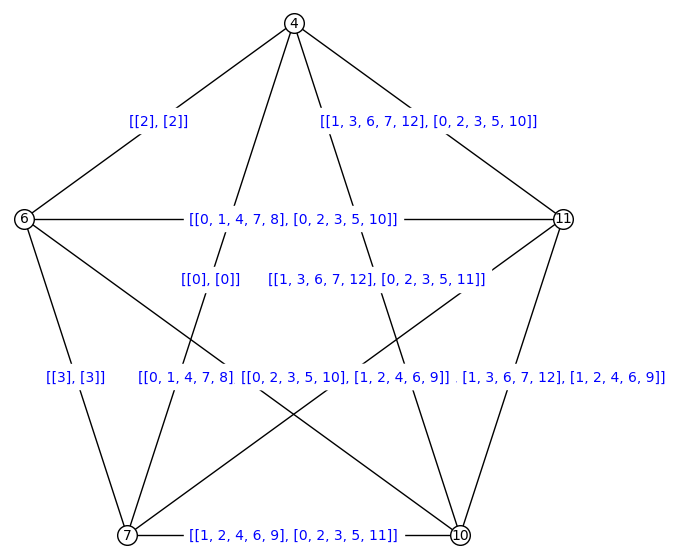

[2, 3, 4, 6, 7]


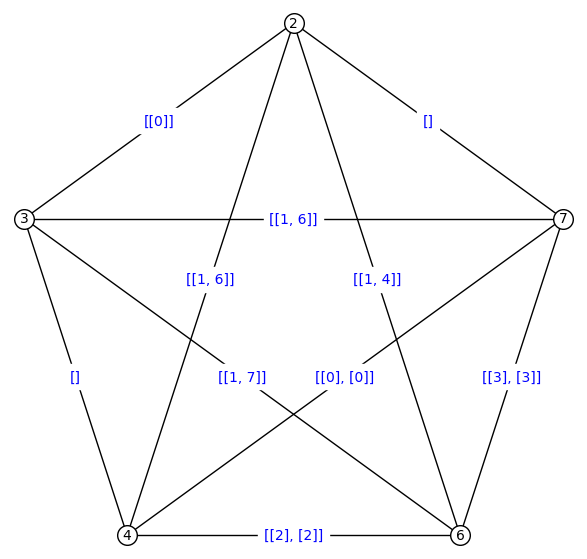

[0, 3, 4, 6, 7]


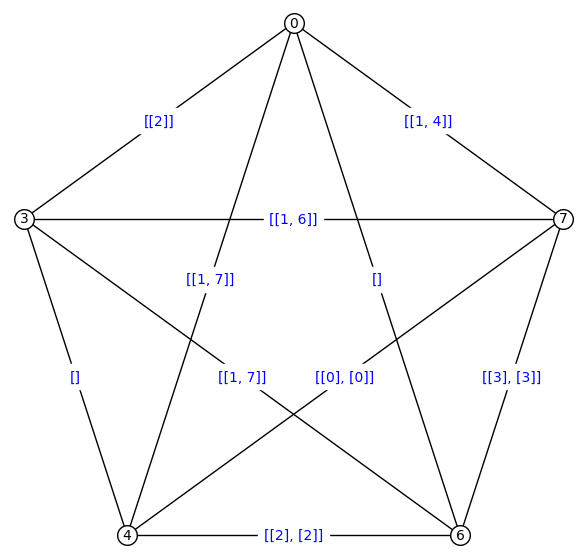

[0, 2, 4, 6, 7]


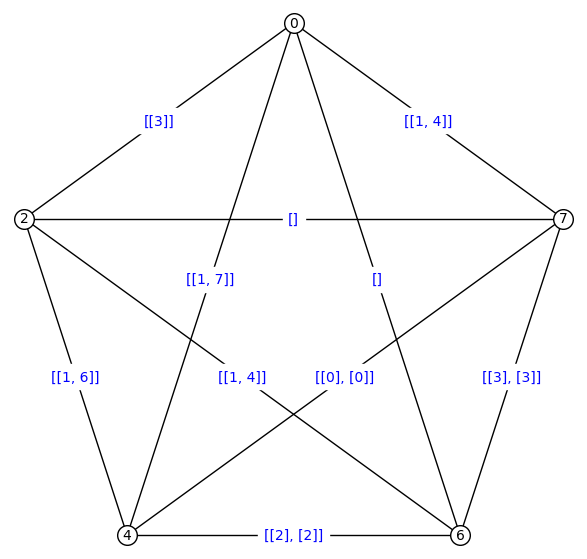

[0, 2, 3, 6, 7]


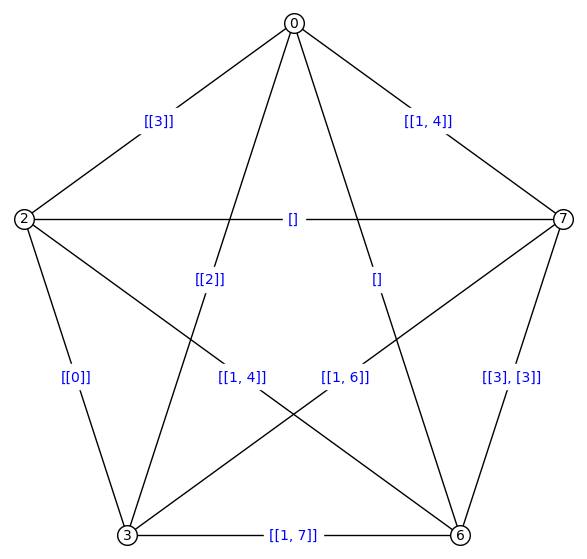

[0, 2, 3, 4, 7]


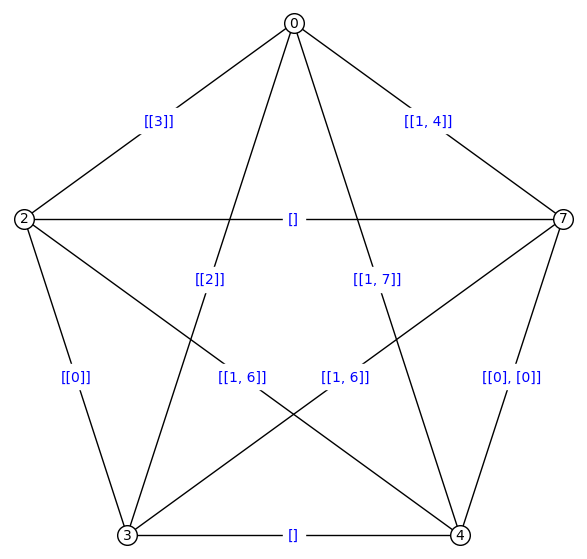

[0, 2, 3, 4, 6]


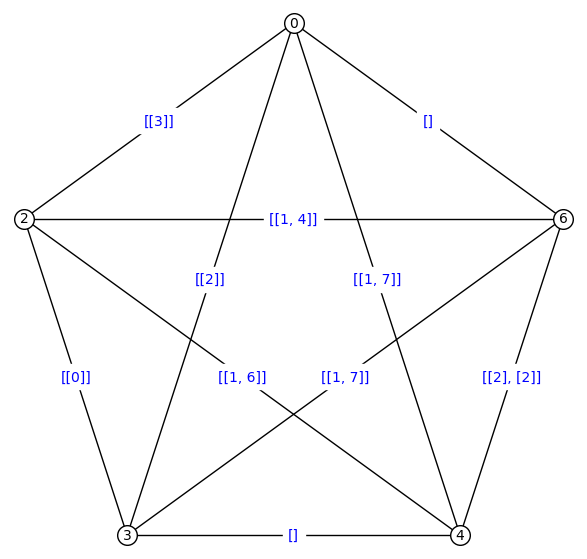

[[(8, 9, [[1, 3, 6, 7, 12], [0, 2, 3, 5, 10], [0, 2, 3, 5, 11]]),
  (8, 10, [[1, 3, 6, 7, 12], [1, 2, 4, 6, 9], [0, 2, 3, 5, 11]]),
  (8, 11, [[1, 3, 6, 7, 12], [0, 2, 3, 5, 10], [1, 2, 4, 6, 9]]),
  (8, 12, [[0, 2, 3, 5, 10], [1, 2, 4, 6, 9], [0, 2, 3, 5, 11]]),
  (9, 10, [[0, 1, 4, 7, 8], [1, 3, 6, 7, 12], [0, 2, 3, 5, 11]]),
  (9, 11, [[0, 1, 4, 7, 8], [1, 3, 6, 7, 12], [0, 2, 3, 5, 10]]),
  (9, 12, [[0, 1, 4, 7, 8], [0, 2, 3, 5, 10], [0, 2, 3, 5, 11]]),
  (10, 11, [[0, 1, 4, 7, 8], [1, 3, 6, 7, 12], [1, 2, 4, 6, 9]]),
  (10, 12, [[0, 1, 4, 7, 8], [1, 2, 4, 6, 9], [0, 2, 3, 5, 11]]),
  (11, 12, [[0, 1, 4, 7, 8], [0, 2, 3, 5, 10], [1, 2, 4, 6, 9]])],
 [(4, 6, [[2], [2]]),
  (4, 7, [[0], [0]]),
  (4, 10, [[1, 3, 6, 7, 12], [0, 2, 3, 5, 11]]),
  (4, 11, [[1, 3, 6, 7, 12], [0, 2, 3, 5, 10]]),
  (6, 7, [[3], [3]]),
  (6, 10, [[0, 1, 4, 7, 8], [0, 2, 3, 5, 11]]),
  (6, 11, [[0, 1, 4, 7, 8], [0, 2, 3, 5, 10]]),
  (7, 10, [[1, 2, 4, 6, 9], [0, 2, 3, 5, 11]]),
  (7, 11, [[0, 2, 3, 5, 10], [1

In [21]:
kCliquesFortGraph(G,5)

total number of forts =  14
clique number =  6


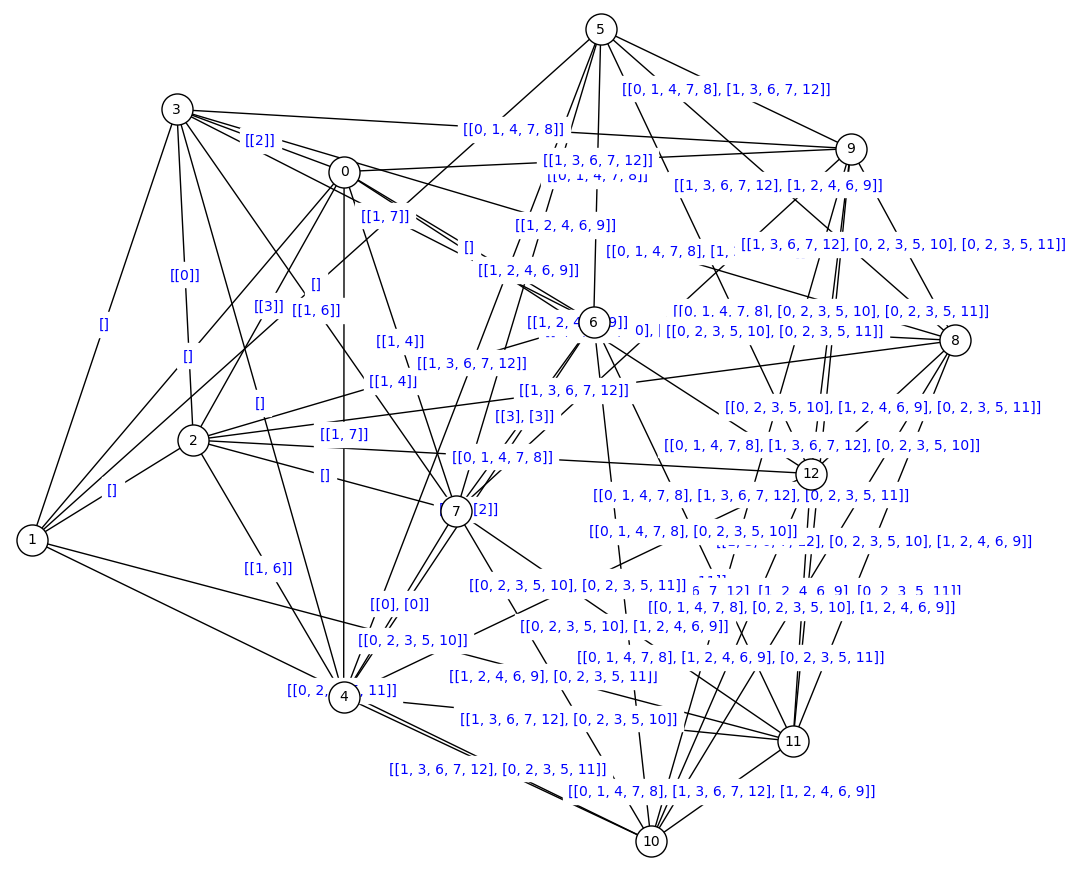

In [13]:
G=Graph('DFw')

Fort_RGraph(G).plot(vertex_color='white',vertex_size=500,edge_labels=True).show(figsize=(10,10))

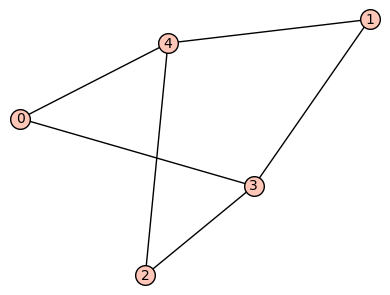

14
[[1, 2], [3, 4], [0, 2], [0, 1], [2, 3, 4], [0, 1, 2], [0, 3, 4], [1, 3, 4], [1, 2, 3, 4], [0, 2, 3, 4], [0, 1, 2, 3], [0, 1, 2, 4], [0, 1, 3, 4], [0, 1, 2, 3, 4]]


In [5]:
G=Graph('DFw')
G.show()
#print minrank_bounds(G)
print All_Forts(G)

In [6]:
F=[Set(f) for f in All_Forts(G)]
BP=BadPairs(F)

14


In [7]:
BP

[{1, 4}, {1, 4}, {1, 6}, {1, 6}, {1, 7}, {1, 7}]

In [8]:
BP=list(Set(BP))
l=len(F)
E=Subsets(range(l),2)
GP=list(set(E) - set(BP))
GPlist=[sorted(x) for x in GP]

In [9]:
GPtuple=[tuple(a) for a in GPlist]
FortGP=Graph(GPtuple)

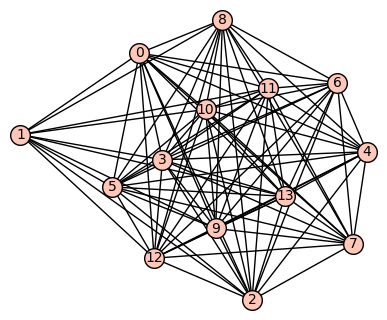

In [10]:
FortGP.show()

In [11]:
F[13]

{0, 1, 2, 3, 4}

In [12]:
len(GPlist)

88

In [13]:
GPlist_min=copy(GPlist)
lenGP=len(GP)
for i in range(lenGP):
    index0=GPlist[i][0]
    index1=GPlist[i][1]
    if (F[index0].issubset(F[index1]) or F[index1].issubset(F[index0])):
        #print index0,A1[index0],index1,A1[index1]
        GPlist_min.remove(GPlist[i])
        

In [14]:
print GPlist_min
print len(GPlist_min)

[[6, 7], [8, 9], [5, 12], [5, 9], [8, 11], [3, 4], [9, 12], [10, 12], [5, 8], [1, 3], [2, 7], [0, 7], [7, 10], [1, 11], [5, 6], [2, 8], [4, 7], [0, 9], [6, 10], [0, 2], [2, 12], [7, 11], [4, 6], [8, 10], [5, 7], [4, 10], [9, 11], [2, 3], [1, 5], [0, 1], [0, 12], [0, 4], [4, 12], [6, 11], [1, 10], [6, 8], [7, 9], [3, 7], [3, 6], [1, 2], [2, 6], [9, 10], [0, 6], [4, 11], [3, 9], [11, 12], [8, 12], [2, 4], [10, 11], [4, 5], [0, 3], [3, 8]]
52


In [15]:
GPmin_edges=[tuple(a) for a in GPlist_min]
FortGPmin=Graph(GPmin_edges)

In [16]:
#labels edeges with forts that complete the pair
for x in FortGPmin.edges():
    list_x=list(x)
    FortGPmin.set_edge_label(list_x[0],list_x[1],ExchangeUnionsIndices([F[list_x[0]],F[list_x[1]]],F))

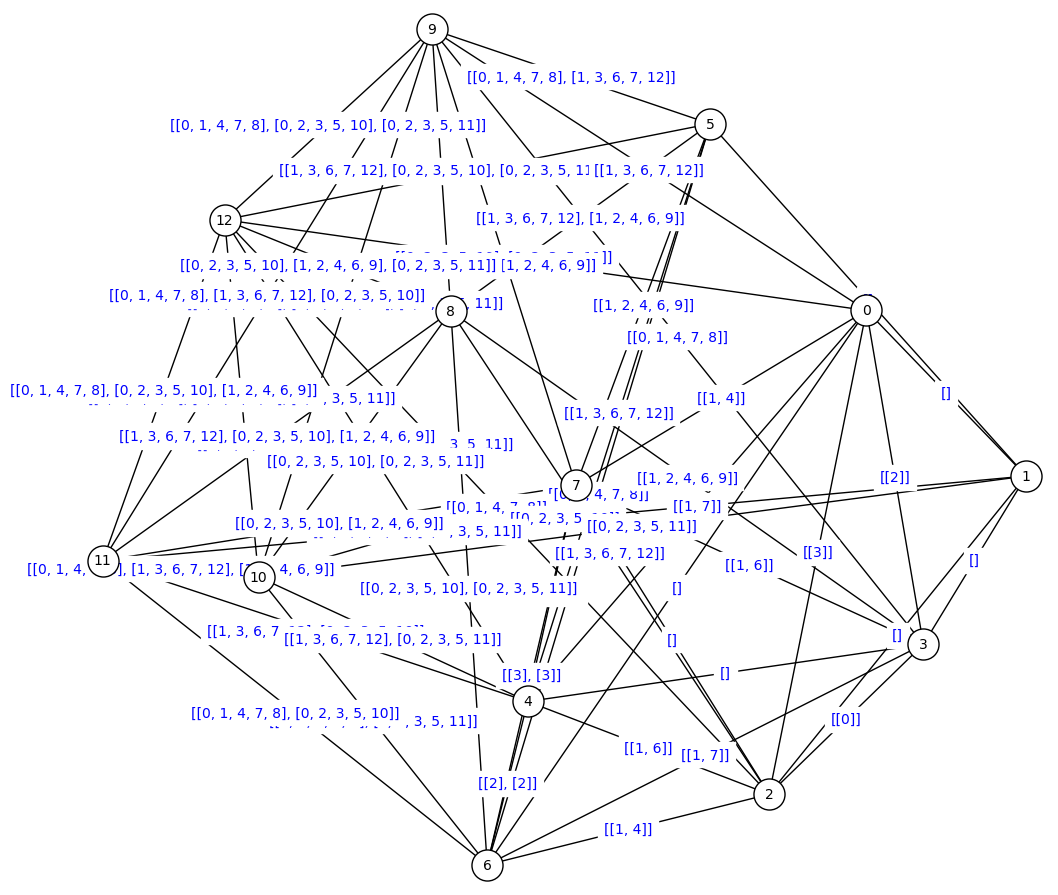

6

In [17]:
FortGPmin.plot(vertex_color='white',vertex_size=500,edge_labels=True).show(figsize=(10,10))
FortGPmin.clique_number()

[9, 10, 11, 12]


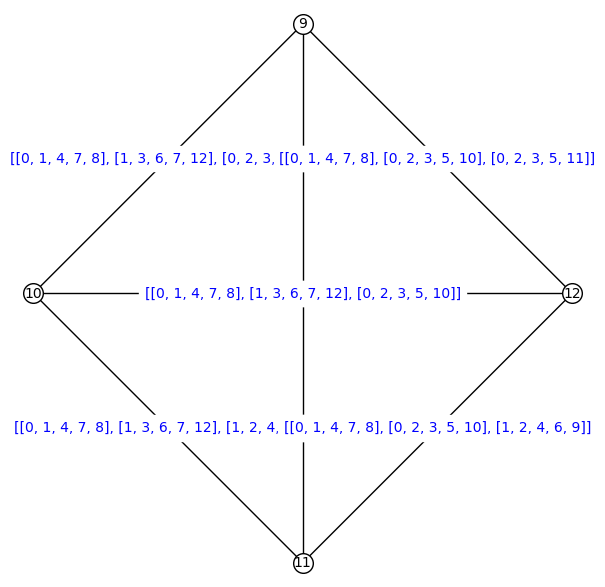

[8, 10, 11, 12]


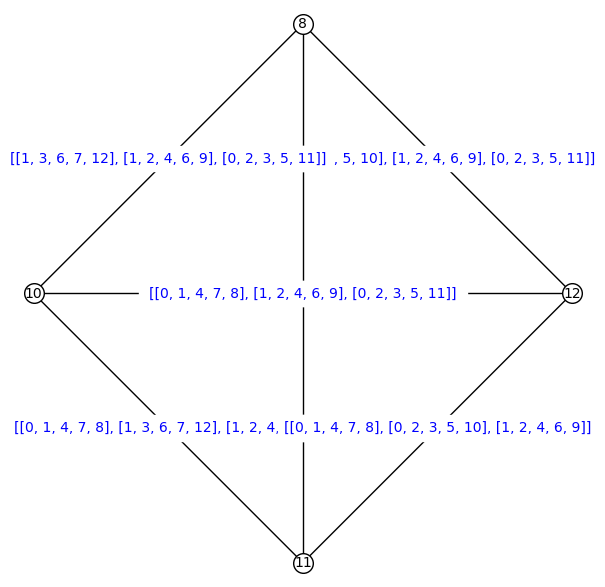

[8, 9, 11, 12]


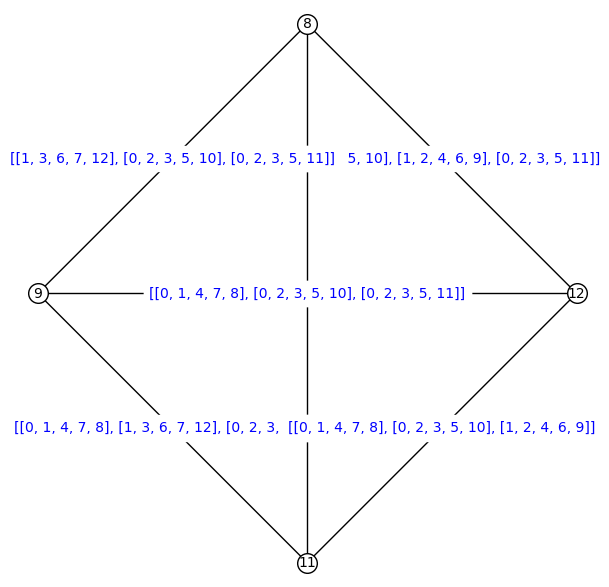

[8, 9, 10, 12]


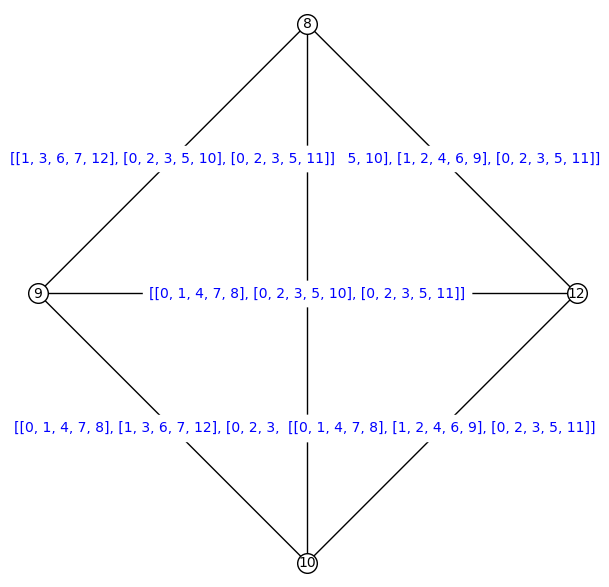

[8, 9, 10, 11]


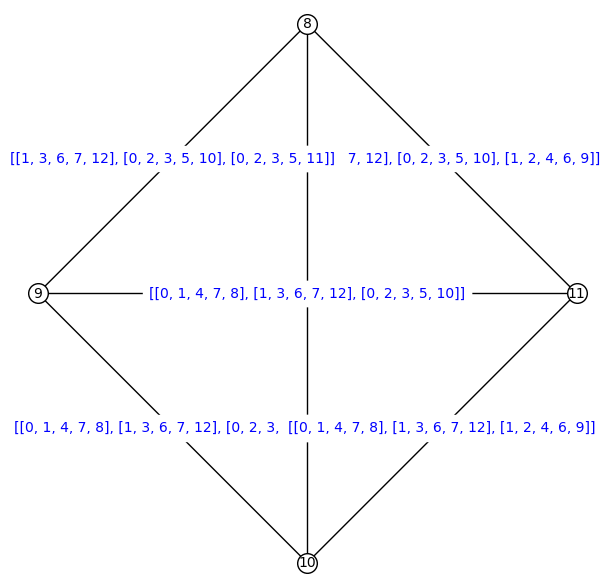

[7, 9, 10, 11]


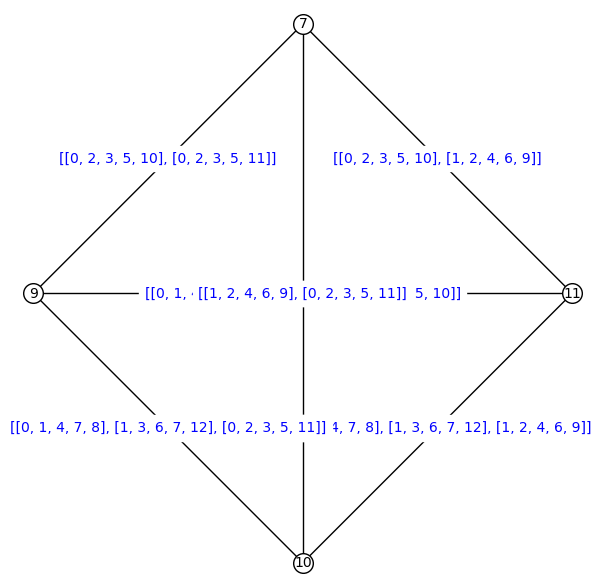

[6, 8, 10, 11]


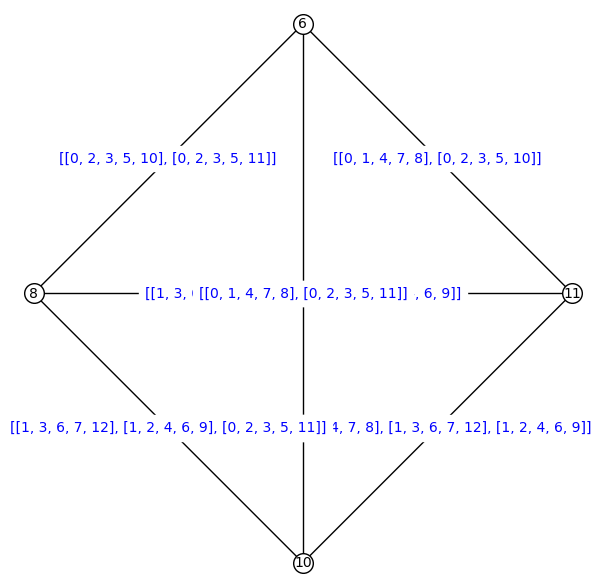

[6, 7, 10, 11]


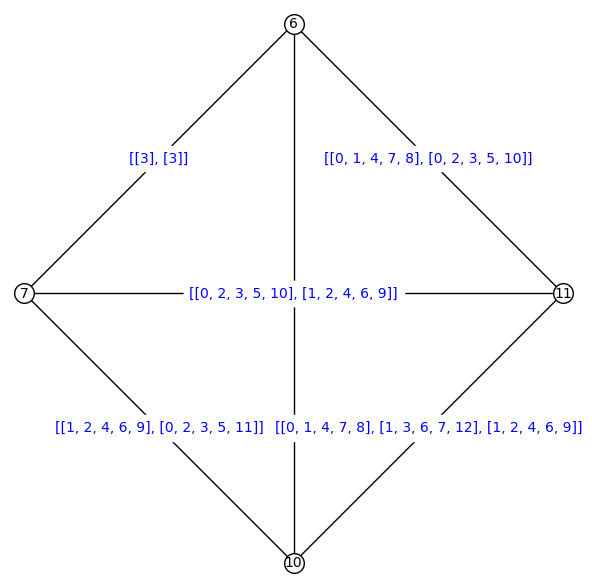

[5, 8, 9, 12]


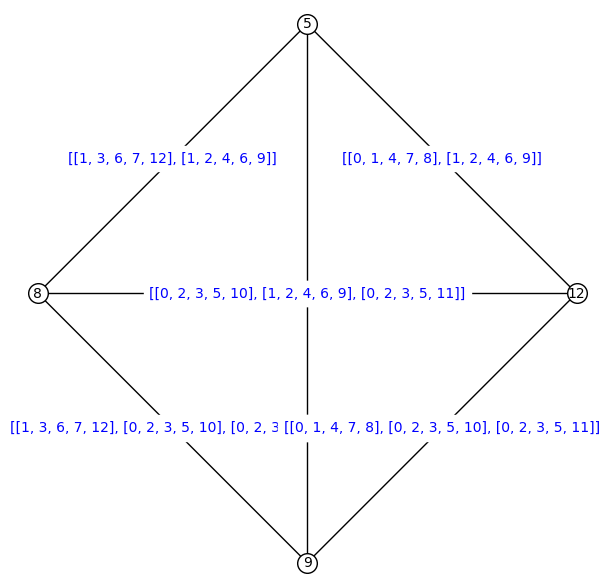

[4, 10, 11, 12]


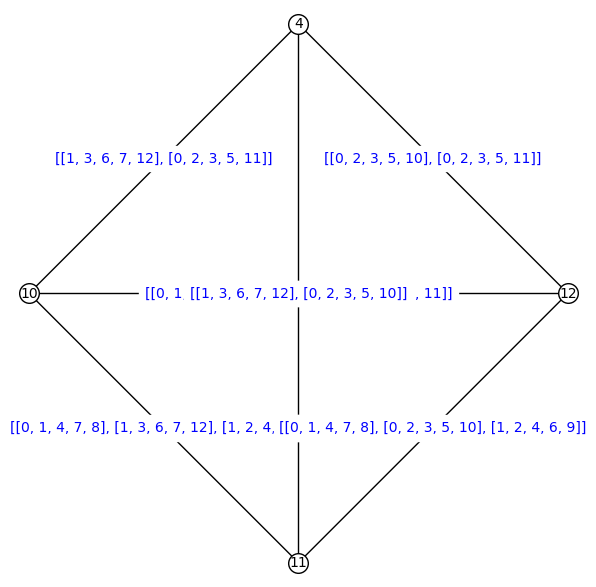

[4, 7, 10, 11]


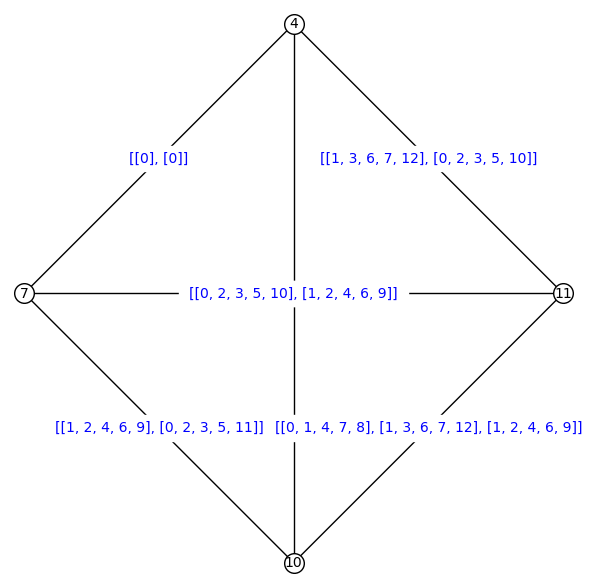

[4, 6, 10, 11]


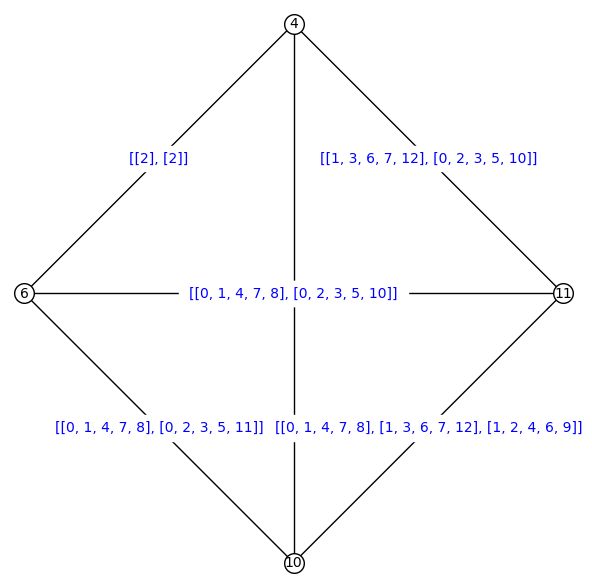

[4, 6, 7, 11]


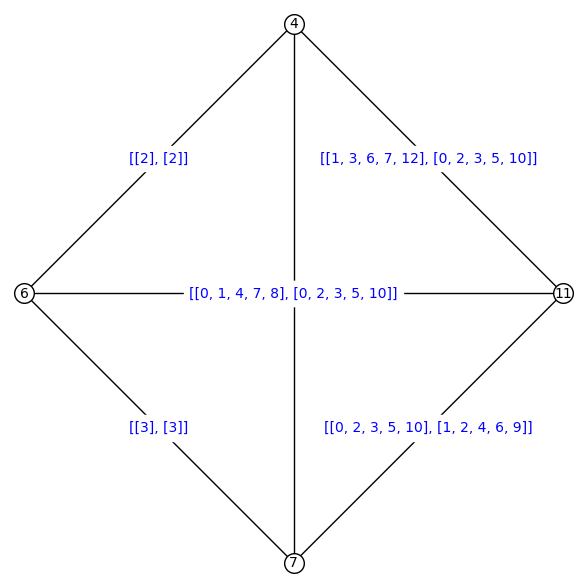

[4, 6, 7, 10]


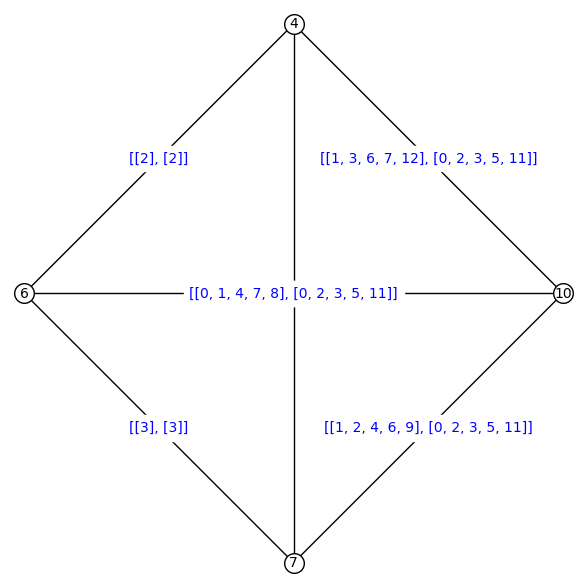

[4, 5, 6, 7]


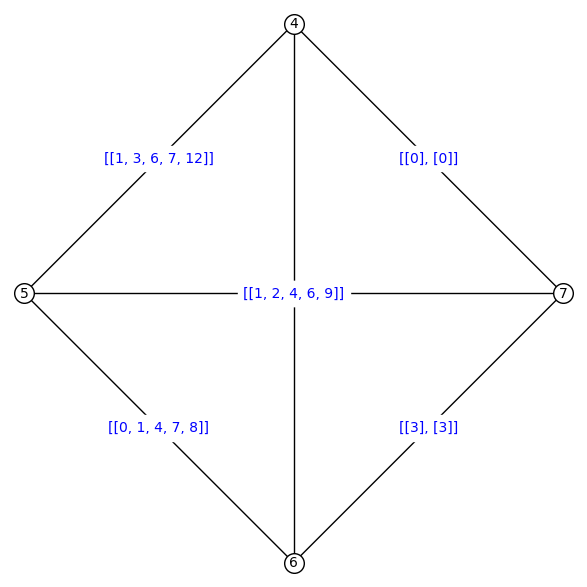

[3, 4, 6, 7]


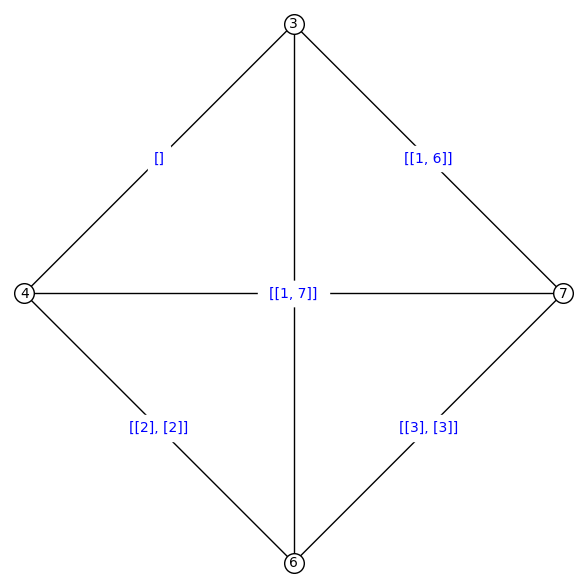

[2, 4, 6, 7]


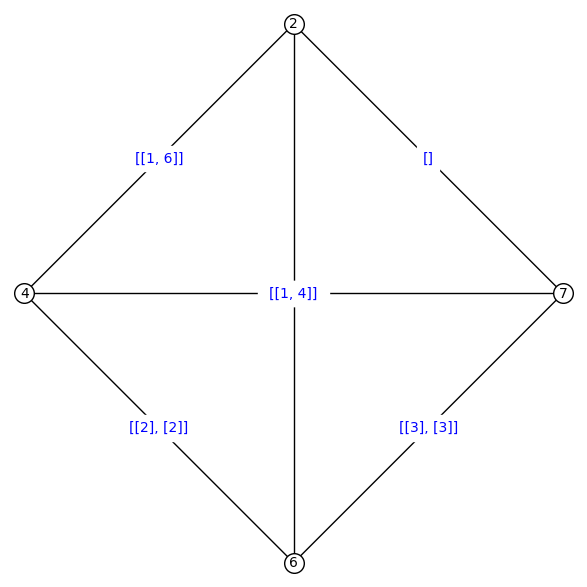

[2, 3, 6, 8]


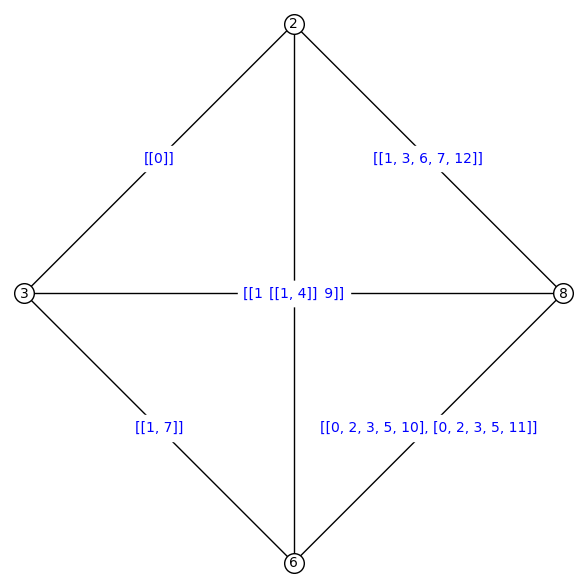

[2, 3, 6, 7]


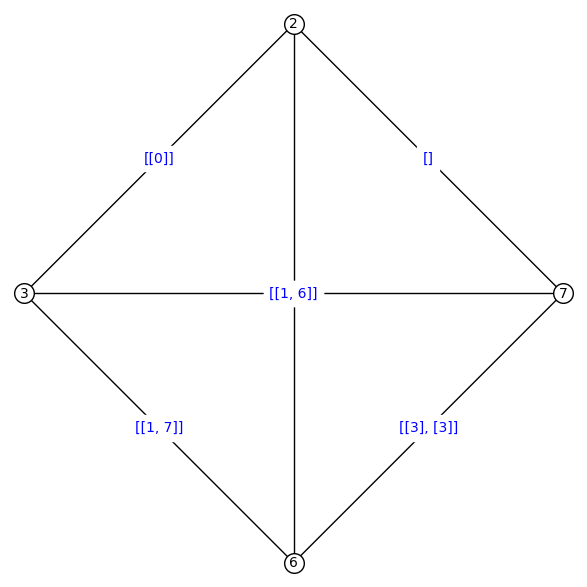

[2, 3, 4, 7]


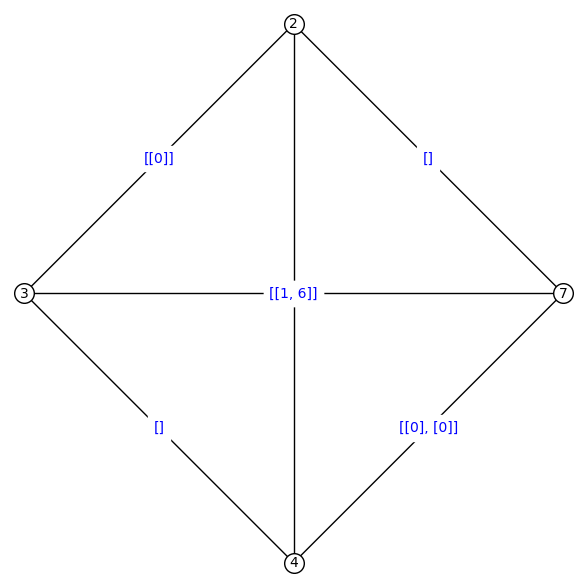

[2, 3, 4, 6]


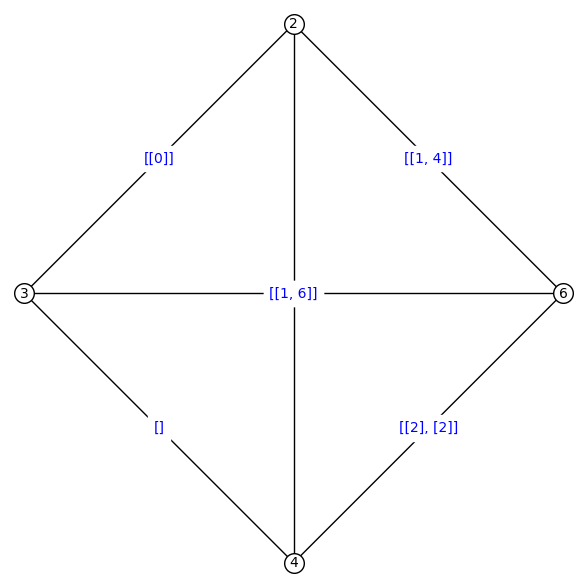

[0, 4, 6, 7]


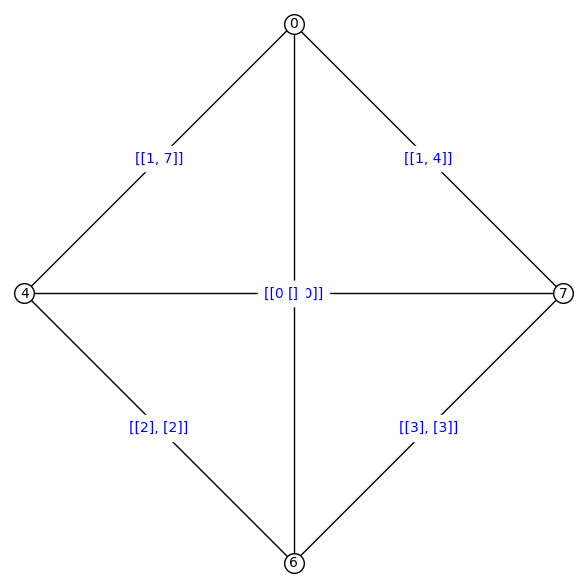

[0, 3, 7, 9]


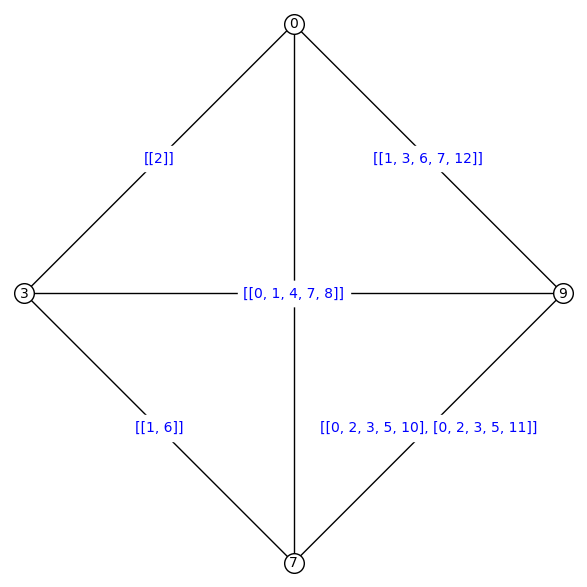

[0, 3, 6, 7]


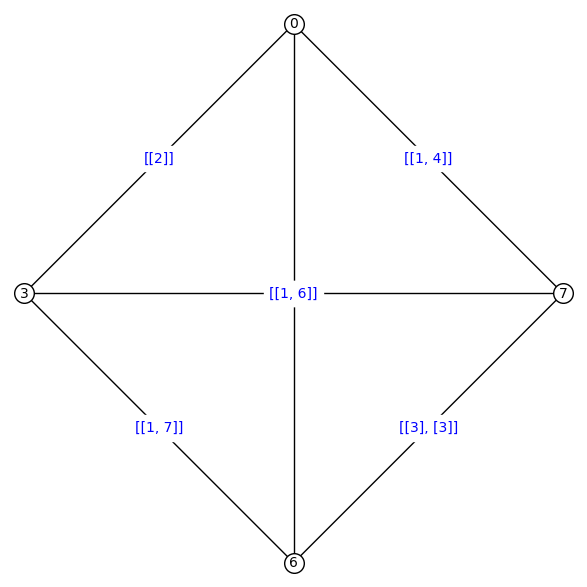

[0, 3, 4, 7]


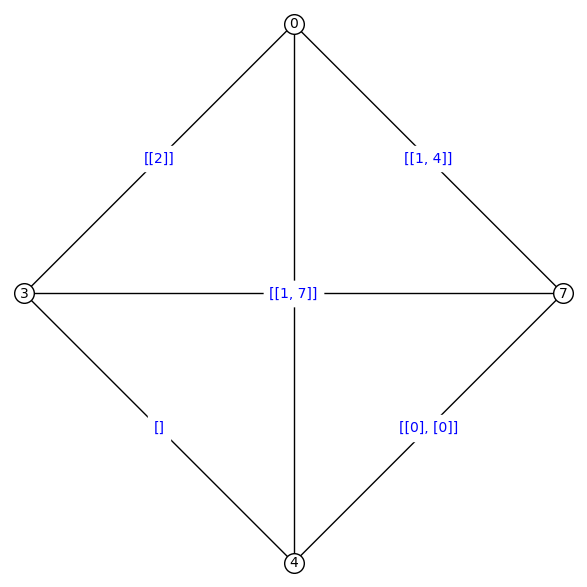

[0, 3, 4, 6]


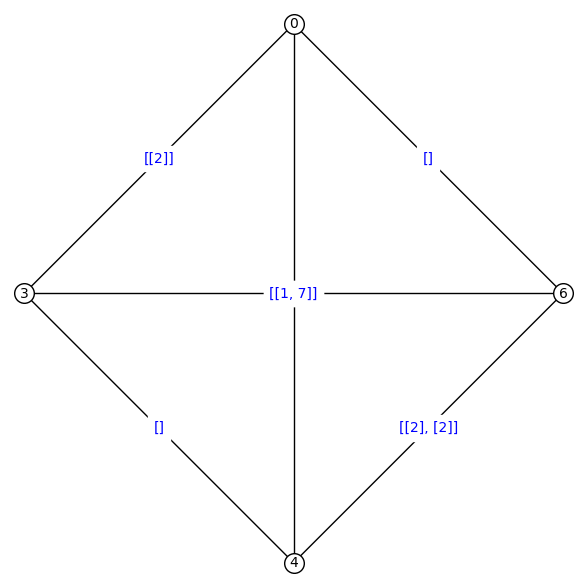

[0, 2, 6, 7]


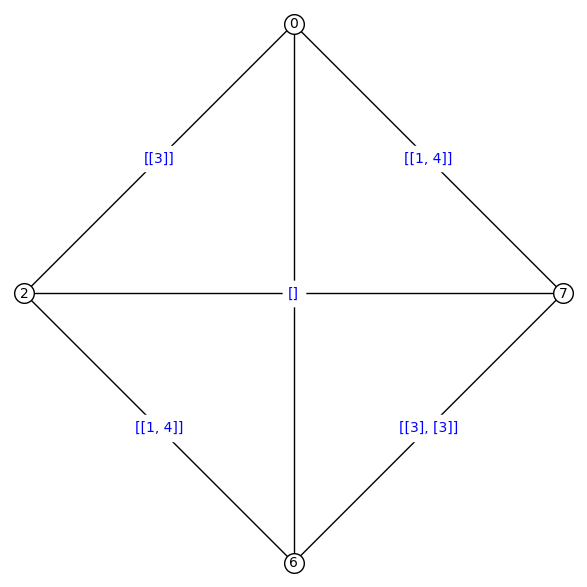

[0, 2, 4, 12]


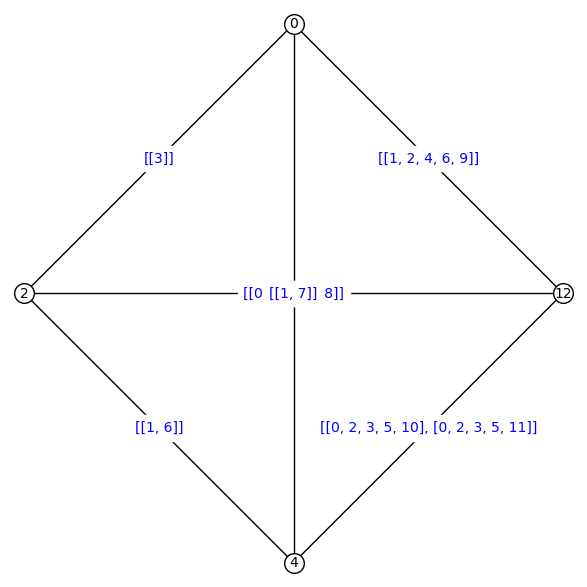

[0, 2, 4, 7]


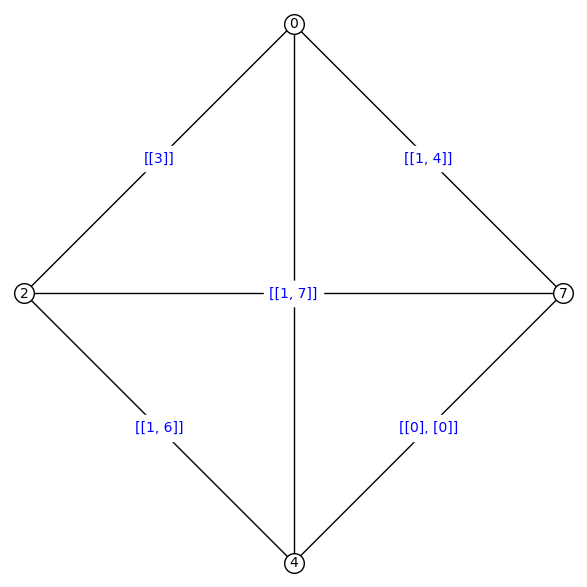

[0, 2, 4, 6]


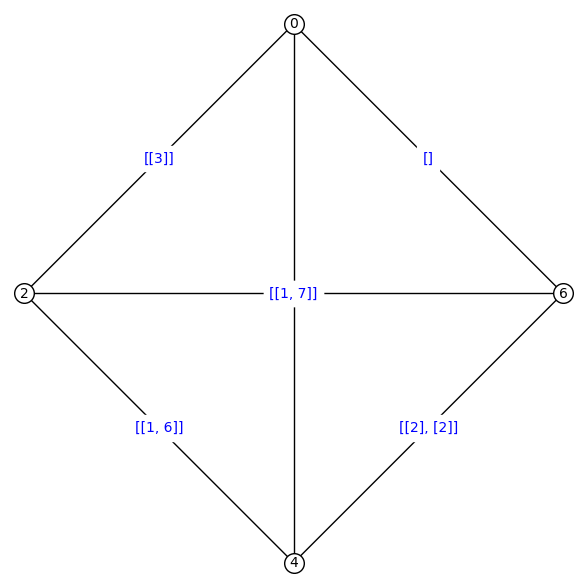

[0, 2, 3, 7]


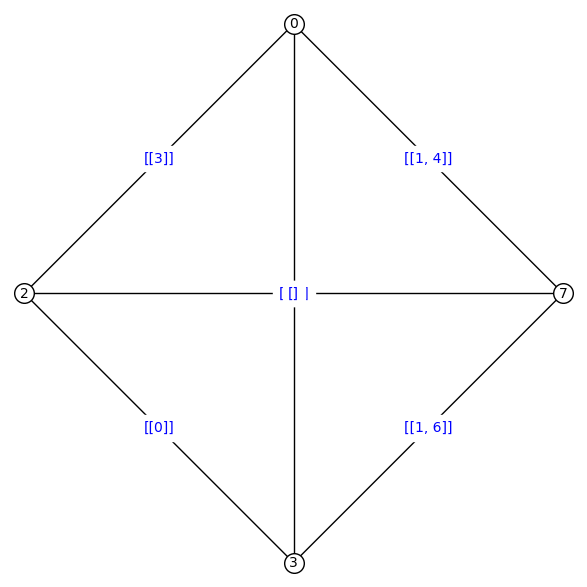

[0, 2, 3, 6]


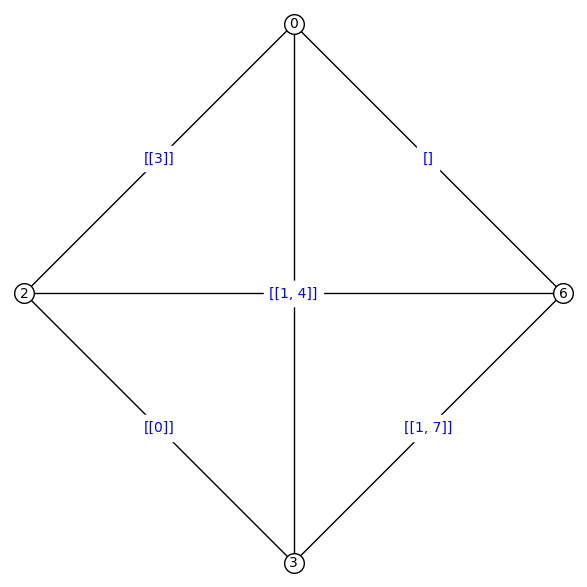

[0, 2, 3, 4]


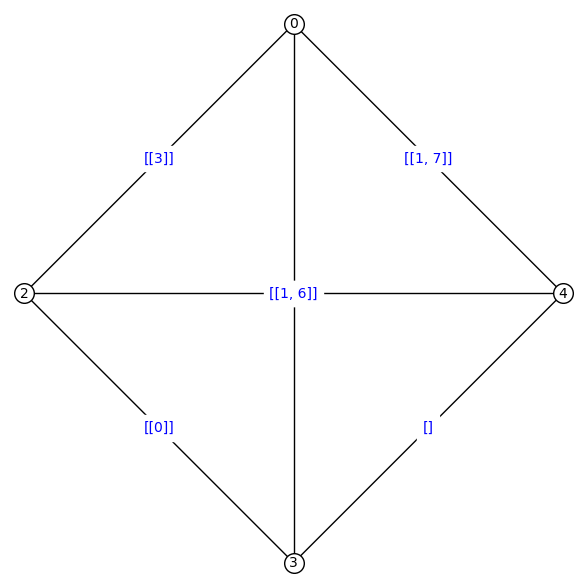

[0, 1, 2, 3]


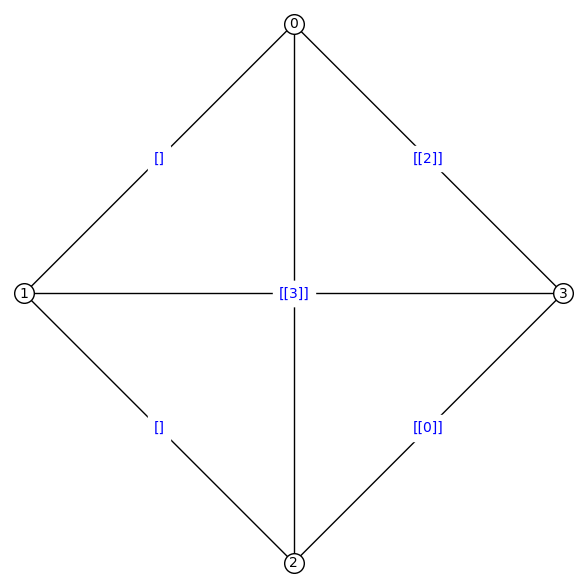

In [29]:
m=13
k=4
t=m-k
S=Subsets(range(m),t)
FortG=FortGPmin

FortG_clique4=[]

for s in S:
    s=list(s)
    h=copy(FortG)
    h.delete_vertices(s)
    g=graphs.CompleteGraph(k)
    if h.is_isomorphic(g):
        FortG_clique4.append(h.edges())
        print h.vertices()
        h.plot(vertex_color='white',edge_labels='True',layout='circular').show(figsize=(6,6))

In [30]:
for C in FortG_clique4:
    g=Graph(C)
    edges=g.edges()
    print c
    good_labels=[]
    for x in edges:
        edge_list=list(x)
        x0=edge_list[0]
        x1=edge_list[1]
        label=g.edge_label(x0,x1)
        print 'label', label
        if len(label)==0:
            good_labels.append(label)
        good_label=[]
        for l in label:
            if len(l)>0:
                if ( any( (x in g.vertices()) for x in l) ):
                    good_label.append(l)
                    print good_label
                else:
                    print l, 'BAD'
            if len(good_label)==len(label):
                good_labels.append(label)

    print 'gl', good_labels
    print len(good_labels)
    
    print '-----------------------------------------------------------'

[(8, 9, [[1, 3, 6, 7, 12], [0, 2, 3, 5, 10], [0, 2, 3, 5, 11]]), (8, 10, [[1, 3, 6, 7, 12], [1, 2, 4, 6, 9], [0, 2, 3, 5, 11]]), (8, 11, [[1, 3, 6, 7, 12], [0, 2, 3, 5, 10], [1, 2, 4, 6, 9]]), (8, 12, [[0, 2, 3, 5, 10], [1, 2, 4, 6, 9], [0, 2, 3, 5, 11]]), (9, 10, [[0, 1, 4, 7, 8], [1, 3, 6, 7, 12], [0, 2, 3, 5, 11]]), (9, 11, [[0, 1, 4, 7, 8], [1, 3, 6, 7, 12], [0, 2, 3, 5, 10]]), (9, 12, [[0, 1, 4, 7, 8], [0, 2, 3, 5, 10], [0, 2, 3, 5, 11]]), (10, 11, [[0, 1, 4, 7, 8], [1, 3, 6, 7, 12], [1, 2, 4, 6, 9]]), (10, 12, [[0, 1, 4, 7, 8], [1, 2, 4, 6, 9], [0, 2, 3, 5, 11]]), (11, 12, [[0, 1, 4, 7, 8], [0, 2, 3, 5, 10], [1, 2, 4, 6, 9]])]
label [[0, 1, 4, 7, 8], [1, 3, 6, 7, 12], [0, 2, 3, 5, 11]]
[0, 1, 4, 7, 8] BAD
[[1, 3, 6, 7, 12]]
[[1, 3, 6, 7, 12], [0, 2, 3, 5, 11]]
label [[0, 1, 4, 7, 8], [1, 3, 6, 7, 12], [0, 2, 3, 5, 10]]
[0, 1, 4, 7, 8] BAD
[[1, 3, 6, 7, 12]]
[[1, 3, 6, 7, 12], [0, 2, 3, 5, 10]]
label [[0, 1, 4, 7, 8], [0, 2, 3, 5, 10], [0, 2, 3, 5, 11]]
[0, 1, 4, 7, 8] BAD
[[0, 2,

-----------------------------------------------------------
[(8, 9, [[1, 3, 6, 7, 12], [0, 2, 3, 5, 10], [0, 2, 3, 5, 11]]), (8, 10, [[1, 3, 6, 7, 12], [1, 2, 4, 6, 9], [0, 2, 3, 5, 11]]), (8, 11, [[1, 3, 6, 7, 12], [0, 2, 3, 5, 10], [1, 2, 4, 6, 9]]), (8, 12, [[0, 2, 3, 5, 10], [1, 2, 4, 6, 9], [0, 2, 3, 5, 11]]), (9, 10, [[0, 1, 4, 7, 8], [1, 3, 6, 7, 12], [0, 2, 3, 5, 11]]), (9, 11, [[0, 1, 4, 7, 8], [1, 3, 6, 7, 12], [0, 2, 3, 5, 10]]), (9, 12, [[0, 1, 4, 7, 8], [0, 2, 3, 5, 10], [0, 2, 3, 5, 11]]), (10, 11, [[0, 1, 4, 7, 8], [1, 3, 6, 7, 12], [1, 2, 4, 6, 9]]), (10, 12, [[0, 1, 4, 7, 8], [1, 2, 4, 6, 9], [0, 2, 3, 5, 11]]), (11, 12, [[0, 1, 4, 7, 8], [0, 2, 3, 5, 10], [1, 2, 4, 6, 9]])]
label [[3]]
[[3]]
label [[2]]
[[2]]
label [[1, 4]]
[1, 4] BAD
label [[0]]
[[0]]
label []
label [[1, 6]]
[1, 6] BAD
gl [[[3]], [[2]], [[0]], []]
4
-----------------------------------------------------------
[(8, 9, [[1, 3, 6, 7, 12], [0, 2, 3, 5, 10], [0, 2, 3, 5, 11]]), (8, 10, [[1, 3, 6, 7, 12], [

[8, 9, 10, 11, 12]


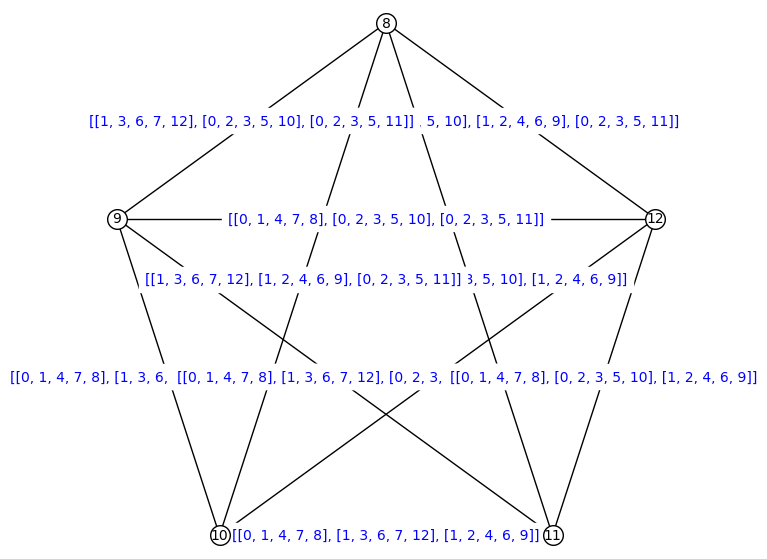

[4, 6, 7, 10, 11]


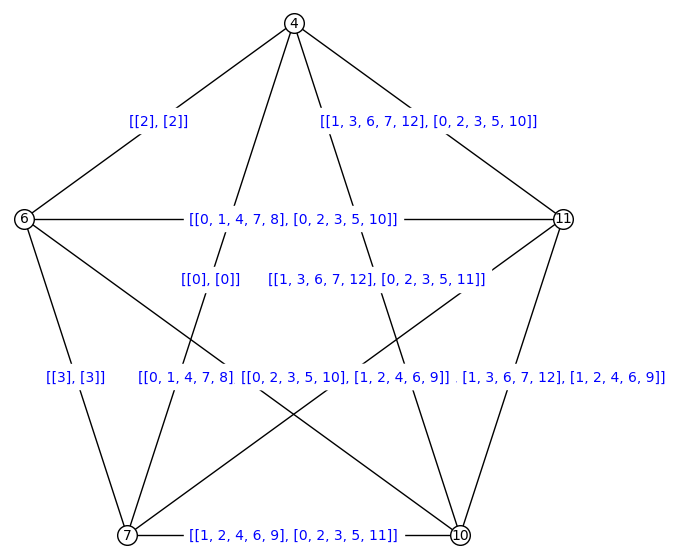

[2, 3, 4, 6, 7]


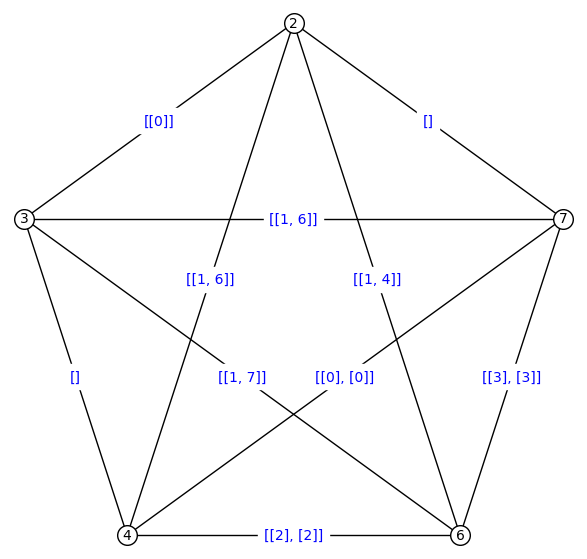

[0, 3, 4, 6, 7]


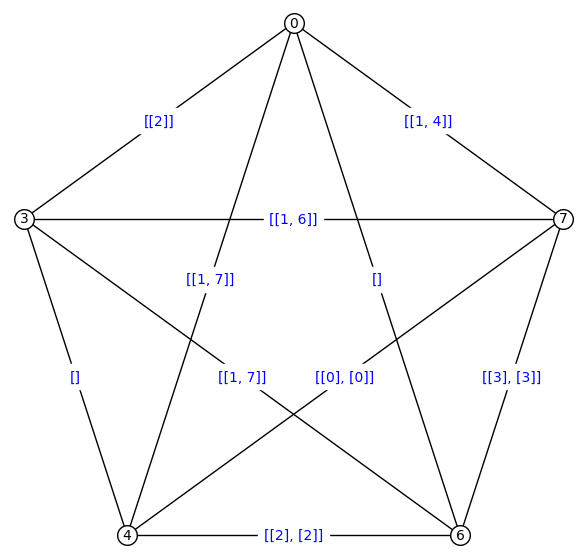

[0, 2, 4, 6, 7]


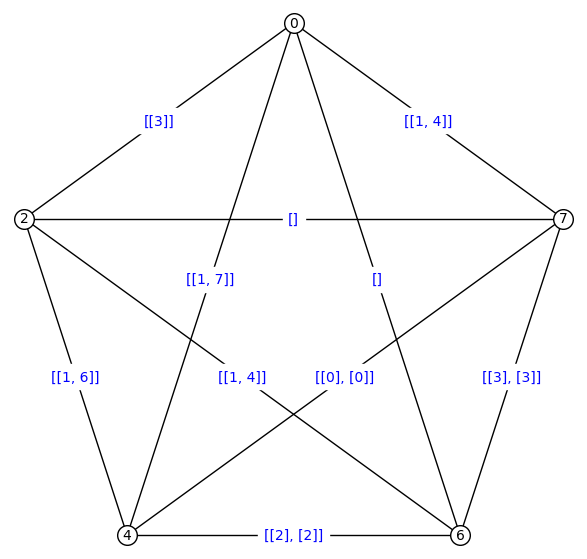

[0, 2, 3, 6, 7]


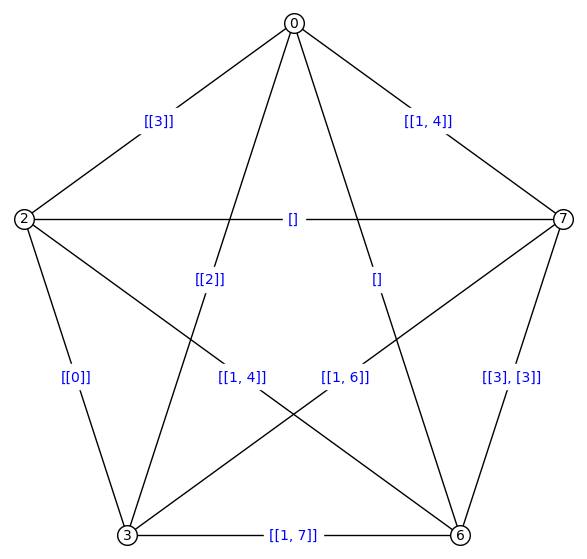

[0, 2, 3, 4, 7]


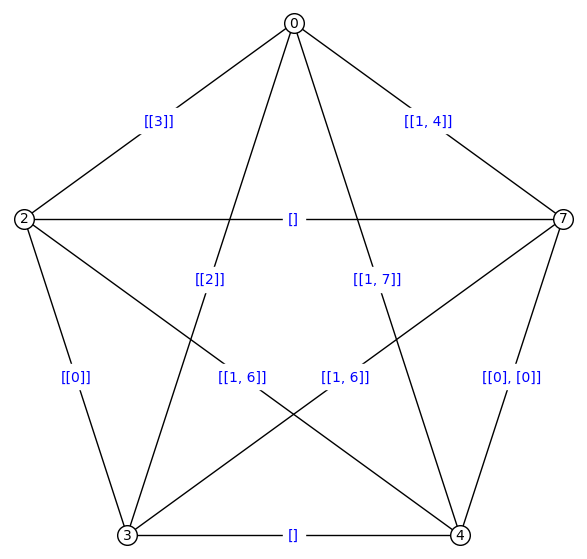

[0, 2, 3, 4, 6]


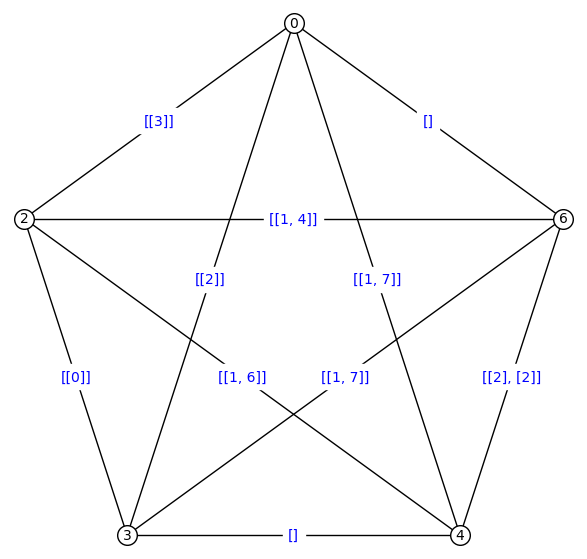

In [22]:
m=13
k=5
t=m-k
S=Subsets(range(m),t)
FortG=FortGPmin

FortG_clique5=[]

for s in S:
    s=list(s)
    h=copy(FortG)
    h.delete_vertices(s)
    g=graphs.CompleteGraph(k)
    if h.is_isomorphic(g):
        FortG_clique5.append(h.edges())
        print h.vertices()
        h.plot(vertex_color='white',edge_labels='True',layout='circular').show(figsize=(6,6))

In [28]:
for C in FortG_clique5:
    g=Graph(C)
    edges=g.edges()
    print c
    good_labels=[]
    for x in edges:
        edge_list=list(x)
        x0=edge_list[0]
        x1=edge_list[1]
        label=g.edge_label(x0,x1)
        print 'label', label
        if len(label)==0:
            good_labels.append(label)
        good_label=[]
        for l in label:
            if len(l)>0:
                if ( any( (x in g.vertices()) for x in l) ):
                    good_label.append(l)
                    print good_label
                else:
                    print l, 'BAD'
            if len(good_label)==len(label):
                good_labels.append(label)

    print 'gl', good_labels
    print len(good_labels)
    
    print '-----------------------------------------------------------'

[(8, 9, [[1, 3, 6, 7, 12], [0, 2, 3, 5, 10], [0, 2, 3, 5, 11]]), (8, 10, [[1, 3, 6, 7, 12], [1, 2, 4, 6, 9], [0, 2, 3, 5, 11]]), (8, 11, [[1, 3, 6, 7, 12], [0, 2, 3, 5, 10], [1, 2, 4, 6, 9]]), (8, 12, [[0, 2, 3, 5, 10], [1, 2, 4, 6, 9], [0, 2, 3, 5, 11]]), (9, 10, [[0, 1, 4, 7, 8], [1, 3, 6, 7, 12], [0, 2, 3, 5, 11]]), (9, 11, [[0, 1, 4, 7, 8], [1, 3, 6, 7, 12], [0, 2, 3, 5, 10]]), (9, 12, [[0, 1, 4, 7, 8], [0, 2, 3, 5, 10], [0, 2, 3, 5, 11]]), (10, 11, [[0, 1, 4, 7, 8], [1, 3, 6, 7, 12], [1, 2, 4, 6, 9]]), (10, 12, [[0, 1, 4, 7, 8], [1, 2, 4, 6, 9], [0, 2, 3, 5, 11]]), (11, 12, [[0, 1, 4, 7, 8], [0, 2, 3, 5, 10], [1, 2, 4, 6, 9]])]
label [[1, 3, 6, 7, 12], [0, 2, 3, 5, 10], [0, 2, 3, 5, 11]]
[[1, 3, 6, 7, 12]]
[[1, 3, 6, 7, 12], [0, 2, 3, 5, 10]]
[[1, 3, 6, 7, 12], [0, 2, 3, 5, 10], [0, 2, 3, 5, 11]]
label [[1, 3, 6, 7, 12], [1, 2, 4, 6, 9], [0, 2, 3, 5, 11]]
[[1, 3, 6, 7, 12]]
[[1, 3, 6, 7, 12], [1, 2, 4, 6, 9]]
[[1, 3, 6, 7, 12], [1, 2, 4, 6, 9], [0, 2, 3, 5, 11]]
label [[1, 3, 6, 7

label [[0]]
[[0]]
label [[1, 6]]
[[1, 6]]
label [[1, 4]]
[[1, 4]]
label []
label [[1, 7]]
[1, 7] BAD
label [[2], [2]]
[[2]]
[[2], [2]]
gl [[[3]], [[2]], [], [[0]], [[1, 6]], [[1, 4]], [], [[2], [2]]]
8
-----------------------------------------------------------


[0, 2, 3, 4, 6, 7]


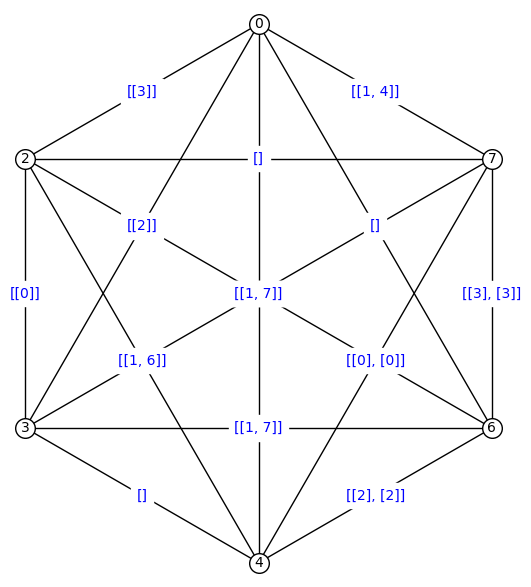

In [18]:
#this is a compatible collection of 6 forts for K_2,3

m=13
k=6
t=m-k
S=Subsets(range(m),t)
FortG=FortGPmin
FortG_clique6=[]

for s in S:
    s=list(s)
    h=copy(FortG)
    h.delete_vertices(s)
    g=graphs.CompleteGraph(k)
    if h.is_isomorphic(g):
        FortG_clique6.append(h.edges())
        print h.vertices()
        h.plot(vertex_color='white',edge_labels='True',layout='circular').show(figsize=(6,6))

In [21]:
C=FortG_clique6[0]
g=Graph(C)
edges=g.edges()

good_labels=[]
for x in edges:
    edge_list=list(x)
    x0=edge_list[0]
    x1=edge_list[1]
    label=g.edge_label(x0,x1)
    print 'label', label
    if len(label)==0:
        good_labels.append(label)
    good_label=[]
    for l in label:
        if len(l)>0:
            if ( any( (x in g.vertices()) for x in l) ):
                good_label.append(l)
                print good_label
        if len(good_label)==len(label):
            good_labels.append(label)
        
print 'gl', good_labels
print len(good_labels)

label [[3]]
[[3]]
label [[2]]
[[2]]
label [[1, 7]]
[[1, 7]]
label []
label [[1, 4]]
[[1, 4]]
label [[0]]
[[0]]
label [[1, 6]]
[[1, 6]]
label [[1, 4]]
[[1, 4]]
label []
label []
label [[1, 7]]
[[1, 7]]
label [[1, 6]]
[[1, 6]]
label [[2], [2]]
[[2]]
[[2], [2]]
label [[0], [0]]
[[0]]
[[0], [0]]
label [[3], [3]]
[[3]]
[[3], [3]]
gl [[[3]], [[2]], [[1, 7]], [], [[1, 4]], [[0]], [[1, 6]], [[1, 4]], [], [], [[1, 7]], [[1, 6]], [[2], [2]], [[0], [0]], [[3], [3]]]
15


In [25]:
v6=[0, 2, 3, 4, 6, 7]
Fort_v6=[list(F[i]) for i in v6]

In [30]:
Fort_v6=[''.join(str(x) for x in f) for f in Fort_v6]

In [33]:
Fort_v6=['12', '02', '01', '234', '034', '134']

In [41]:
M=Matroid(groundset='01234',circuits=Fort_v6)
print M.is_valid()
B=[sorted(b) for b in M.bases()]
print B
M.rank()

True
[['0', '3'], ['1', '3'], ['2', '3'], ['0', '4'], ['1', '4'], ['2', '4'], ['3', '4']]


2

In [72]:
F[4]

{2, 3, 4}

In [73]:
F

[{1, 2},
 {3, 4},
 {0, 2},
 {0, 1},
 {2, 3, 4},
 {0, 1, 2},
 {0, 3, 4},
 {1, 3, 4},
 {1, 2, 3, 4},
 {0, 2, 3, 4},
 {0, 1, 2, 3},
 {0, 1, 2, 4},
 {0, 1, 3, 4},
 {0, 1, 2, 3, 4}]

In [38]:
print F[0], F[1], F[2]

{1, 2} {3, 4} {0, 2}


In [22]:
for x in FortGPmin.edges():
    list_x=list(x)
    FortGPmin.set_edge_label(list_x[0],list_x[1],ExchangeUnionsIndices([F[list_x[0]],F[list_x[1]]],F))

In [34]:
print FortGPmin.edges()

[(0, 1, []), (0, 2, [[3]]), (0, 3, [[2]]), (0, 4, [[1, 7]]), (0, 6, []), (0, 7, [[1, 4]]), (0, 9, [[1, 3, 6, 7, 12]]), (0, 12, [[1, 2, 4, 6, 9]]), (1, 2, []), (1, 3, []), (1, 5, []), (1, 10, [[0, 2, 3, 5, 11]]), (1, 11, [[0, 2, 3, 5, 10]]), (2, 3, [[0]]), (2, 4, [[1, 6]]), (2, 6, [[1, 4]]), (2, 7, []), (2, 8, [[1, 3, 6, 7, 12]]), (2, 12, [[0, 1, 4, 7, 8]]), (3, 4, []), (3, 6, [[1, 7]]), (3, 7, [[1, 6]]), (3, 8, [[1, 2, 4, 6, 9]]), (3, 9, [[0, 1, 4, 7, 8]]), (4, 5, [[1, 3, 6, 7, 12]]), (4, 6, [[2], [2]]), (4, 7, [[0], [0]]), (4, 10, [[1, 3, 6, 7, 12], [0, 2, 3, 5, 11]]), (4, 11, [[1, 3, 6, 7, 12], [0, 2, 3, 5, 10]]), (4, 12, [[0, 2, 3, 5, 10], [0, 2, 3, 5, 11]]), (5, 6, [[0, 1, 4, 7, 8]]), (5, 7, [[1, 2, 4, 6, 9]]), (5, 8, [[1, 3, 6, 7, 12], [1, 2, 4, 6, 9]]), (5, 9, [[0, 1, 4, 7, 8], [1, 3, 6, 7, 12]]), (5, 12, [[0, 1, 4, 7, 8], [1, 2, 4, 6, 9]]), (6, 7, [[3], [3]]), (6, 8, [[0, 2, 3, 5, 10], [0, 2, 3, 5, 11]]), (6, 10, [[0, 1, 4, 7, 8], [0, 2, 3, 5, 11]]), (6, 11, [[0, 1, 4, 7, 8], [0

D?{


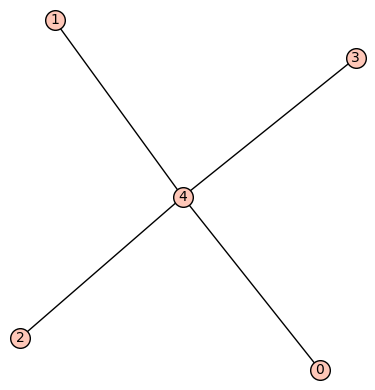

12
[[1, 2], [2, 3], [0, 2], [0, 1], [1, 3], [0, 3], [0, 2, 3], [0, 1, 2], [0, 1, 3], [1, 2, 3], [0, 1, 2, 3], [0, 1, 2, 3, 4]]
(2, 2)
DCw


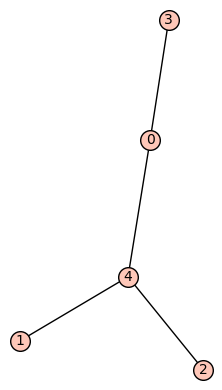

6
[[1, 2], [0, 2, 3], [0, 1, 3], [1, 2, 3, 4], [0, 1, 2, 3], [0, 1, 2, 3, 4]]
(3, 3)
DC{


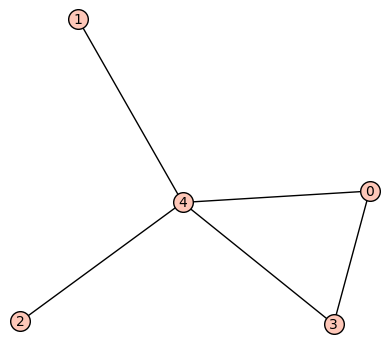

8
[[1, 2], [0, 3], [0, 2, 3], [0, 1, 3], [1, 2, 3, 4], [0, 1, 2, 3], [0, 1, 2, 4], [0, 1, 2, 3, 4]]
(3, 3)
DEw


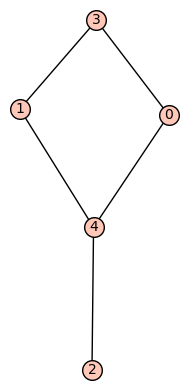

9
[[0, 1], [2, 3, 4], [0, 1, 2], [0, 1, 3], [1, 2, 3, 4], [0, 2, 3, 4], [0, 1, 2, 3], [0, 1, 2, 4], [0, 1, 2, 3, 4]]
(3, 3)
DEk


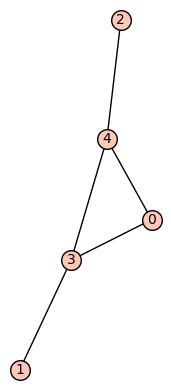

7
[[0, 2, 4], [0, 1, 2], [0, 1, 3], [1, 2, 3, 4], [0, 1, 2, 3], [0, 1, 2, 4], [0, 1, 2, 3, 4]]
(3, 3)
DE{


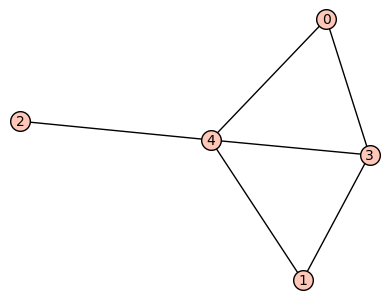

9
[[0, 1], [2, 3, 4], [0, 1, 2], [0, 1, 3], [1, 2, 3, 4], [0, 2, 3, 4], [0, 1, 2, 3], [0, 1, 2, 4], [0, 1, 2, 3, 4]]
(3, 3)
DFw


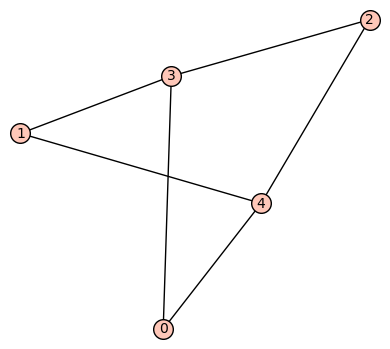

14
[[1, 2], [3, 4], [0, 2], [0, 1], [2, 3, 4], [0, 1, 2], [0, 3, 4], [1, 3, 4], [1, 2, 3, 4], [0, 2, 3, 4], [0, 1, 2, 3], [0, 1, 2, 4], [0, 1, 3, 4], [0, 1, 2, 3, 4]]
(2, 2)
DF{


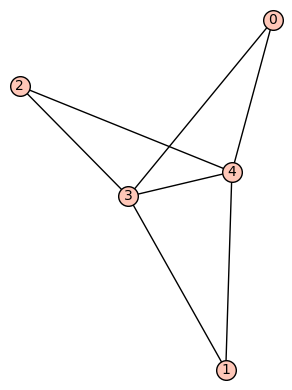

14
[[1, 2], [3, 4], [0, 2], [0, 1], [2, 3, 4], [0, 1, 2], [0, 3, 4], [1, 3, 4], [1, 2, 3, 4], [0, 2, 3, 4], [0, 1, 2, 3], [0, 1, 2, 4], [0, 1, 3, 4], [0, 1, 2, 3, 4]]
(2, 2)
DQo


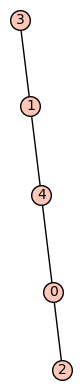

5
[[2, 3, 4], [1, 2, 3, 4], [0, 2, 3, 4], [0, 1, 2, 3], [0, 1, 2, 3, 4]]
(4, 4)
DQw


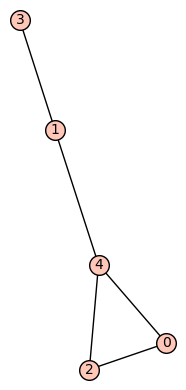

8
[[0, 2], [2, 3, 4], [0, 3, 4], [1, 2, 3, 4], [0, 2, 3, 4], [0, 1, 2, 3], [0, 1, 3, 4], [0, 1, 2, 3, 4]]
(3, 3)
DQ{


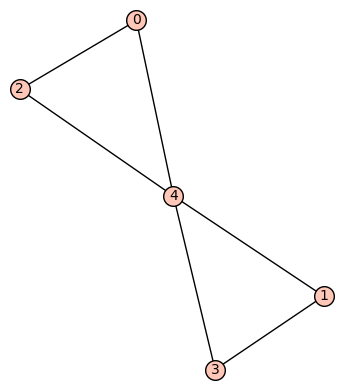

12
[[0, 2], [1, 3], [1, 2, 4], [2, 3, 4], [0, 1, 4], [0, 3, 4], [1, 2, 3, 4], [0, 2, 3, 4], [0, 1, 2, 3], [0, 1, 2, 4], [0, 1, 3, 4], [0, 1, 2, 3, 4]]
(2, 2)
DUW


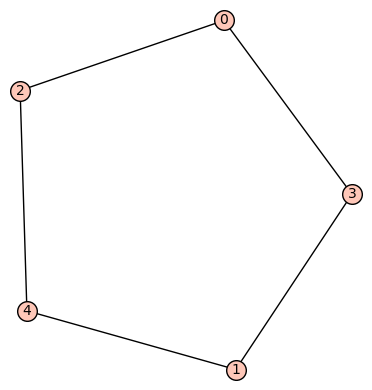

11
[[2, 3, 4], [0, 1, 4], [0, 1, 2], [0, 3, 4], [1, 2, 3], [1, 2, 3, 4], [0, 2, 3, 4], [0, 1, 2, 3], [0, 1, 2, 4], [0, 1, 3, 4], [0, 1, 2, 3, 4]]
(3, 3)
DUw


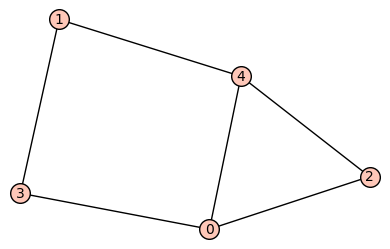

11
[[2, 3, 4], [0, 1, 4], [0, 1, 2], [0, 3, 4], [1, 2, 3], [1, 2, 3, 4], [0, 2, 3, 4], [0, 1, 2, 3], [0, 1, 2, 4], [0, 1, 3, 4], [0, 1, 2, 3, 4]]
(3, 3)
DU{


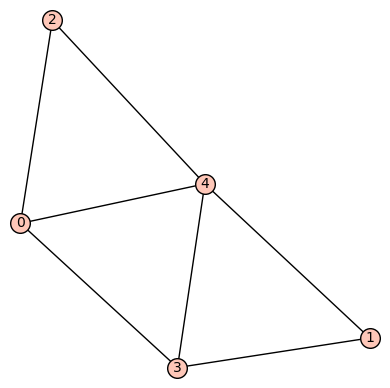

12
[[1, 2, 4], [2, 3, 4], [0, 1, 4], [0, 1, 2], [0, 3, 4], [1, 2, 3], [1, 2, 3, 4], [0, 2, 3, 4], [0, 1, 2, 3], [0, 1, 2, 4], [0, 1, 3, 4], [0, 1, 2, 3, 4]]
(3, 3)
DTw


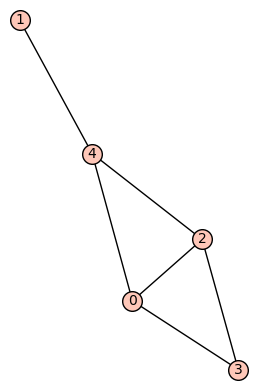

11
[[0, 2], [0, 2, 3], [0, 1, 2], [0, 1, 3], [1, 2, 3], [1, 3, 4], [1, 2, 3, 4], [0, 1, 2, 3], [0, 1, 2, 4], [0, 1, 3, 4], [0, 1, 2, 3, 4]]
(3, 3)
DT{


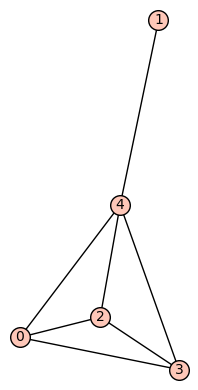

15
[[2, 3], [0, 2], [0, 3], [0, 2, 3], [1, 2, 4], [0, 1, 4], [0, 1, 2], [0, 1, 3], [1, 2, 3], [1, 3, 4], [1, 2, 3, 4], [0, 1, 2, 3], [0, 1, 2, 4], [0, 1, 3, 4], [0, 1, 2, 3, 4]]
(2, 2)
DV{


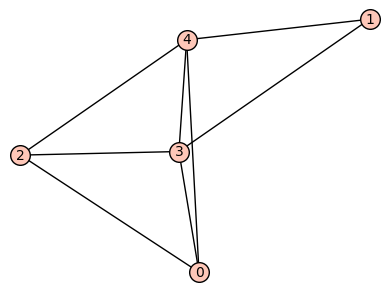

16
[[3, 4], [0, 2], [1, 2, 4], [2, 3, 4], [0, 1, 4], [0, 1, 2], [0, 3, 4], [0, 1, 3], [1, 2, 3], [1, 3, 4], [1, 2, 3, 4], [0, 2, 3, 4], [0, 1, 2, 3], [0, 1, 2, 4], [0, 1, 3, 4], [0, 1, 2, 3, 4]]
(2, 2)
D]w


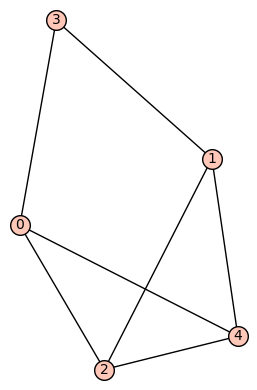

16
[[0, 1], [2, 4], [0, 2, 3], [2, 3, 4], [0, 1, 4], [0, 1, 2], [0, 3, 4], [0, 1, 3], [1, 2, 3], [1, 3, 4], [1, 2, 3, 4], [0, 2, 3, 4], [0, 1, 2, 3], [0, 1, 2, 4], [0, 1, 3, 4], [0, 1, 2, 3, 4]]
(2, 2)
D]{


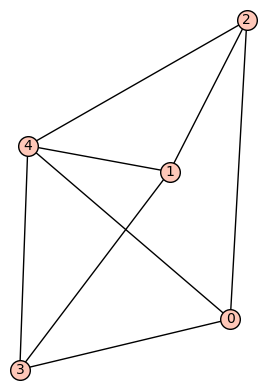

18
[[2, 3], [0, 1], [0, 2, 3], [1, 2, 4], [2, 3, 4], [0, 2, 4], [0, 1, 4], [0, 1, 2], [0, 3, 4], [0, 1, 3], [1, 2, 3], [1, 3, 4], [1, 2, 3, 4], [0, 2, 3, 4], [0, 1, 2, 3], [0, 1, 2, 4], [0, 1, 3, 4], [0, 1, 2, 3, 4]]
(2, 2)
D^{


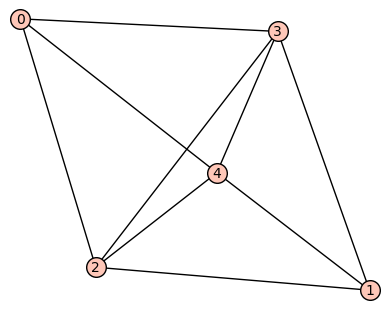

20
[[3, 4], [2, 3], [0, 1], [2, 4], [0, 2, 3], [1, 2, 4], [2, 3, 4], [0, 2, 4], [0, 1, 4], [0, 1, 2], [0, 3, 4], [0, 1, 3], [1, 2, 3], [1, 3, 4], [1, 2, 3, 4], [0, 2, 3, 4], [0, 1, 2, 3], [0, 1, 2, 4], [0, 1, 3, 4], [0, 1, 2, 3, 4]]
(2, 2)
D~{


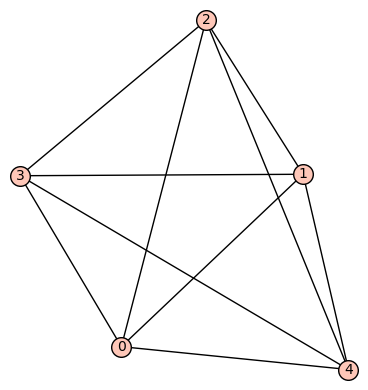

26
[[1, 2], [3, 4], [2, 3], [0, 2], [0, 1], [0, 4], [1, 3], [0, 3], [2, 4], [1, 4], [0, 2, 3], [1, 2, 4], [2, 3, 4], [0, 2, 4], [0, 1, 4], [0, 1, 2], [0, 3, 4], [0, 1, 3], [1, 2, 3], [1, 3, 4], [1, 2, 3, 4], [0, 2, 3, 4], [0, 1, 2, 3], [0, 1, 2, 4], [0, 1, 3, 4], [0, 1, 2, 3, 4]]
(1, 1)


In [5]:
n=5 
for g in graphs(n):
    if g.is_connected():
        print g.graph6_string()
        g.show()
        print All_Forts(g)
        print minrank_bounds(g)
        print '==================================='

In [5]:
M=Matroid(groundset='1234', circuits=['24','123','134'])
print M.is_valid()
B=[sorted(b) for b in M.bases()]
B

True


[['1', '2'], ['1', '3'], ['2', '3'], ['1', '4'], ['3', '4']]

In [6]:
M=Matroid(groundset='1234', circuits=['234','123','134','124'])
print M.is_valid()
B=[sorted(b) for b in M.bases()]
B

True


[['1', '2'], ['1', '3'], ['2', '3'], ['1', '4'], ['2', '4'], ['3', '4']]

In [8]:
M=Matroid(groundset='1234', circuits=['124'])
print M.is_valid()
B=[sorted(b) for b in M.bases()]
B

True


[['1', '2', '3'], ['1', '3', '4'], ['2', '3', '4']]

In [9]:
A=Matrix([[1,-1,0,-1],[1,1,2,1],[0,1,1,1],[1,1,2,1]])
A

[ 1 -1  0 -1]
[ 1  1  2  1]
[ 0  1  1  1]
[ 1  1  2  1]

In [10]:
M=Matroid(A)
[sorted(c) for c in M.circuits()]

[[0, 1, 2], [0, 2, 3], [1, 3]]

In [17]:
Col_Supp_Lifts(A)

[0, 1, 3]
[0, 2]
[1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]


['Dng', 'Dn{', 'Dn[']